# Takes tables with VCF data on the variants of two levels and plots them to the protein sequence for each isoform

In [1]:
import pandas as pd
from pyteomics import fasta
from numpy import nan

import matplotlib.colors as mcolors
from matplotlib import pyplot as plt, patches
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

## 1. Table with all the variants ('level 1 table')

In [2]:
table = pd.read_table(
    '/Users/ksenia/Documents/MODY_genes/whole_pipeline_311022/MD_variants/results/MD_var_level1_unfiltered.tsv')
table.head()

transcriptID chromosome transcript_biotype  \
0  ENST00000493373          1     protein_coding   
1  ENST00000493678          1     protein_coding   
2  ENST00000377493          1     protein_coding   
3  ENST00000338639          1     protein_coding   
4  ENST00000377491          1     protein_coding   

                              variantID   DNA_change cDNA_change  \
0  ENST00000493373_MDvar_rs71653619_G>A  7970934:G>A     348:G>A   
1  ENST00000493678_MDvar_rs71653619_G>A  7970934:G>A     359:G>A   
2  ENST00000377493_MDvar_rs71653619_G>A  7970934:G>A     290:G>A   
3  ENST00000338639_MDvar_rs71653619_G>A  7970934:G>A     398:G>A   
4  ENST00000377491_MDvar_rs71653619_G>A  7970934:G>A     503:G>A   

  protein_change  reading_frame  protein_prefix_length  start_missing  \
0      97:R>97:Q              2                     18           True   
1      97:R>97:Q              1                     22           True   
2      77:R>77:Q              1                     19           True   
3      97:R>97:Q              1                     35           True   
4      97:R>97:Q              1                     70           True   

   start_lost  splice_site_affected  
0       False                   NaN  
1       False                   NaN  
2       False                   NaN  
3       False                   NaN  
4       False                   NaN

In [3]:
len(table)

12643

Creating a table that contains transcript and protein IDs along with gene names, protein sequences (unmodified) and protein descriptions taken from FASTA. For these purpose canonical proteome fasta with all isoforms downloaded from Ensembl is used. 

Also creating an 'info' table that contains the number of transcripts and the number of variants belonging to each gene name. This is useful to have in ordet to estimete how each plot will look like in the end. 

In [4]:
table = pd.read_table(
    '/Users/ksenia/Documents/MODY_genes/whole_pipeline_311022/MD_variants/results/MD_var_level1_unfiltered.tsv')
table = table.rename(columns={"transcriptID": "transcript_id"})
transcripts = table['transcript_id'].tolist()

data_names = []
with fasta.read('/Users/ksenia/Documents/FASTA/ensembl_reference_proteinDB_tagged.fa') as f:
    for prot in f:
        transcript_ID = prot.description.split('transcript:')[1].split('.')[0]
        proteinID = prot.description.replace('.', '|').split('|')[1]
        for item in transcripts:
            if item == transcript_ID:
                if 'gene_symbol:' in prot.description:
                    gene_name = prot.description.split('gene_symbol:')[1].split(' ')[0]
                    data_names.append({'transcript_id': transcript_ID, 
                                       'gene_name': gene_name, 
                                       'description': prot.description,
                                       'unmodified_sequence': prot.sequence,
                                       'protein_id': proteinID})
                        
                        
name_frame = pd.DataFrame(data_names).drop_duplicates().reset_index(drop=True)
table_names = pd.merge(table, name_frame, how='outer', on = 'transcript_id').replace(nan, '')
var_gene_names = table_names[table_names['gene_name'] != ''].reset_index(drop=True)

#######
info = []
genes = var_gene_names['gene_name'].unique()
for gene in genes:
    info.append({'gene': gene, 'transcripts': 
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['transcript_id'].unique()), 'variants':
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['protein_change'].unique())})
info_df = pd.DataFrame(info)
info_df.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/281022info_level1_prot.csv',
    header=True, index=False)
#######

var_gene_names.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/281022all_variants_gene_names_prot_level1.csv',
    header=True, index=False)

In [5]:
var_gene_names

transcript_id chromosome transcript_biotype  \
0      ENST00000493373          1     protein_coding   
1      ENST00000493678          1     protein_coding   
2      ENST00000377493          1     protein_coding   
3      ENST00000338639          1     protein_coding   
4      ENST00000377491          1     protein_coding   
...                ...        ...                ...   
29153  ENST00000453960          X     protein_coding   
29154  ENST00000453960          X     protein_coding   
29155  ENST00000628176          X     protein_coding   
29156  ENST00000407218          X     protein_coding   
29157  ENST00000637917          X     protein_coding   

                                    variantID     DNA_change cDNA_change  \
0      ENST00000493373_MODYvar_rs71653619_G>A    7970934:G>A     348:G>A   
1      ENST00000493678_MODYvar_rs71653619_G>A    7970934:G>A     359:G>A   
2      ENST00000377493_MODYvar_rs71653619_G>A    7970934:G>A     290:G>A   
3      ENST00000338639_MODYvar_rs71653619_G>A    7970934:G>A     398:G>A   
4      ENST00000377491_MODYvar_rs71653619_G>A    7970934:G>A     503:G>A   
...                                       ...            ...         ...   
29153  ENST00000453960_MODYvar_rs61751444_G>A  154030903:G>A    1012:C>T   
29154  ENST00000453960_MODYvar_rs28934906_G>A  154031355:G>A     560:C>T   
29155  ENST00000628176_MODYvar_rs61751444_G>A  154030903:G>A    1047:C>T   
29156  ENST00000407218_MODYvar_rs61751444_G>A  154030903:G>A     875:C>T   
29157  ENST00000637917_MODYvar_rs61751444_G>A  154030903:G>A      98:C>T   

                      protein_change  reading_frame  protein_prefix_length  \
0                          97:R>97:Q              2                     18   
1                          97:R>97:Q              1                     22   
2                          77:R>77:Q              1                     19   
3                          97:R>97:Q              1                     35   
4                          97:R>97:Q              1                     70   
...                              ...            ...                    ...   
29153                    320:R>320:W              1                     17   
29154                    169:T>169:M              1                     17   
29155                    271:P>271:P              1                     77   
29156                    283:P>283:P              0                      8   
29157  32:P>32:P|32:P>32:L|32:R>32:W             -1                      0   

       start_lost splice_site_affected gene_name  \
0           False                          PARK7   
1           False                          PARK7   
2           False                          PARK7   
3           False                          PARK7   
4           False                          PARK7   
...           ...                  ...       ...   
29153       False                          MECP2   
29154       False                          MECP2   
29155       False                          MECP2   
29156       False                          MECP2   
29157       False                          MECP2   

                                             description  \
0      generic_ensref|ENSP00000465404.1|pep chromosom...   
1      generic_ensref|ENSP00000418770.1|pep chromosom...   
2      generic_ensref|ENSP00000466242.1|pep chromosom...   
3      generic_ensref|ENSP00000340278.5|pep chromosom...   
4      generic_ensref|ENSP00000366711.1|pep chromosom...   
...                                                  ...   
29153  generic_ensref|ENSP00000395535.2|pep chromosom...   
29154  generic_ensref|ENSP00000395535.2|pep chromosom...   
29155  generic_ensref|ENSP00000486978.1|pep chromosom...   
29156  generic_ensref|ENSP00000384865.2|pep chromosom...   
29157  generic_ensref|ENSP00000489847.1|pep chromosom...   

                                     unmodified_sequence       protein_id  
0      MASKRALVILAKGAEEMETVIPVDVMRRAGIKVTVAGLAGKDPVQC...  ENSP00

In [6]:
var_gene_names[var_gene_names['reading_frame'] == -1]

transcript_id chromosome       transcript_biotype  \
5476   ENST00000528712          8           protein_coding   
5477   ENST00000526716          8           protein_coding   
6249   ENST00000356578         11  nonsense_mediated_decay   
6250   ENST00000356578         11  nonsense_mediated_decay   
6278   ENST00000397270         11           protein_coding   
...                ...        ...                      ...   
29140  ENST00000557224          X           protein_coding   
29145  ENST00000652559          X           protein_coding   
29149  ENST00000684155          X           protein_coding   
29150  ENST00000650877          X           protein_coding   
29157  ENST00000637917          X           protein_coding   

                                     variantID     DNA_change cDNA_change  \
5476   ENST00000528712_MODYvar_rs140892695_T>C   11748922:T>C     379:T>C   
5477   ENST00000526716_MODYvar_rs140892695_T>C   11748922:T>C     160:T>C   
6249   ENST00000356578_MODYvar_rs397515521_C>T    2160969:C>T      61:G>A   
6250   ENST00000356578_MODYvar_rs397515521_C>A    2160969:C>A      61:G>T   
6278   ENST00000397270_MODYvar_rs397515521_C>T    2160969:C>T      61:G>A   
...                                        ...            ...         ...   
29140  ENST00000557224_MODYvar_rs122467174_C>T   49258503:C>T      74:G>A   
29145  ENST00000652559_MODYvar_rs122467174_C>T   49258503:C>T      44:G>A   
29149  ENST00000684155_MODYvar_rs122467174_C>T   49258503:C>T      74:G>A   
29150  ENST00000650877_MODYvar_rs122467174_C>T   49258503:C>T     491:G>A   
29157   ENST00000637917_MODYvar_rs61751444_G>A  154030903:G>A      98:C>T   

                            protein_change  reading_frame  \
5476   126:M>126:T|126:C>126:R|125:Y>125:Y             -1   
5477         53:M>53:T|53:C>53:R|52:Y>52:Y             -1   
6249         20:W>20:*|20:G>20:S|19:M>19:I             -1   
6250         20:W>20:L|20:G>20:C|19:M>19:I             -1   
6278         20:W>20:*|20:G>20:S|19:M>19:I             -1   
...                                    ...            ...   
29140        24:M>24:I|24:C>24:Y|24:A>24:T             -1   
29145        14:M>14:I|14:C>14:Y|14:A>14:T             -1   
29149        24:M>24:I|24:C>24:Y|24:A>24:T             -1   
29150  163:M>163:I|163:C>163:Y|163:A>163:T             -1   
29157        32:P>32:P|32:P>32:L|32:R>32:W             -1   

       protein_prefix_length  start_lost splice_site_affected gene_name  \
5476                       0        True                          GATA4   
5477                       0        True                          GATA4   
6249                       0        True                       INS-IGF2   
6250                       0        True                       INS-IGF2   
6278                       0        True                       INS-IGF2   
...                      ...         ...                  ...       ...   
29140                      0        True                          FOXP3   
29145                      0        True                          FOXP3   
29149                      0        True                          FOXP3   
29150                      0        True                          FOXP3   
29157                      0       False                          MECP2   

                                             description  \
5476   generic_ensref|ENSP00000435043.1|pep chromosom...   
5477   generic_ensref|ENSP00000435347.1|pep chromosom...   
6249   generic_ensref|ENSP00000348986.4|pep chromosom...   
6250   generic_ensref|ENSP00000348986.4|pep chromosom...   
6278   generic_ensref|ENSP00000380440.1|pep chromosom...   
...                                                  ...   
29140  generic_ensref|ENSP00000451208.1|pep chromosom...   
29145  generic_ensref|ENSP00000498236.1|pep chromosom...   
29149  generic_ensref|ENSP00000507726.1|pep chromosom...   
29150  generic_ensref|ENSP00000499100.1|pep chromosom...   
29157  generic_ensref|ENSP00000489847.1|pep c

In [7]:
info_df

gene  transcripts  variants
0     PARK7            7         3
1      LEPR            6        15
2      LMNA           22        81
3    GPR161            5         3
4   SLC19A2            3        13
..      ...          ...       ...
72    KCNQ2           14         6
73    LZTR1            6        12
74   SHANK3            4         4
75    FOXP3            9        23
76    MECP2            5         7

[77 rows x 3 columns]

## 2. The same for the 'level 2' more confident filtered variants

In [8]:
table2 = pd.read_table('/Users/ksenia/Documents/MODY_genes/pipeline_october2022/221018_level2_MODYvar_clean.tsv')
table2.head()

transcriptID chromosome transcript_biotype  \
0  ENST00000682931          1     protein_coding   
1  ENST00000271357          1     protein_coding   
2  ENST00000537209          1     protein_coding   
3  ENST00000367838          1     protein_coding   
4  ENST00000367835          1     protein_coding   

                                 variantID     DNA_change cDNA_change  \
0  ENST00000682931_MODYvar_rs200635937_A>T  168104855:A>T     231:T>A   
1  ENST00000271357_MODYvar_rs200635937_A>T  168104855:A>T     223:T>A   
2  ENST00000537209_MODYvar_rs200635937_A>T  168104855:A>T     673:T>A   
3  ENST00000367838_MODYvar_rs200635937_A>T  168104855:A>T     309:T>A   
4  ENST00000367835_MODYvar_rs200635937_A>T  168104855:A>T     552:T>A   

  protein_change  reading_frame  protein_prefix_length  start_lost  \
0      -2:L>-2:Q              2                     78       False   
1      15:L>15:Q              0                     59       False   
2      18:L>18:Q              0                    206       False   
3      -2:L>-2:Q              2                    104       False   
4      -2:L>-2:Q              2                    185       False   

   splice_site_affected  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

In [9]:
len(table2)

6013

In [10]:
table2[table2['reading_frame'] == -1]

transcriptID chromosome       transcript_biotype  \
1843  ENST00000356578         11  nonsense_mediated_decay   
1844  ENST00000356578         11  nonsense_mediated_decay   
1862  ENST00000397270         11           protein_coding   
1863  ENST00000397270         11           protein_coding   
1888  ENST00000397262         11           protein_coding   
...               ...        ...                      ...   
5915  ENST00000518685          X           protein_coding   
5916  ENST00000557224          X           protein_coding   
5917  ENST00000652559          X           protein_coding   
5918  ENST00000684155          X           protein_coding   
5919  ENST00000650877          X           protein_coding   

                                    variantID    DNA_change cDNA_change  \
1843  ENST00000356578_MODYvar_rs397515521_C>A   2160969:C>A      61:G>T   
1844  ENST00000356578_MODYvar_rs397515521_C>T   2160969:C>T      61:G>A   
1862  ENST00000397270_MODYvar_rs397515521_C>A   2160969:C>A      61:G>T   
1863  ENST00000397270_MODYvar_rs397515521_C>T   2160969:C>T      61:G>A   
1888  ENST00000397262_MODYvar_rs397515521_C>A   2160969:C>A     235:G>T   
...                                       ...           ...         ...   
5915  ENST00000518685_MODYvar_rs122467174_C>T  49258503:C>T       2:G>A   
5916  ENST00000557224_MODYvar_rs122467174_C>T  49258503:C>T      74:G>A   
5917  ENST00000652559_MODYvar_rs122467174_C>T  49258503:C>T      44:G>A   
5918  ENST00000684155_MODYvar_rs122467174_C>T  49258503:C>T      74:G>A   
5919  ENST00000650877_MODYvar_rs122467174_C>T  49258503:C>T     491:G>A   

                           protein_change  reading_frame  \
1843        20:W>20:L|20:G>20:C|19:M>19:I             -1   
1844        20:W>20:*|20:G>20:S|19:M>19:I             -1   
1862        20:W>20:L|20:G>20:C|19:M>19:I             -1   
1863        20:W>20:*|20:G>20:S|19:M>19:I             -1   
1888        78:W>78:L|78:G>78:C|77:M>77:I             -1   
...                                   ...            ...   
5915              0:M>0:I|0:C>0:Y|0:A>0:T             -1   
5916        24:M>24:I|24:C>24:Y|24:A>24:T             -1   
5917        14:M>14:I|14:C>14:Y|14:A>14:T             -1   
5918        24:M>24:I|24:C>24:Y|24:A>24:T             -1   
5919  163:M>163:I|163:C>163:Y|163:A>163:T             -1   

      protein_prefix_length  start_lost  splice_site_affected  
1843                      0        True                   NaN  
1844                      0        True                   NaN  
1862                      0        True                   NaN  
1863                      0        True                   NaN  
1888                      0        True                   NaN  
...                     ...         ...                   ...  
5915                      0        True                   NaN  
5916                      0        True                   NaN  
5917                      0        True                   NaN  
5918                      0        True                   NaN  
5919                      0        True                   NaN  

[77 rows x 11 columns]

In [11]:
table2 = pd.read_table('/Users/ksenia/Documents/MODY_genes/pipeline_october2022/221018_level2_MODYvar_clean.tsv')
table2 = table2.rename(columns={"transcriptID": "transcript_id"})
transcripts2 = table2['transcript_id'].tolist()


data_names2 = []
with fasta.read('/Users/ksenia/Documents/FASTA/ensembl_reference_proteinDB_tagged.fa') as f:
    for prot in f:
        transcript_ID = prot.description.split('transcript:')[1].split('.')[0]
        proteinID = prot.description.replace('.', '|').split('|')[1]
        for item in transcripts2:
            if item == transcript_ID:
                if 'gene_symbol:' in prot.description:
                    gene_name = prot.description.split('gene_symbol:')[1].split(' ')[0]
                    data_names2.append({'transcript_id': transcript_ID, 
                                       'gene_name': gene_name, 
                                       'description': prot.description,
                                       'unmodified_sequence': prot.sequence, 
                                       'protein_id': proteinID})
                        
                        
name_frame2 = pd.DataFrame(data_names2).drop_duplicates().reset_index(drop=True)
table_names2 = pd.merge(table2, name_frame2, how='outer', on = 'transcript_id').replace(nan, '')
var_gene_names2 = table_names2[table_names2['gene_name'] != ''].reset_index(drop=True)

#######
info2 = []
genes2 = var_gene_names['gene_name'].unique()
for gene in genes2:
    info2.append({'gene': gene, 'transcripts': 
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['transcript_id'].unique()), 'variants':
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['protein_change'].unique())})
info_df2 = pd.DataFrame(info2)
info_df2.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/281022info_level2.csv',
    header=True, index=False)
#######

var_gene_names2.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/281022all_variants_gene_names_protein_sequences_level2.csv',
    header=True, index=False)


## 3. Plotting data from two tables in one plot

In [12]:
# All genes
genes = var_gene_names2['gene_name'].unique()
genes

array(['GPR161', 'KLF11', 'EIF2AK3', 'SCN1A', 'NEUROD1', 'APPL1',
       'SLC2A2', 'PURA', 'ZFP57', 'RFX6', 'GCK', 'PAX4', 'LEP', 'BLK',
       'GLIS3', 'CEL', 'PTF1A', 'INS-IGF2', 'INS', 'KCNQ1', 'KCNJ11',
       'ABCC8', 'PAX6', 'HNF1A', 'C12orf43', 'PDX1', 'TRIP11', 'MAGEL2',
       'FBN1', 'MLKL', 'HNF1B', 'HNF4A', 'KCNQ2', 'LZTR1', 'SHANK3',
       'FOXP3'], dtype=object)

KLF11
EIF2AK3
NEUROD1
SLC2A2
ZFP57
RFX6
GCK
PAX4
BLK
GLIS3
CEL
PTF1A
INS-IGF2
INS
KCNJ11
ABCC8
PAX6
HNF1A
C12orf43
PDX1


/var/folders/l9/8pj0s89x2533vw_6wcn7h2tm0000gn/T/ipykernel_3871/504669064.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(55, (number_of_transcr * 2 - 1)), constrained_layout=True)


HNF1B
HNF4A
LZTR1
FOXP3


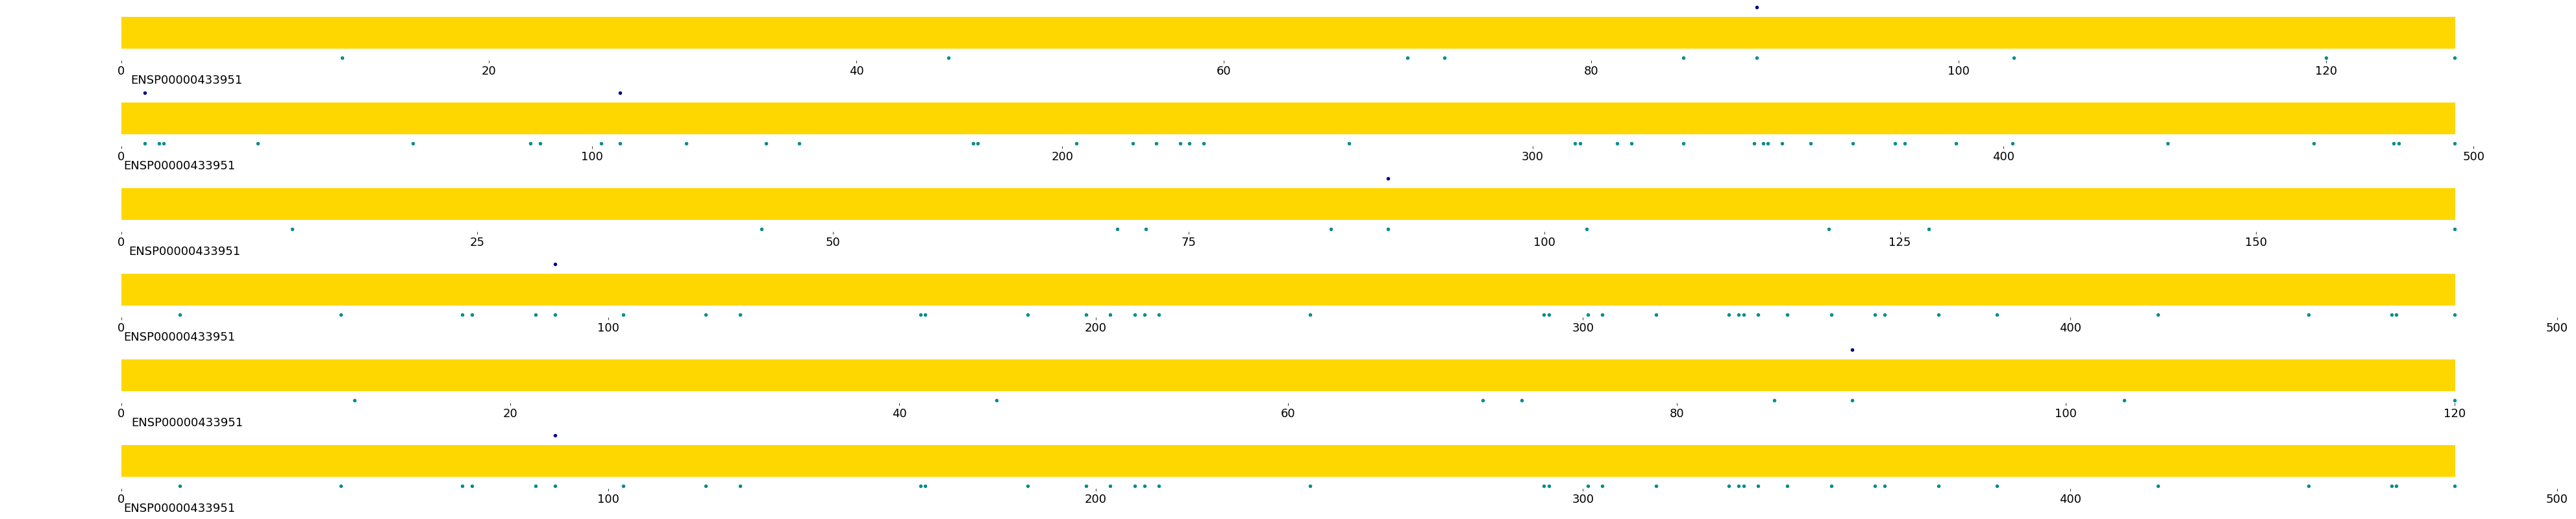

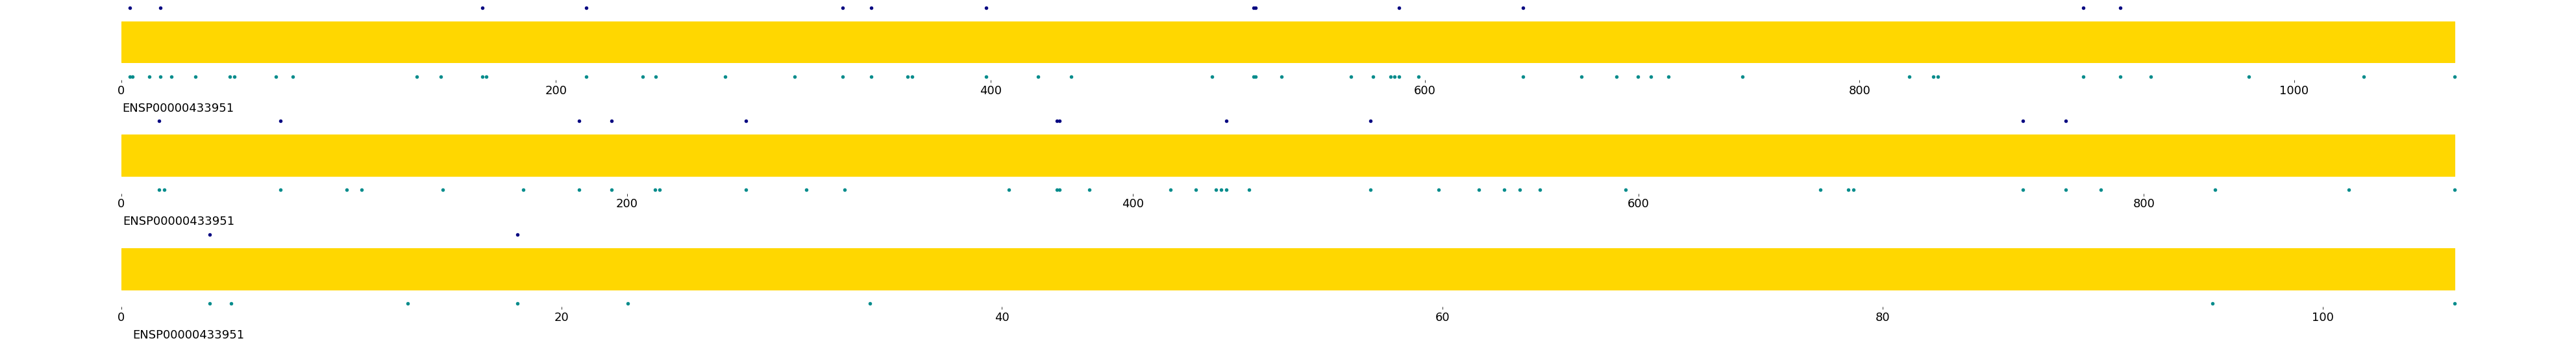

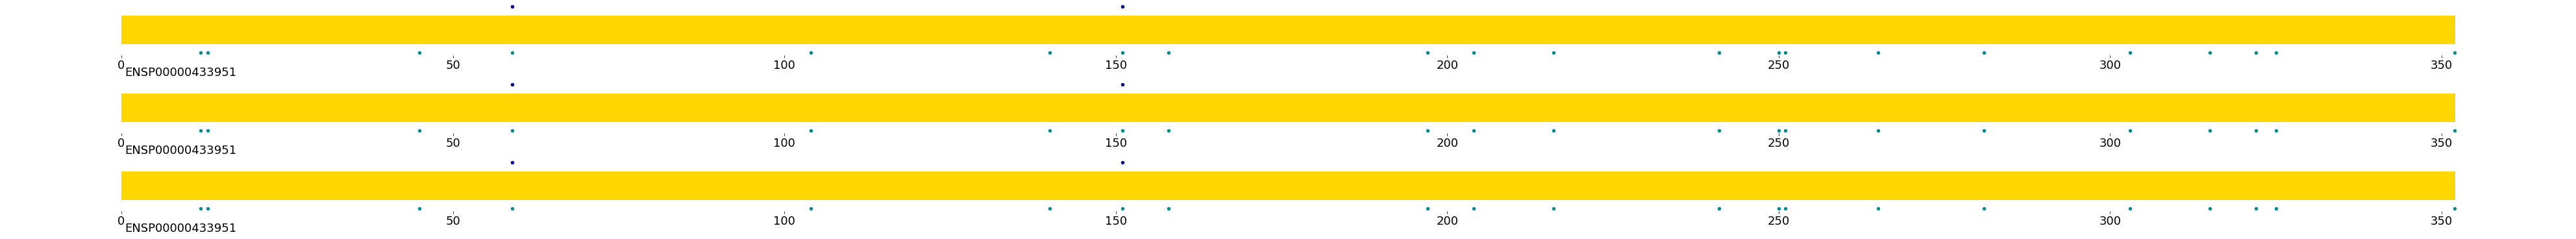

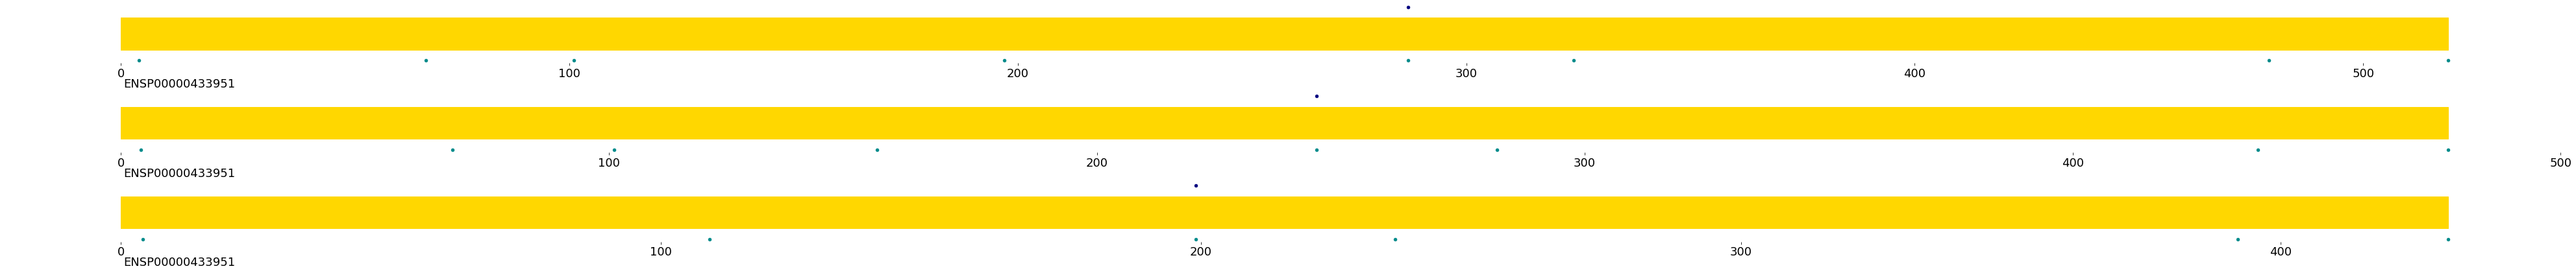

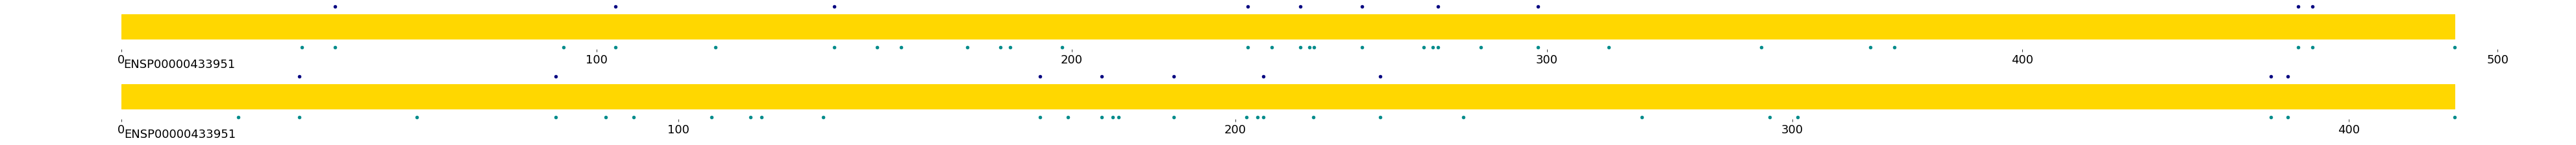

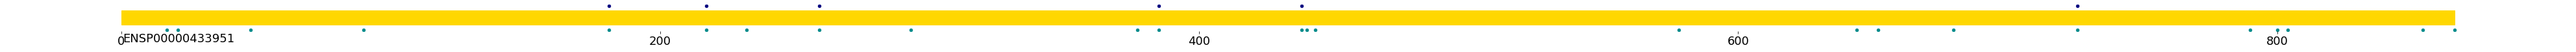

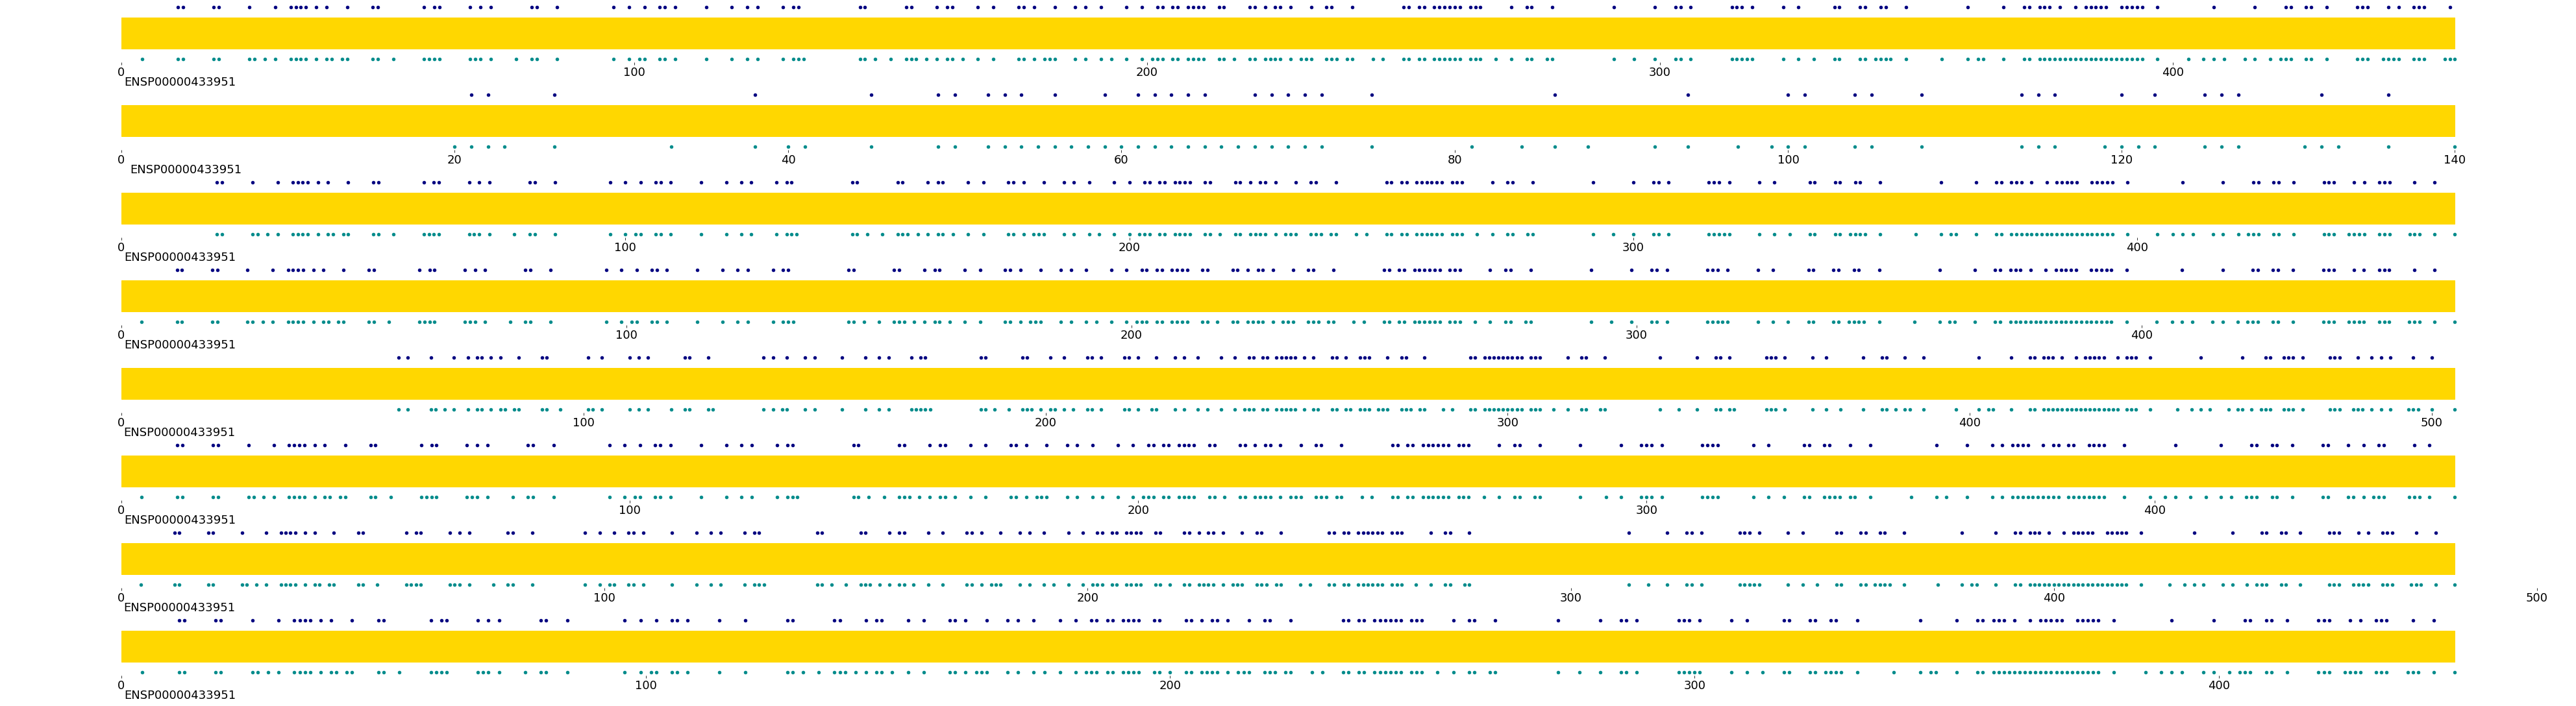

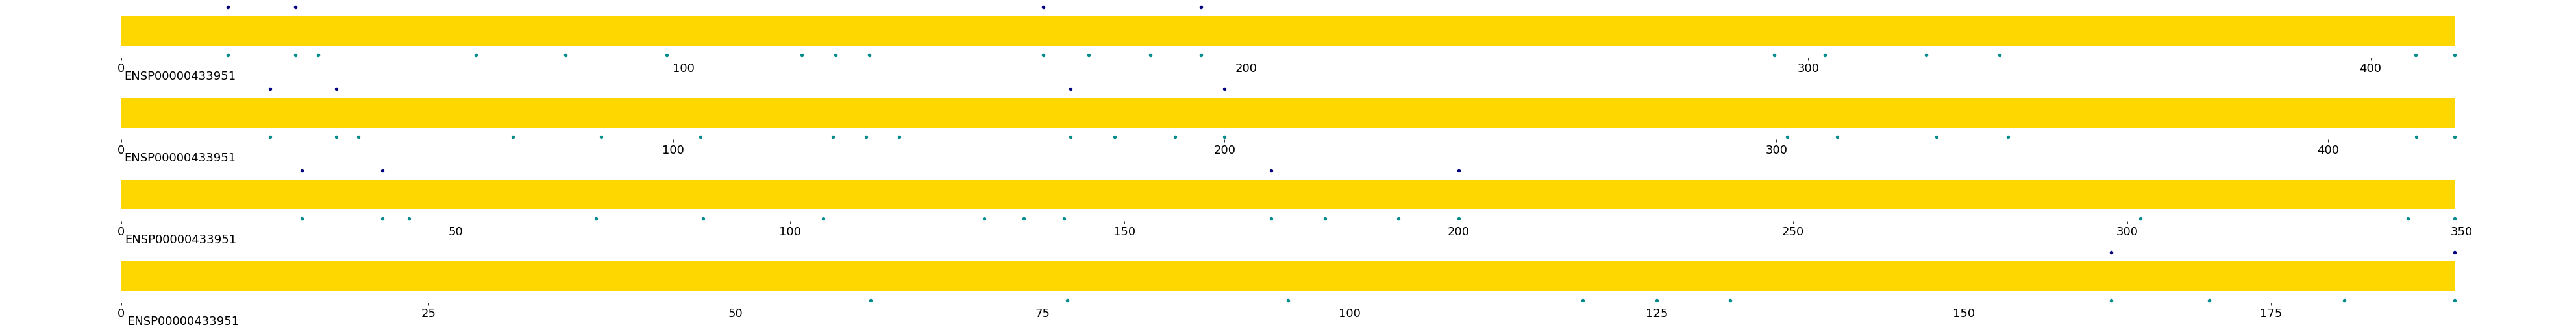

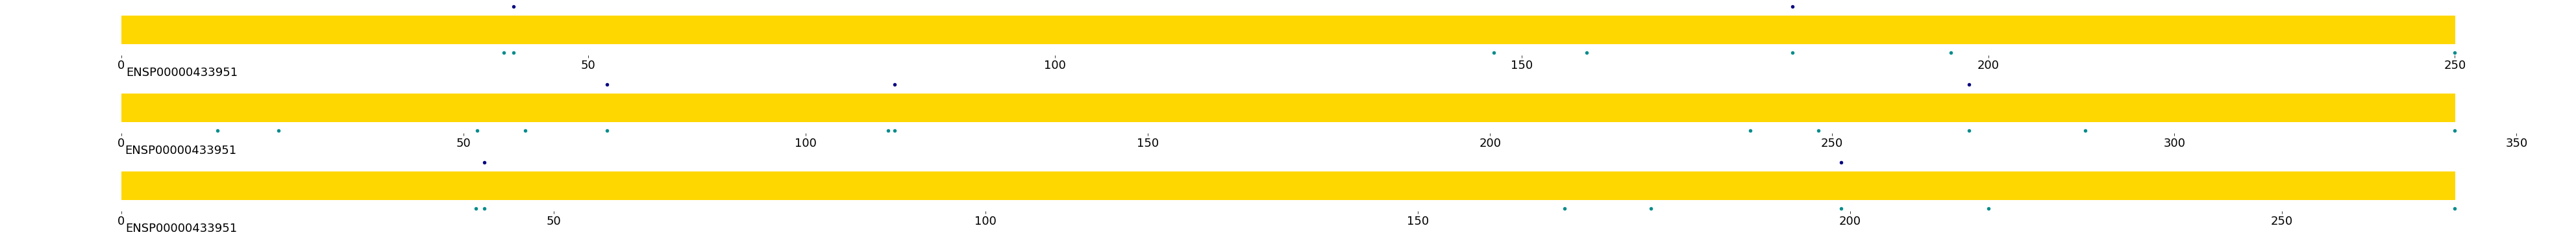

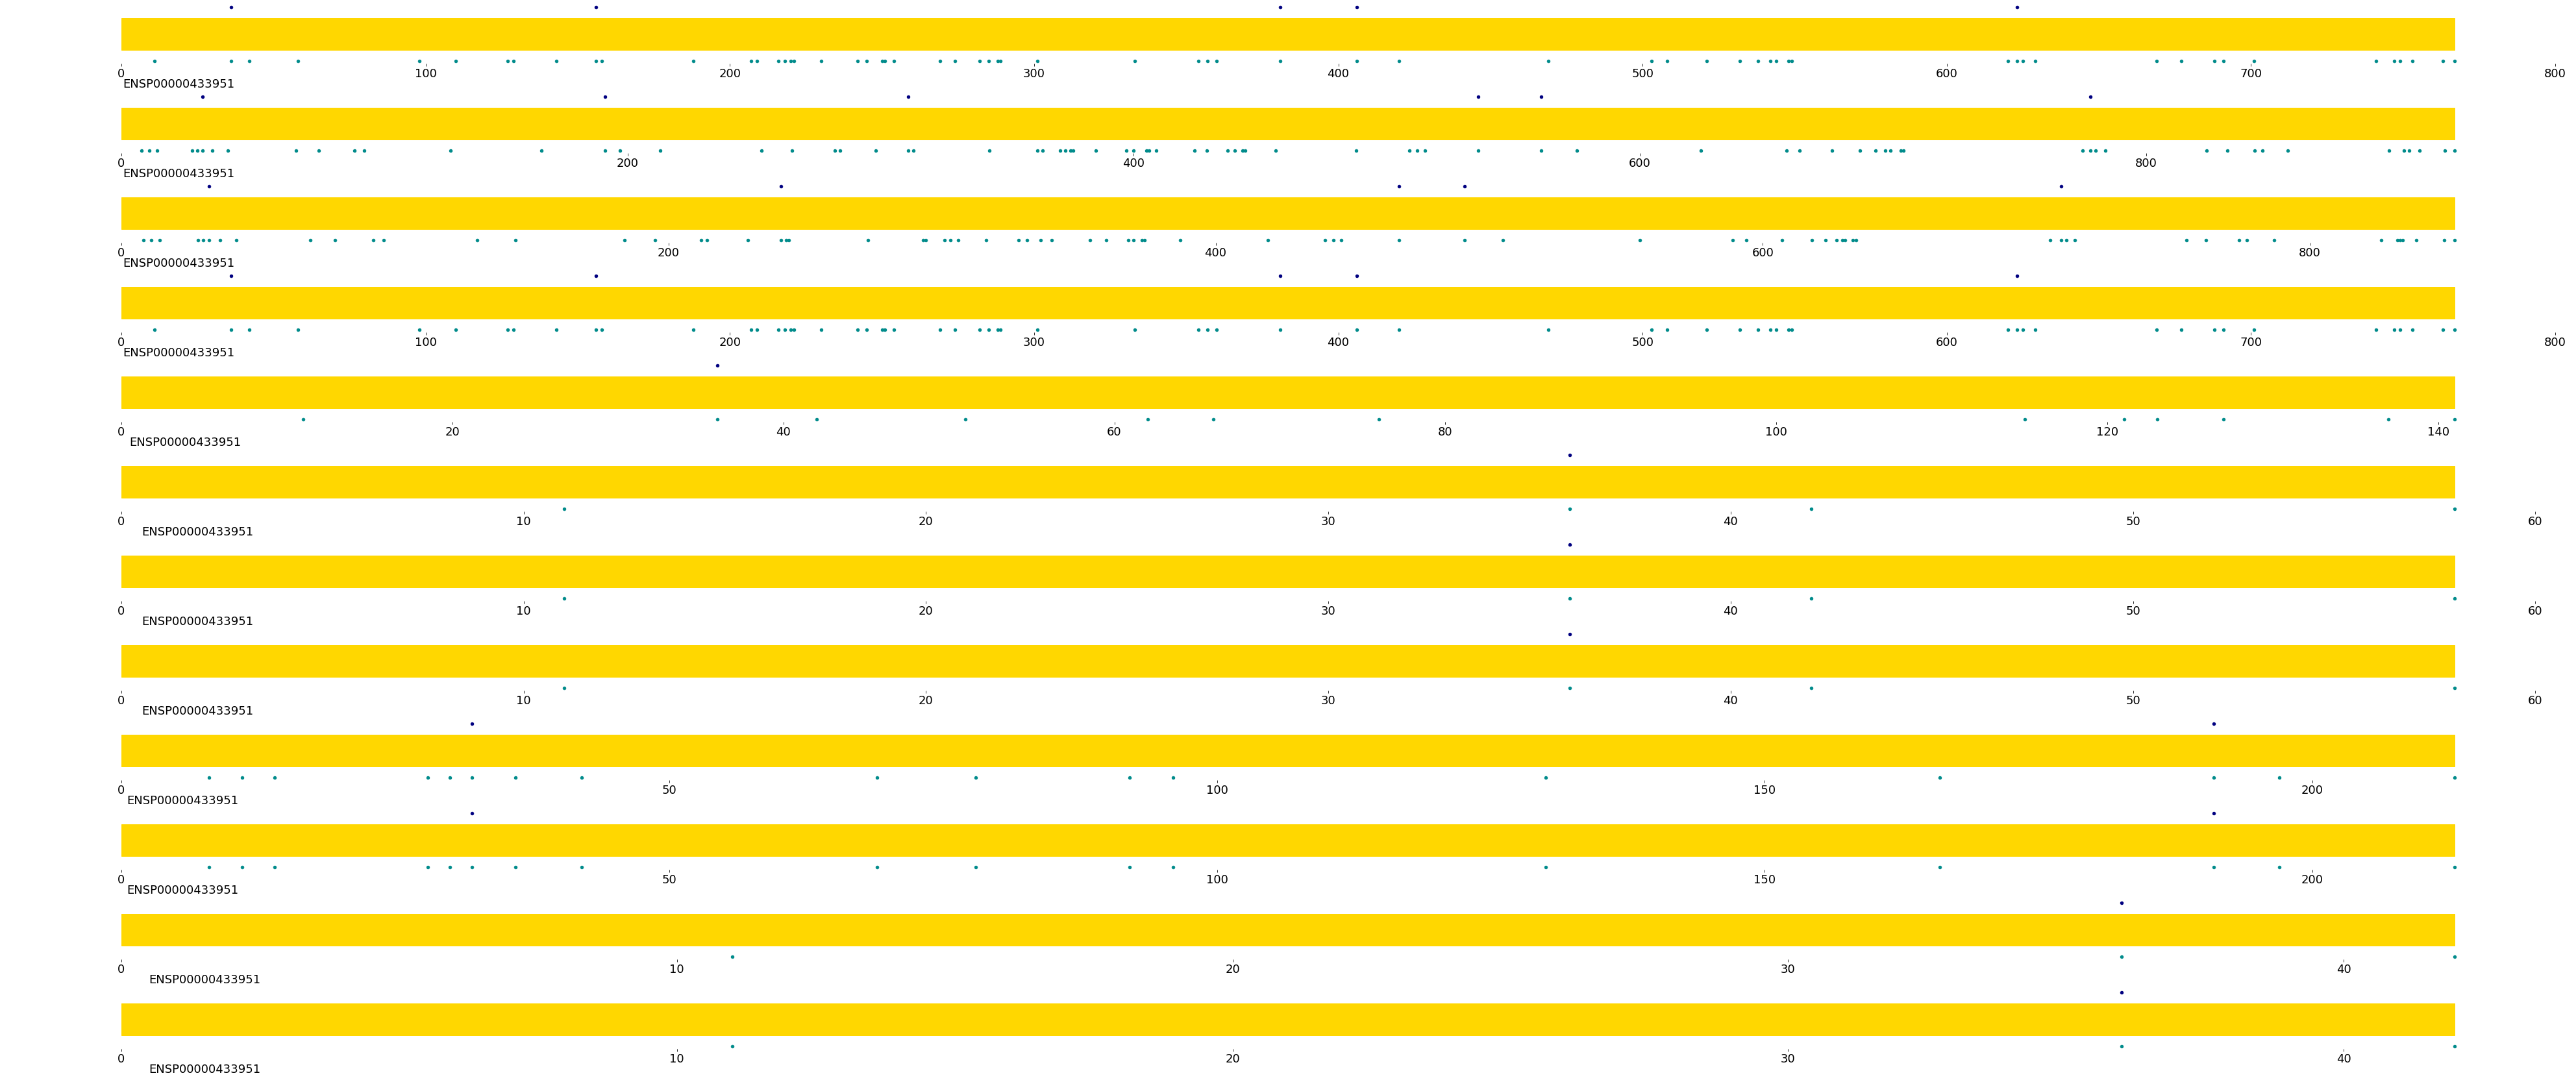

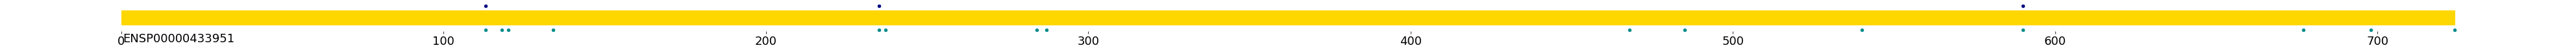

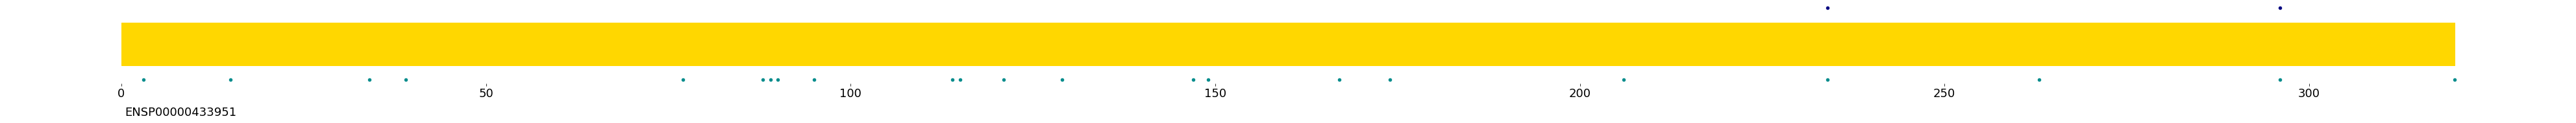

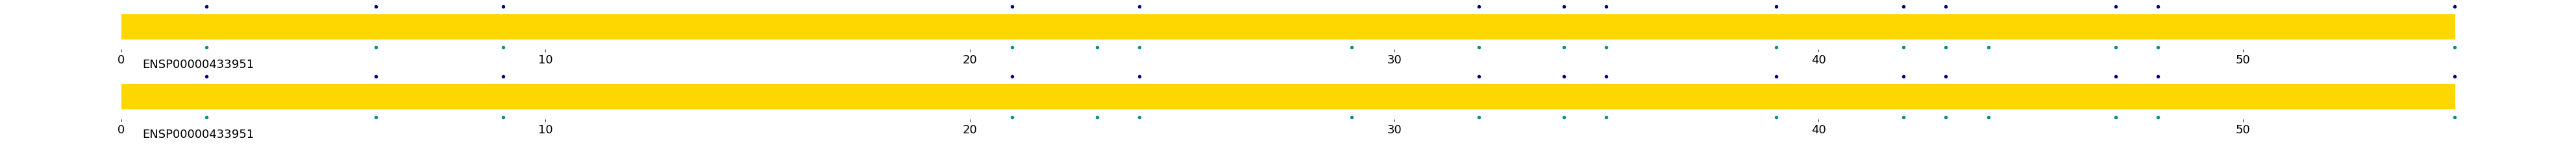

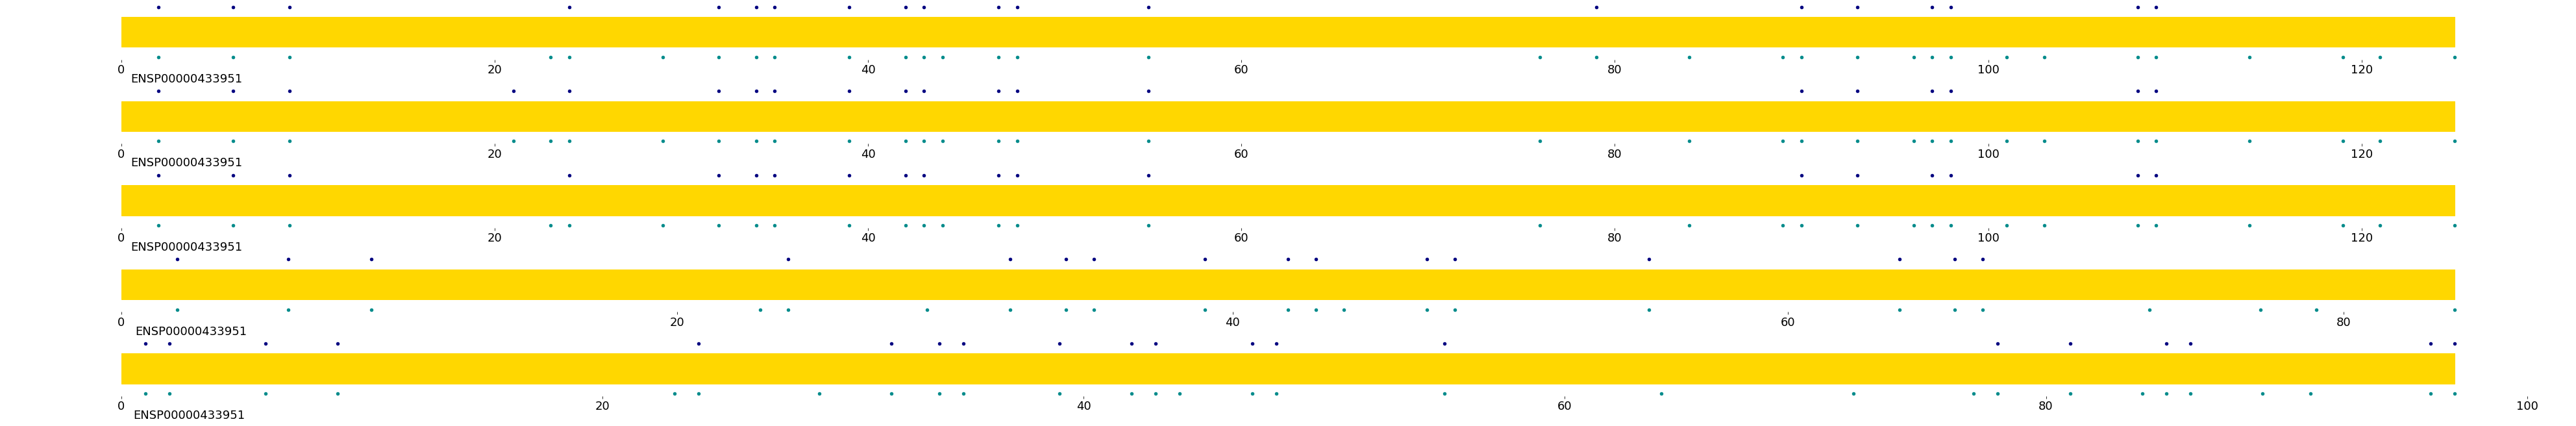

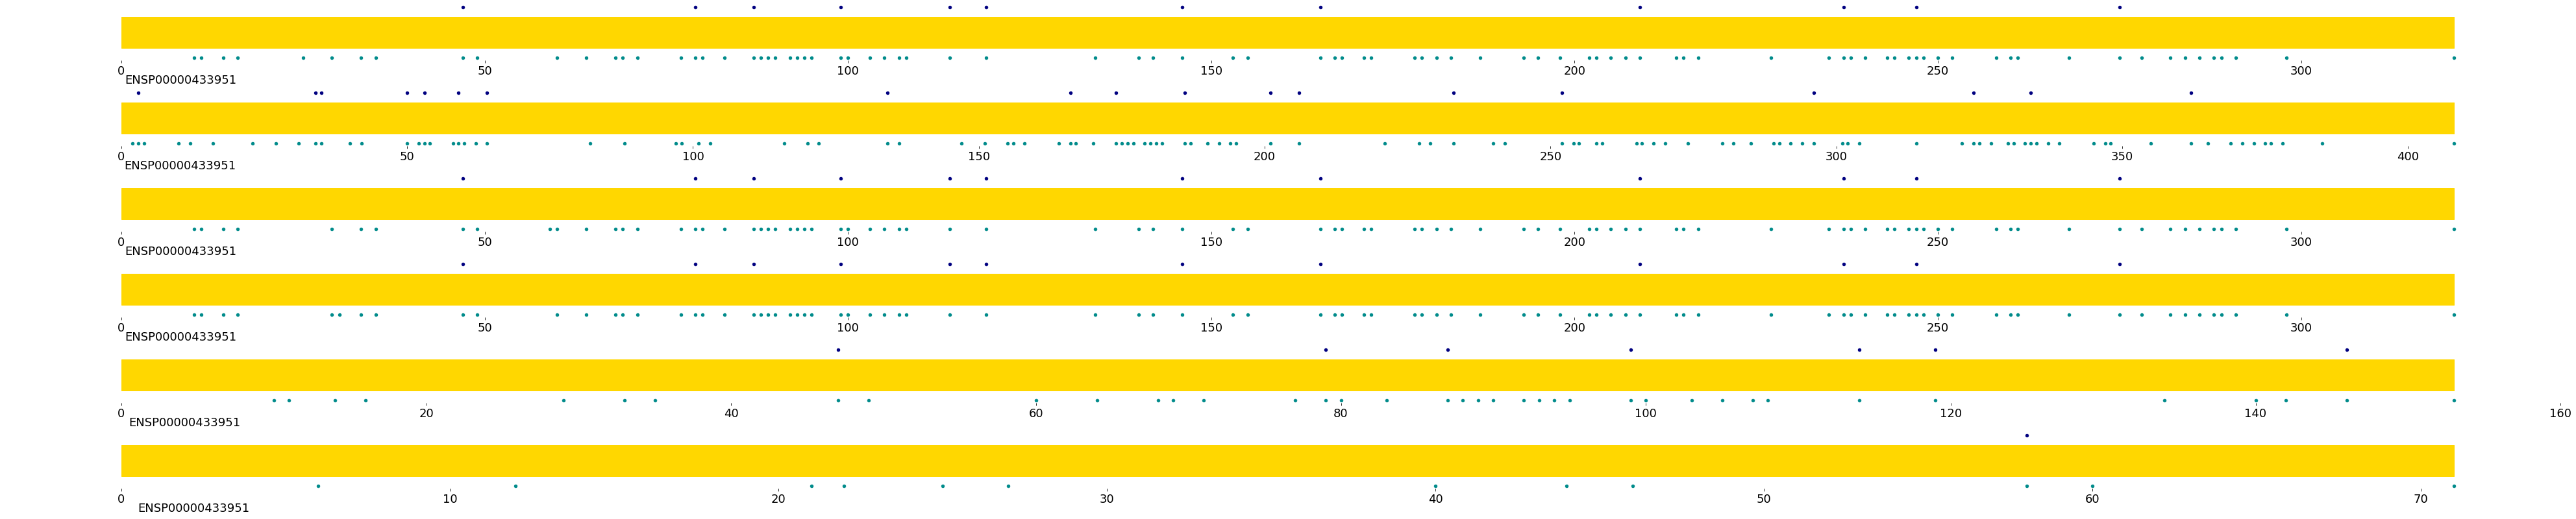

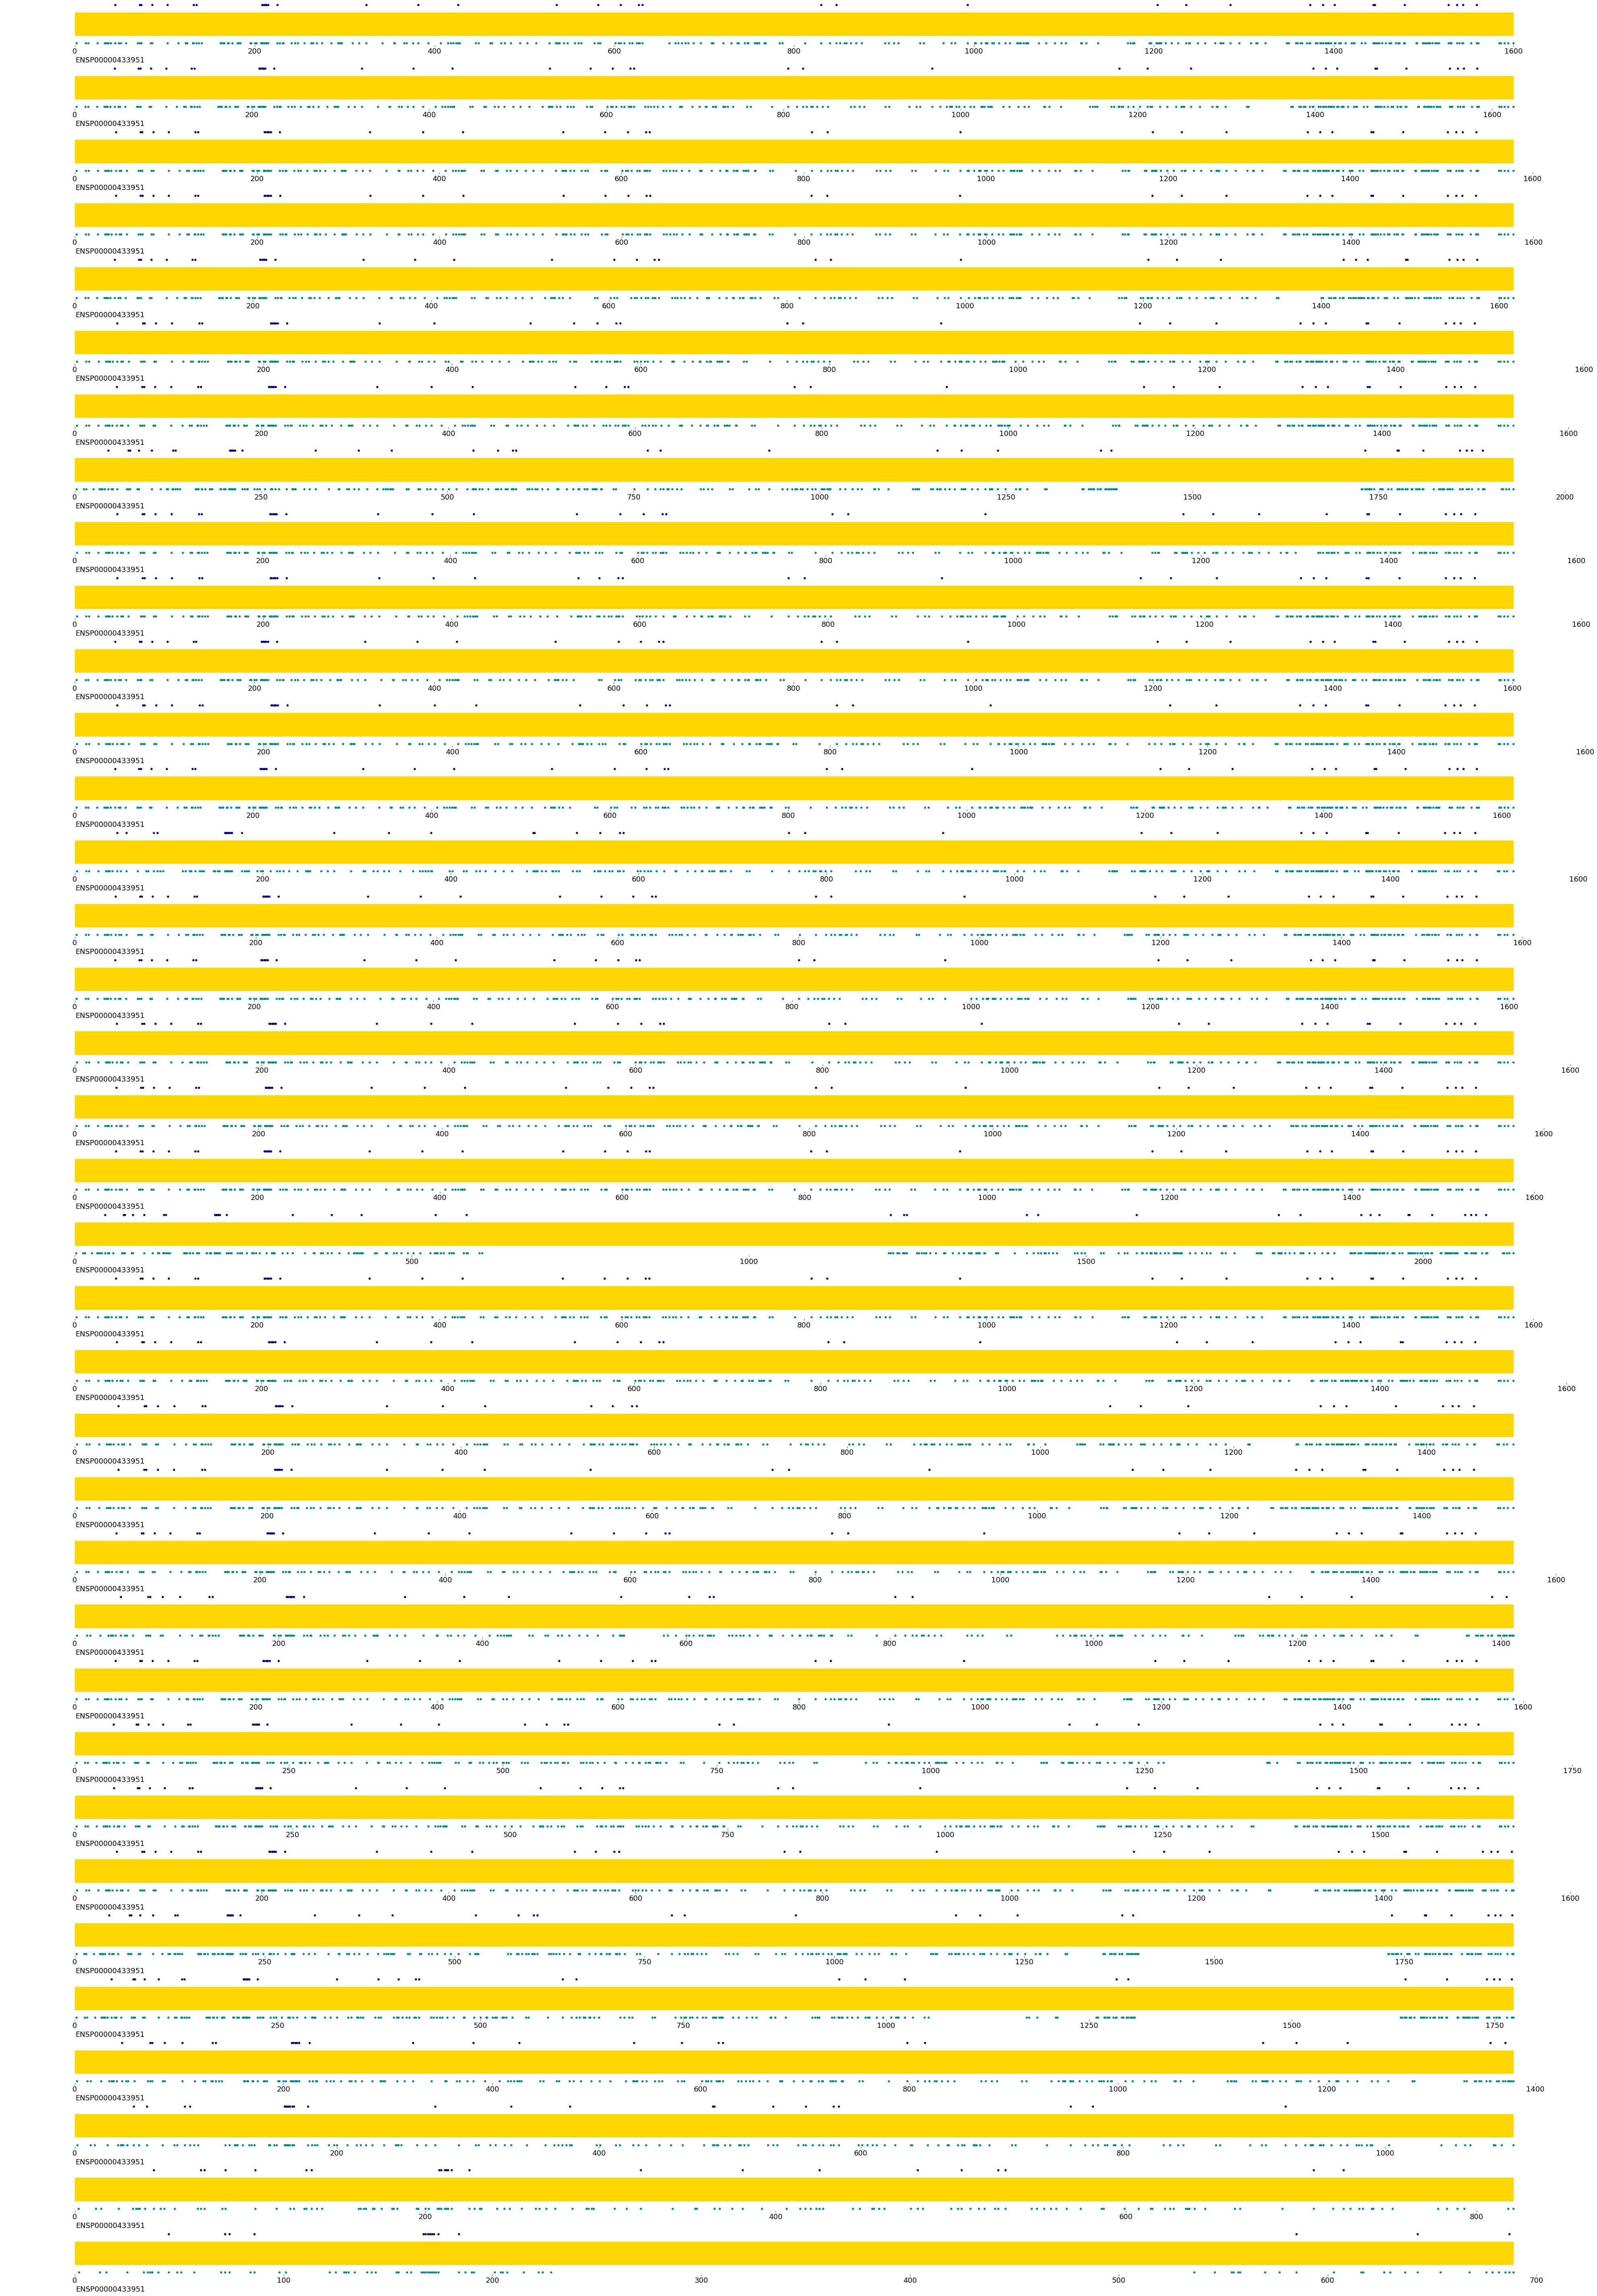

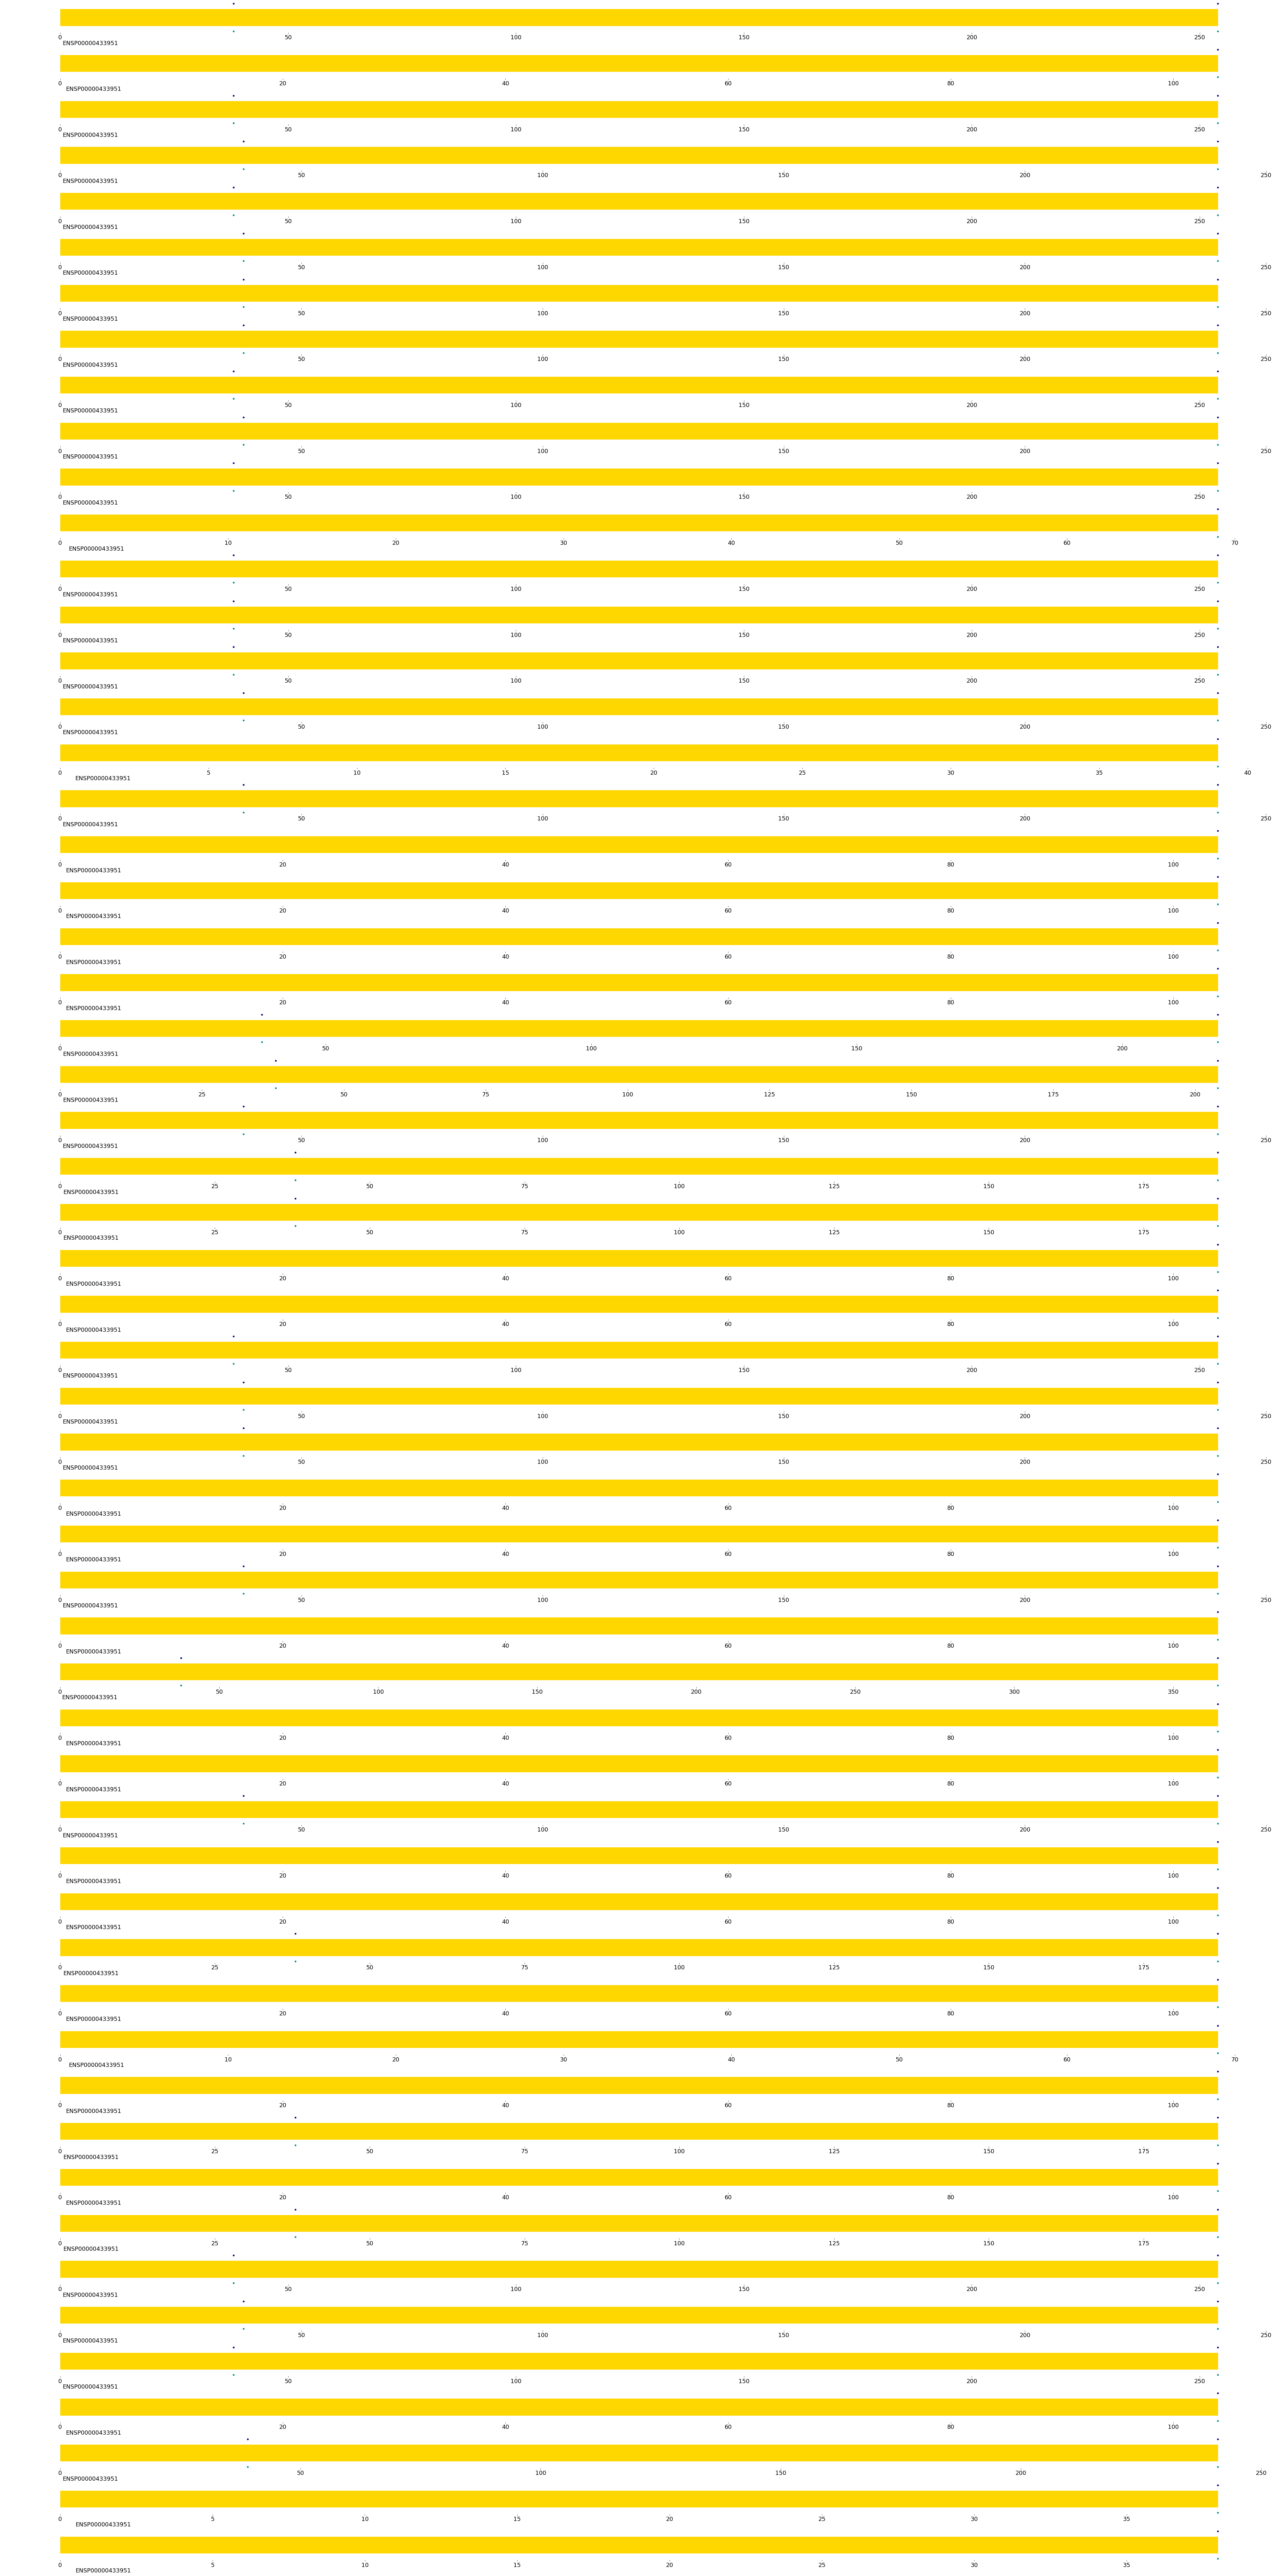

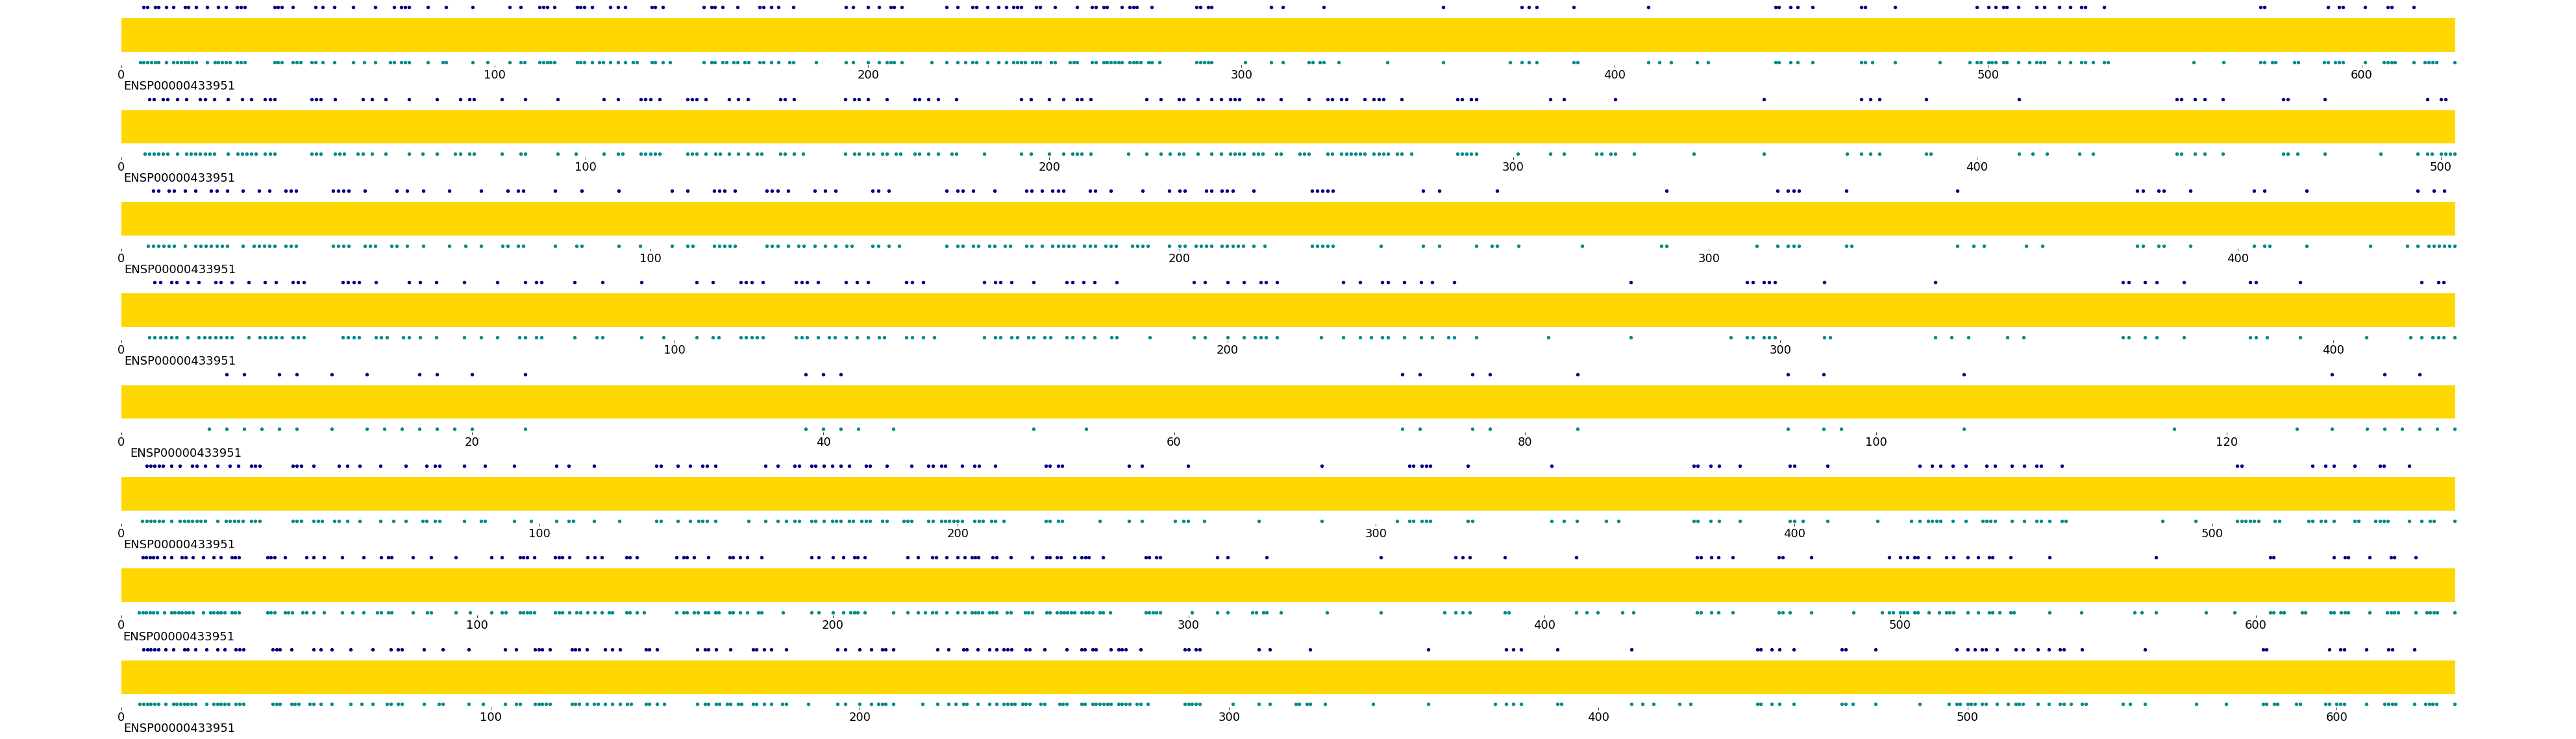

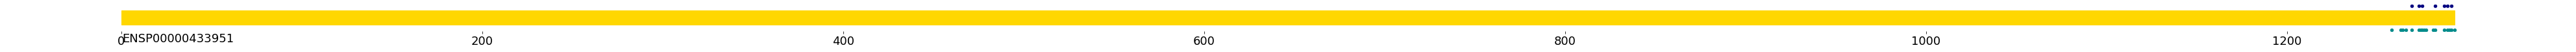

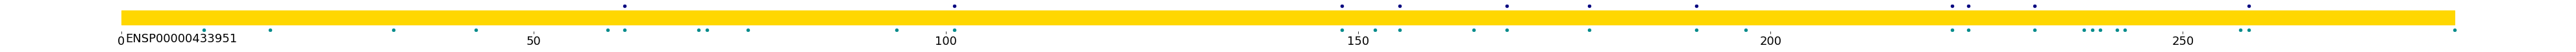

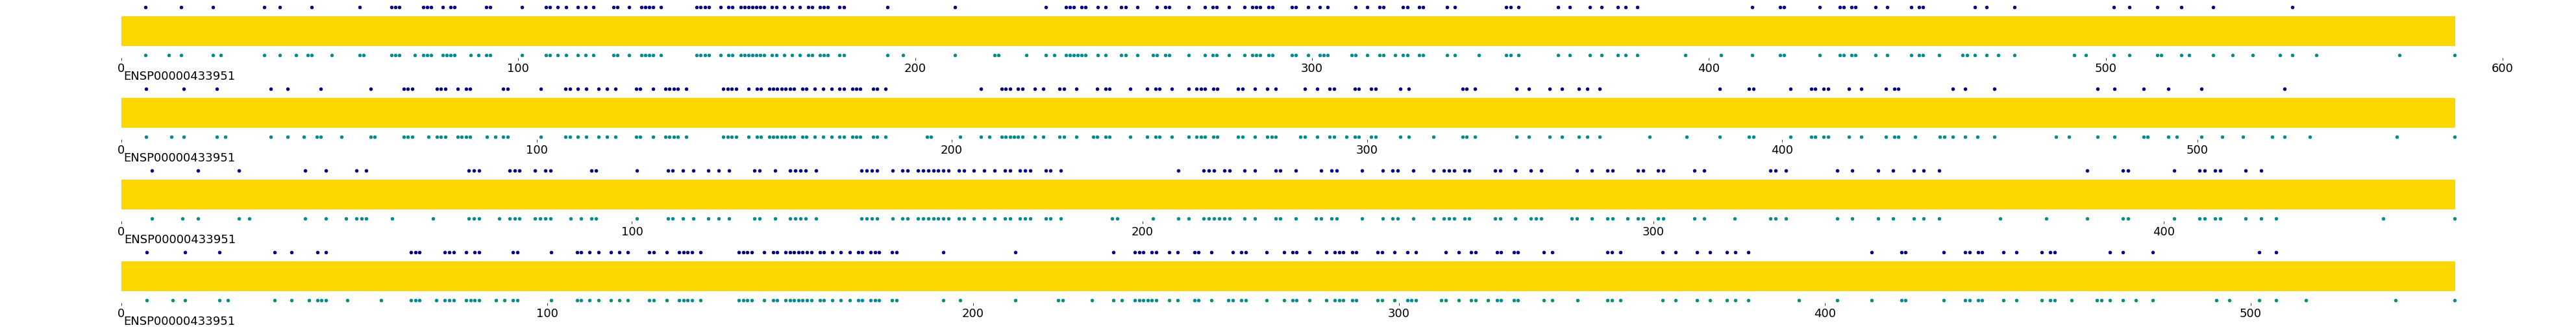

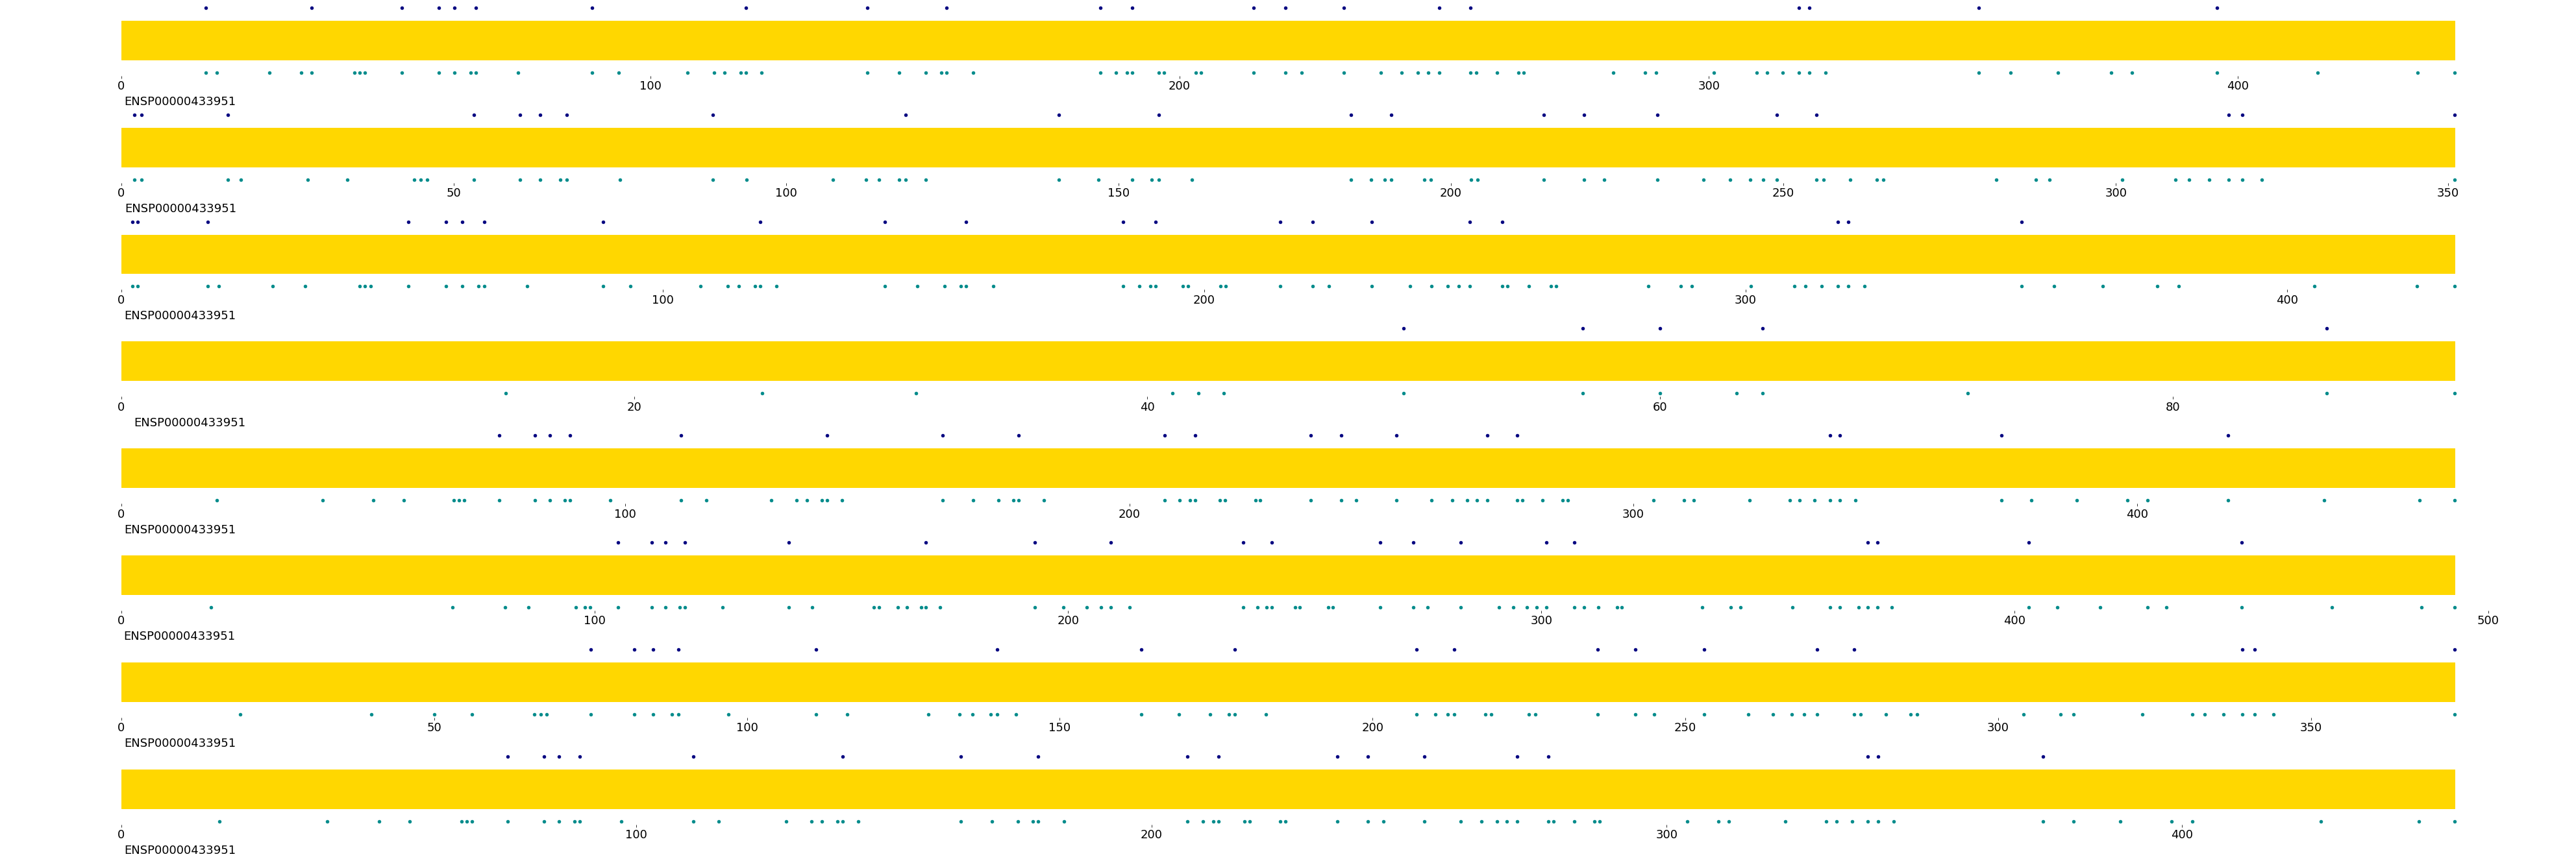

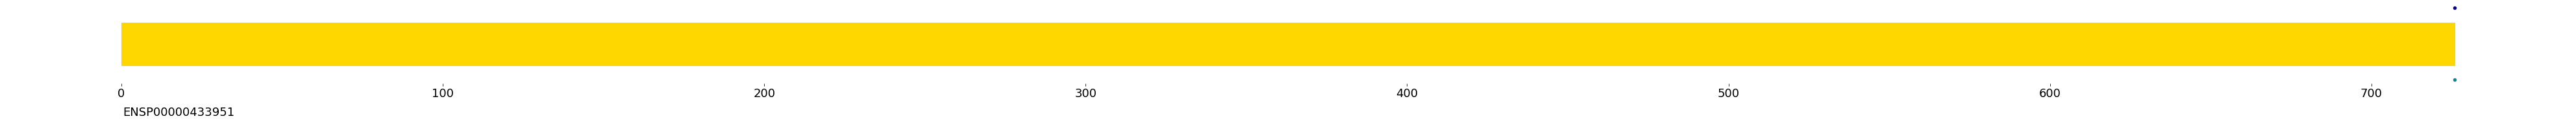

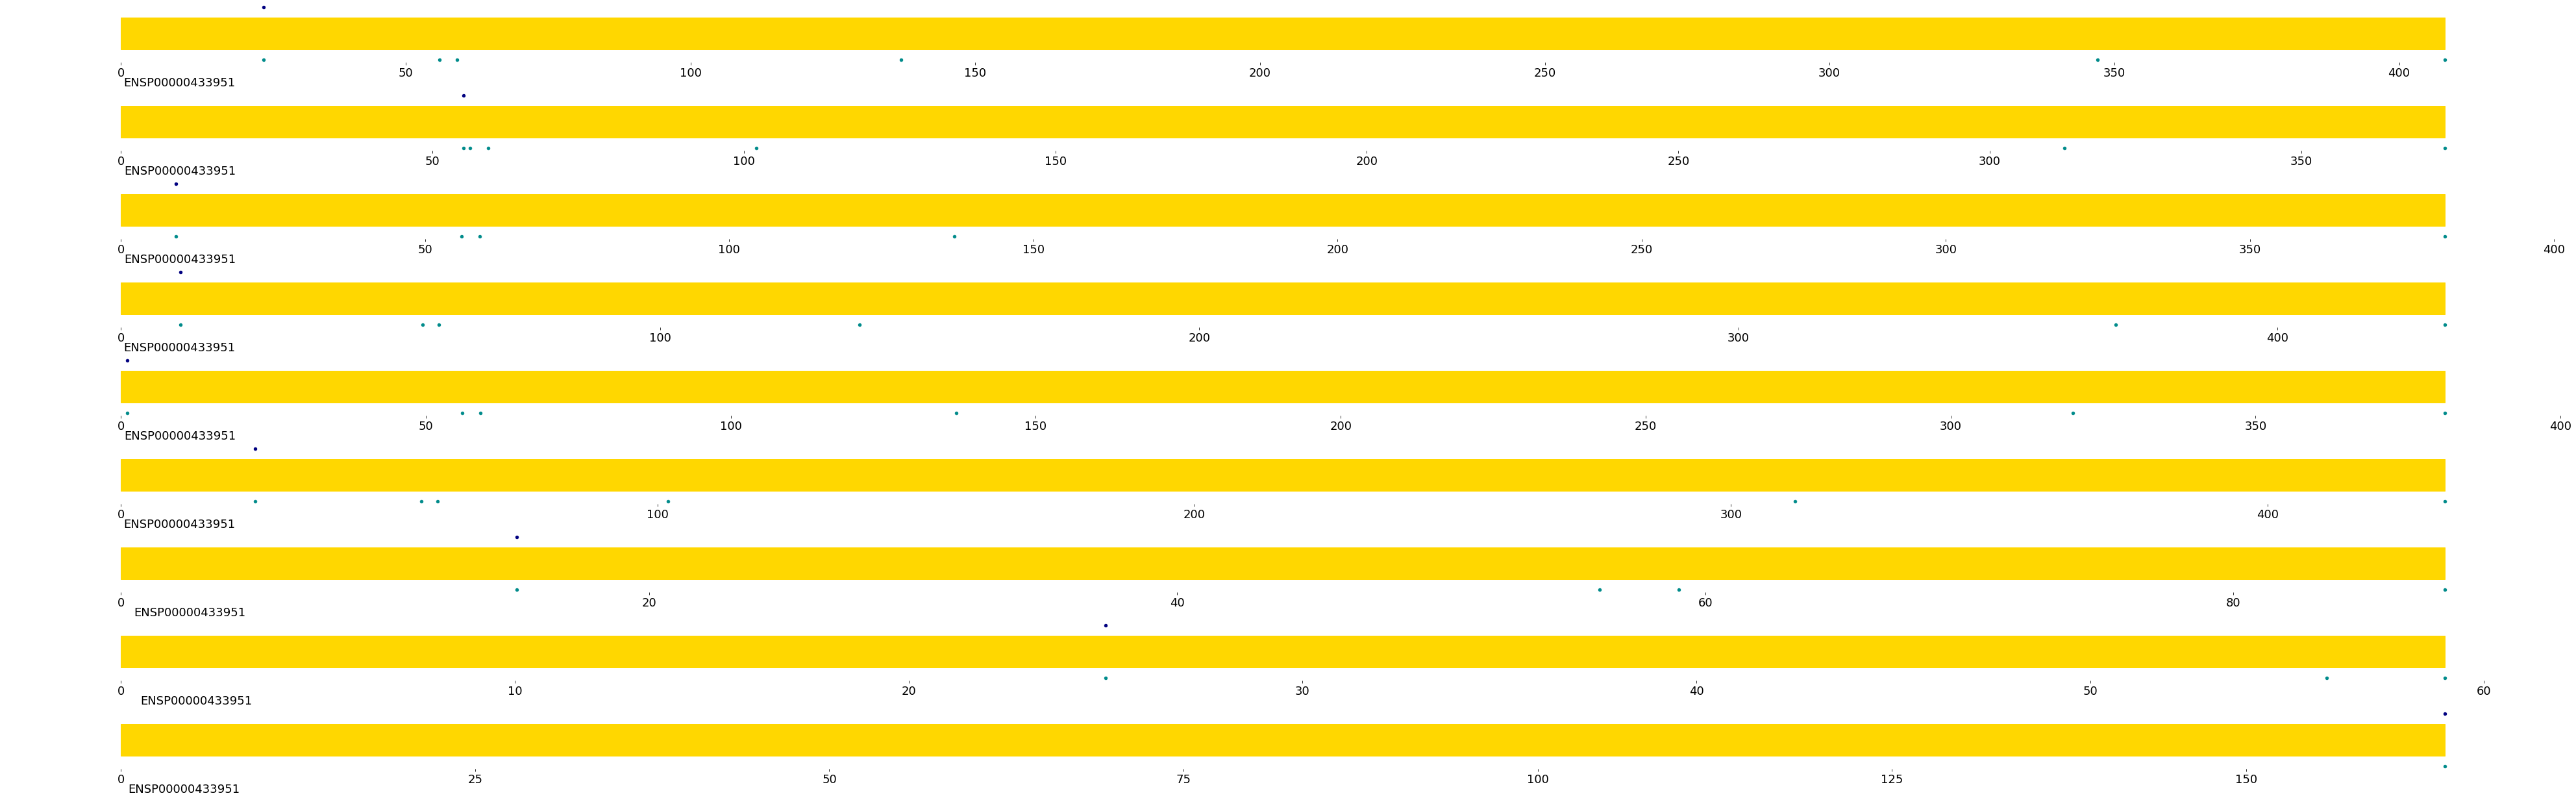

In [16]:
# Creating plots for the genes present in both levels. These plots will have two rows of dots: one for each level.

for gene in genes:
    if int(info_df['variants'][info_df['gene'] == gene]) > 10:
        gene_df = var_gene_names[var_gene_names['gene_name'] == gene]
        gene_df2 = var_gene_names2[var_gene_names2['gene_name'] == gene]
            
        number_of_transcr = int(info_df['transcripts'][info_df['gene'] == gene])
        fig = plt.figure(figsize=(55, (number_of_transcr * 2 - 1)), constrained_layout=True)
        gs = GridSpec(number_of_transcr, 1, figure=fig)
        
        pos_of_subplot = 0
        for transcriptID in gene_df2['transcript_id'].unique().tolist():
            single_trans_df = gene_df[gene_df['transcript_id'] == transcriptID].reset_index(drop=True)
            sequence = single_trans_df['unmodified_sequence'][0]
            protein_change = single_trans_df['protein_change'].drop_duplicates().tolist()
            protein_change.sort(key = lambda x: int(x.split(':')[0]))
            
            ### position1
            sequence_pos = []
            sequence = single_trans_df['unmodified_sequence'][0]
            for change in protein_change:
                if change[0] != '-':
                    pos = int(change.split(':')[0]) + 1
                    #if sequence[:pos][-1] != change.replace('>', ':').split(':')[1]:
                        #print(transcriptID, ' ', change)
                    if pos not in sequence_pos:
                        sequence_pos.append(pos)
                                    
            single_trans_df2 = gene_df2[gene_df2['transcript_id'] == transcriptID].reset_index(drop=True)
            sequence2 = single_trans_df2['unmodified_sequence'][0]
            cDNA_change2 = single_trans_df2['protein_change'].drop_duplicates().tolist()
            cDNA_change2.sort(key = lambda x: int(x.split(':')[0]))
                        
            ### position2
            sequence_pos2 = []
            sequence2 = single_trans_df2['unmodified_sequence'][0]
            for change in cDNA_change2:
                if change[0] != '-':
                    pos2 = int(change.split(':')[0]) + 1
                    if pos2 not in sequence_pos2:
                        sequence_pos2.append(pos2)
                        
            y_numbers = str(1) * len(sequence_pos)
            y_int_number_list = []
            for el in y_numbers:
                y_int_number_list.append(int(el))
            y_numbers_2 = str(2) * len(sequence_pos2)
            y_numbers_2_list = []
            for el in y_numbers_2:
                y_numbers_2_list.append(int(el))
            
            ax = fig.add_subplot(gs[pos_of_subplot, :])    
            ax.scatter(sequence_pos, y_int_number_list, s=20, label="all_var", color='darkcyan')
            ax.scatter(sequence_pos2, y_numbers_2_list, s=20, label="short_list", color='navy')
            ax.add_patch(Rectangle((0, 1.2), max(sequence_pos), 0.6, color='gold'))
            ax.yaxis.set_visible(False)
            ax.spines[["left", "top", "right", "bottom"]].set_visible(False)
            ax.text(0.5, 0.5, proteinID, fontsize=18)
            ax.tick_params(labelsize=18)
            pos_of_subplot = pos_of_subplot + 1
                
        fig.savefig('/Users/ksenia/Documents/MODY_genes/visualization/' + gene + '_protein281022.png', dpi=300, format='png')
        print(gene)


## 4. Plotting the rest of genes from the level1 table without the level2 variants

These plots will have just one row of dots

In [14]:
level1_only_genes = set(var_gene_names['gene_name'].unique()) - set(var_gene_names2['gene_name'].unique())
level1_only_genes

{'AGPAT2',
 'AKT2',
 'ALMS1',
 'ASB14',
 'BSCL2',
 'CAV1',
 'CAVIN1',
 'EDEM2',
 'EFL1',
 'FOXP1',
 'GATA4',
 'GATA6',
 'GLUD1',
 'GRIN2B',
 'HADH',
 'HBB',
 'HNRNPUL2-BSCL2',
 'IER3IP1',
 'INSR',
 'ITGB3',
 'KCNH2',
 'KMT2E',
 'LAMA2',
 'LEPR',
 'LMNA',
 'MBL2',
 'MC4R',
 'MECP2',
 'NLRP3',
 'PARK7',
 'PAX2',
 'PDIA6',
 'PLIN1',
 'PPARG',
 'PPP1R3A',
 'PRKAG2',
 'RET',
 'SHLD2',
 'SIM1',
 'SLC19A2',
 'WFS1'}

BSCL2
INSR
ALMS1
AGPAT2
HNRNPUL2-BSCL2
GATA6
MC4R
PLIN1
PPARG
LMNA
EFL1
HADH
AKT2
GLUD1
LEPR
PPP1R3A
WFS1
SLC19A2


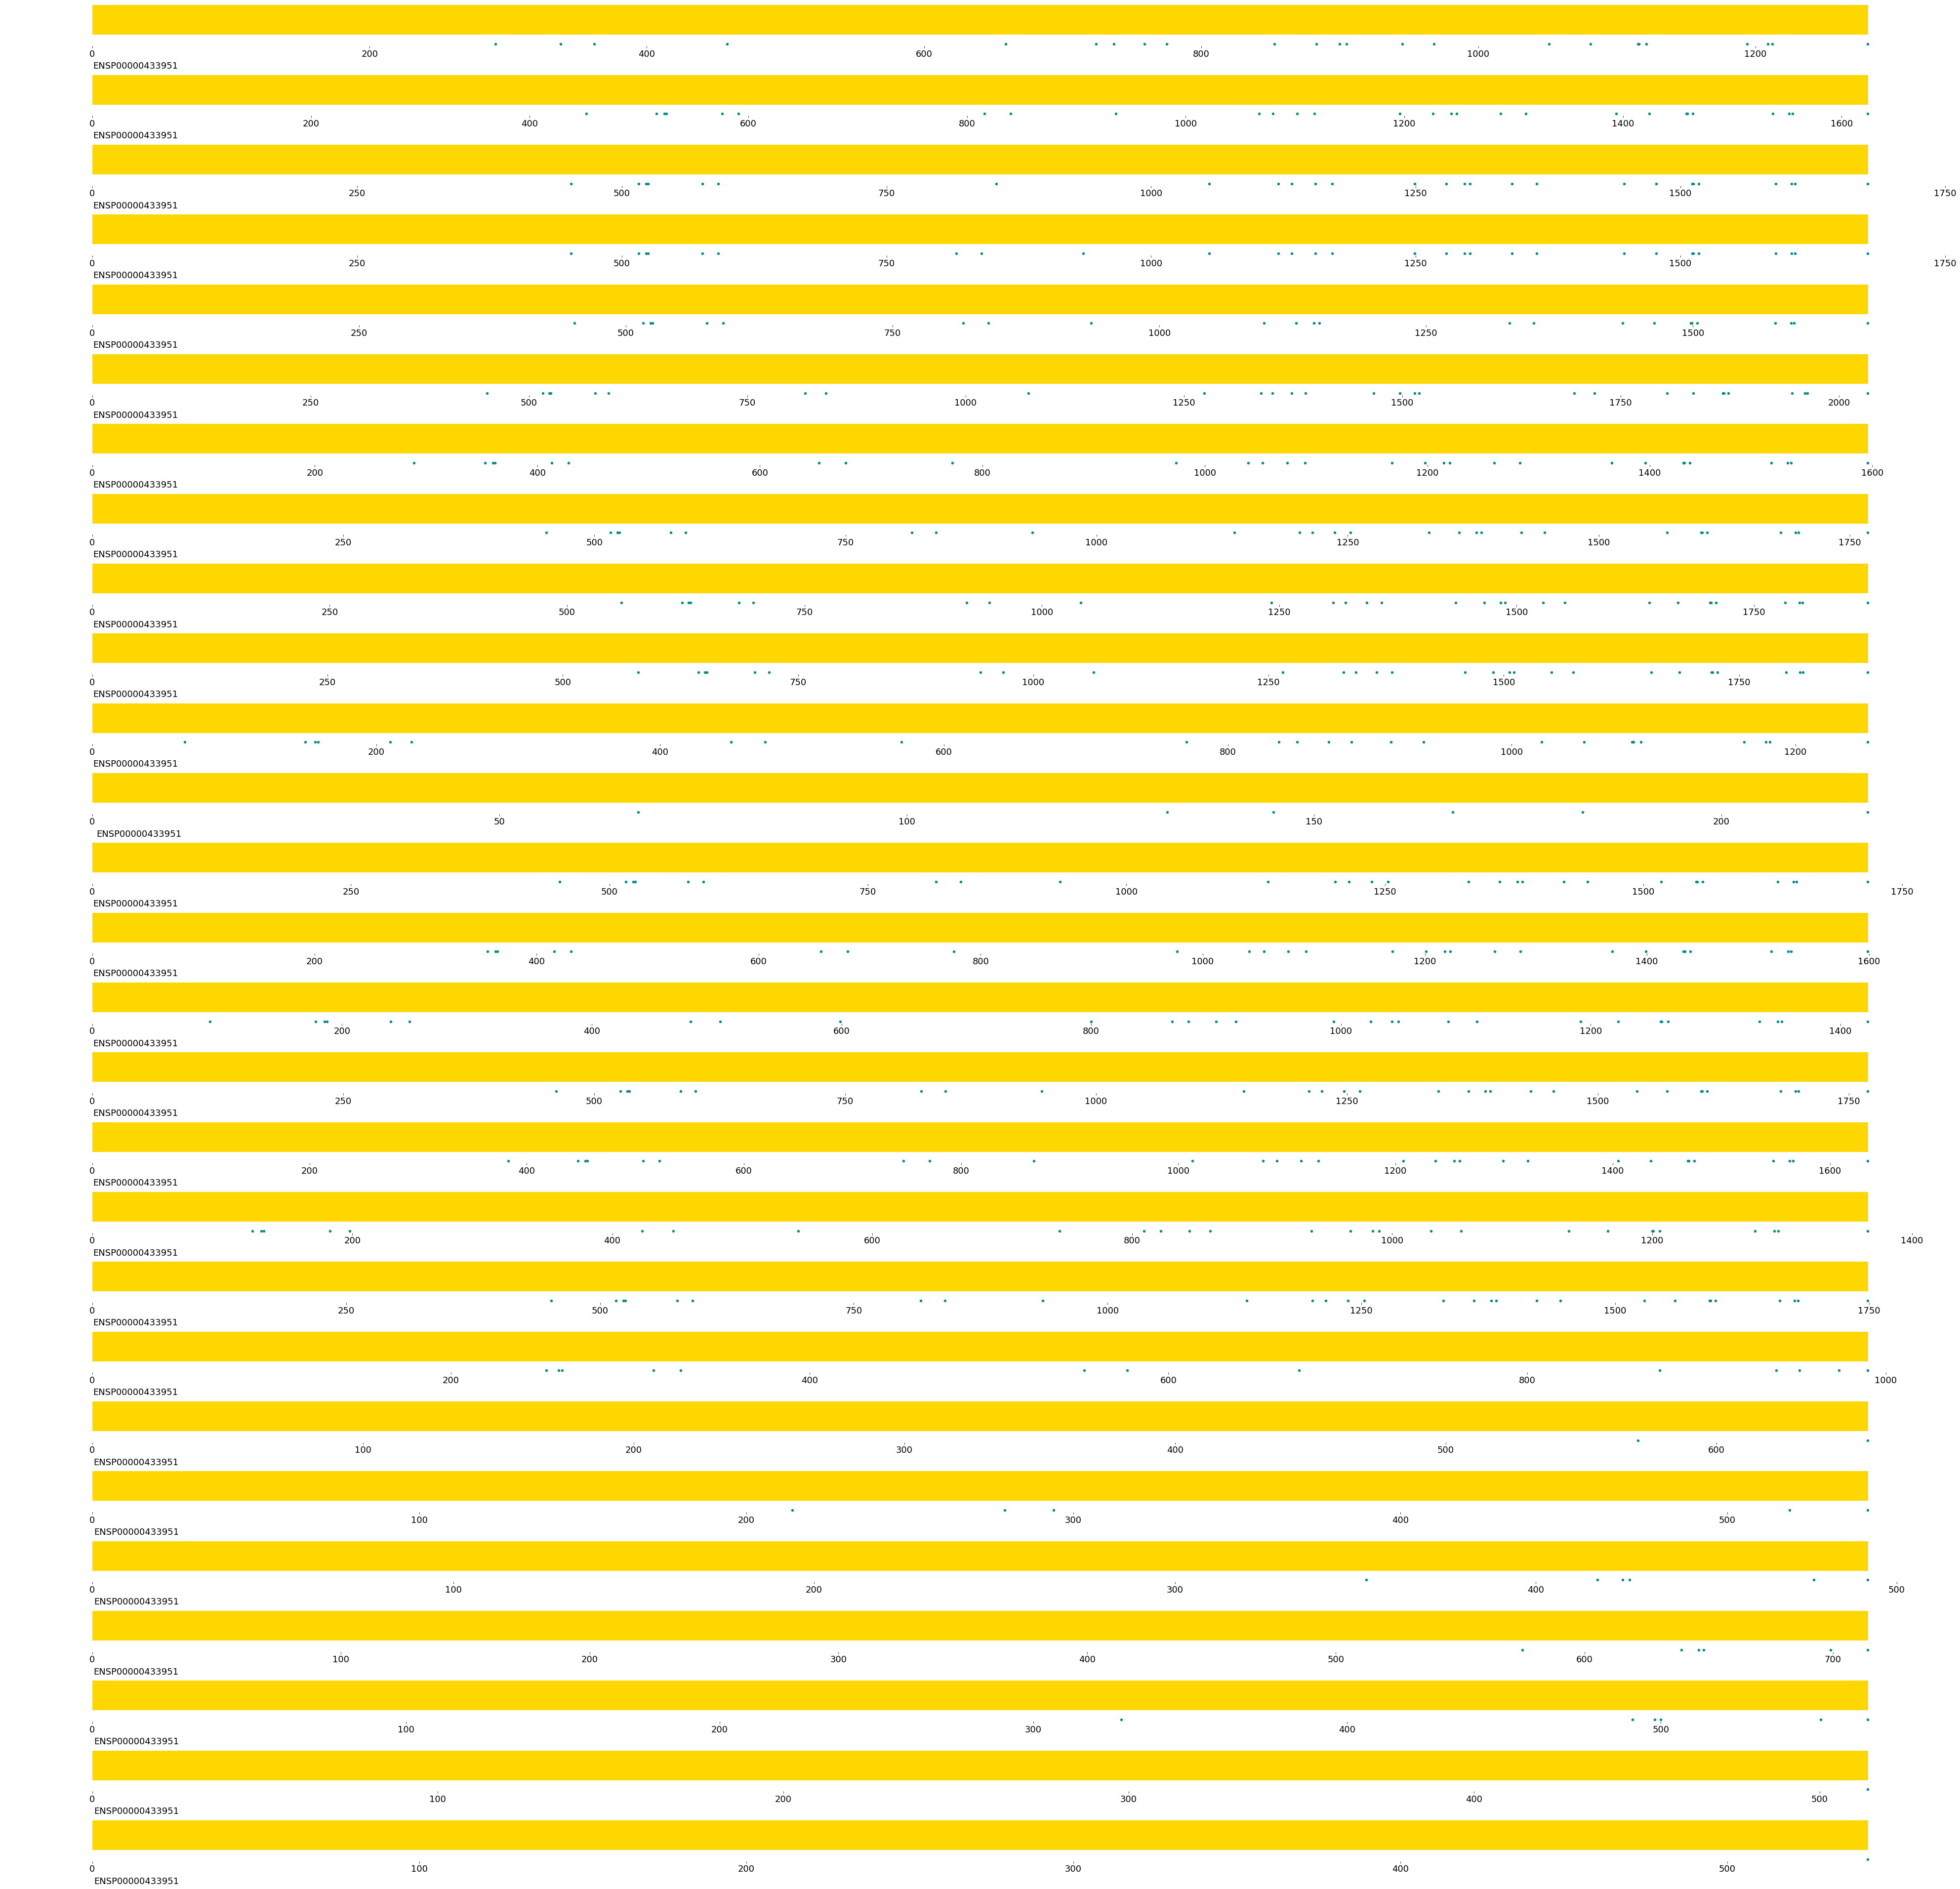

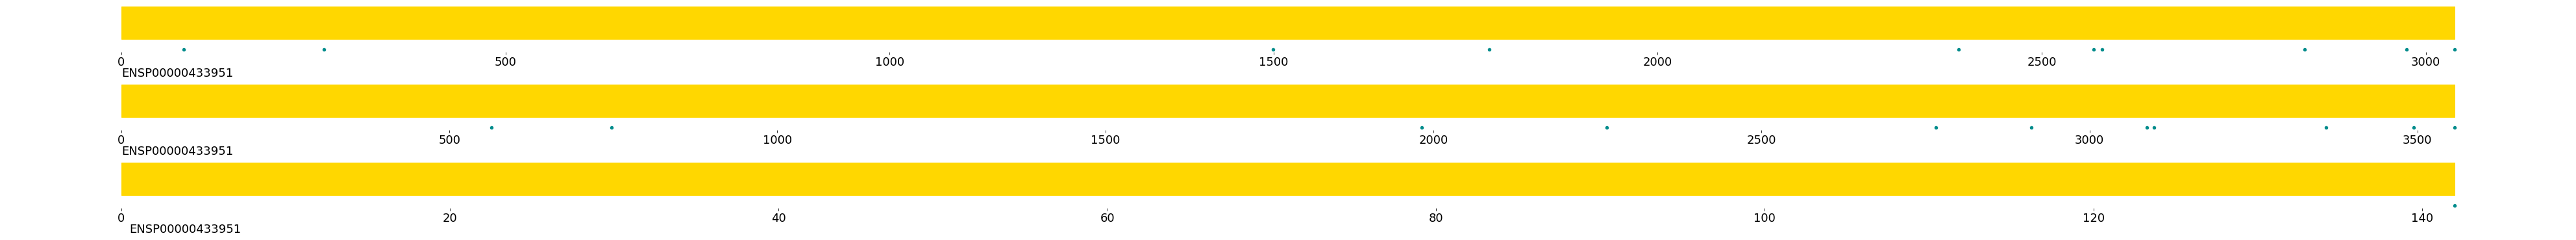

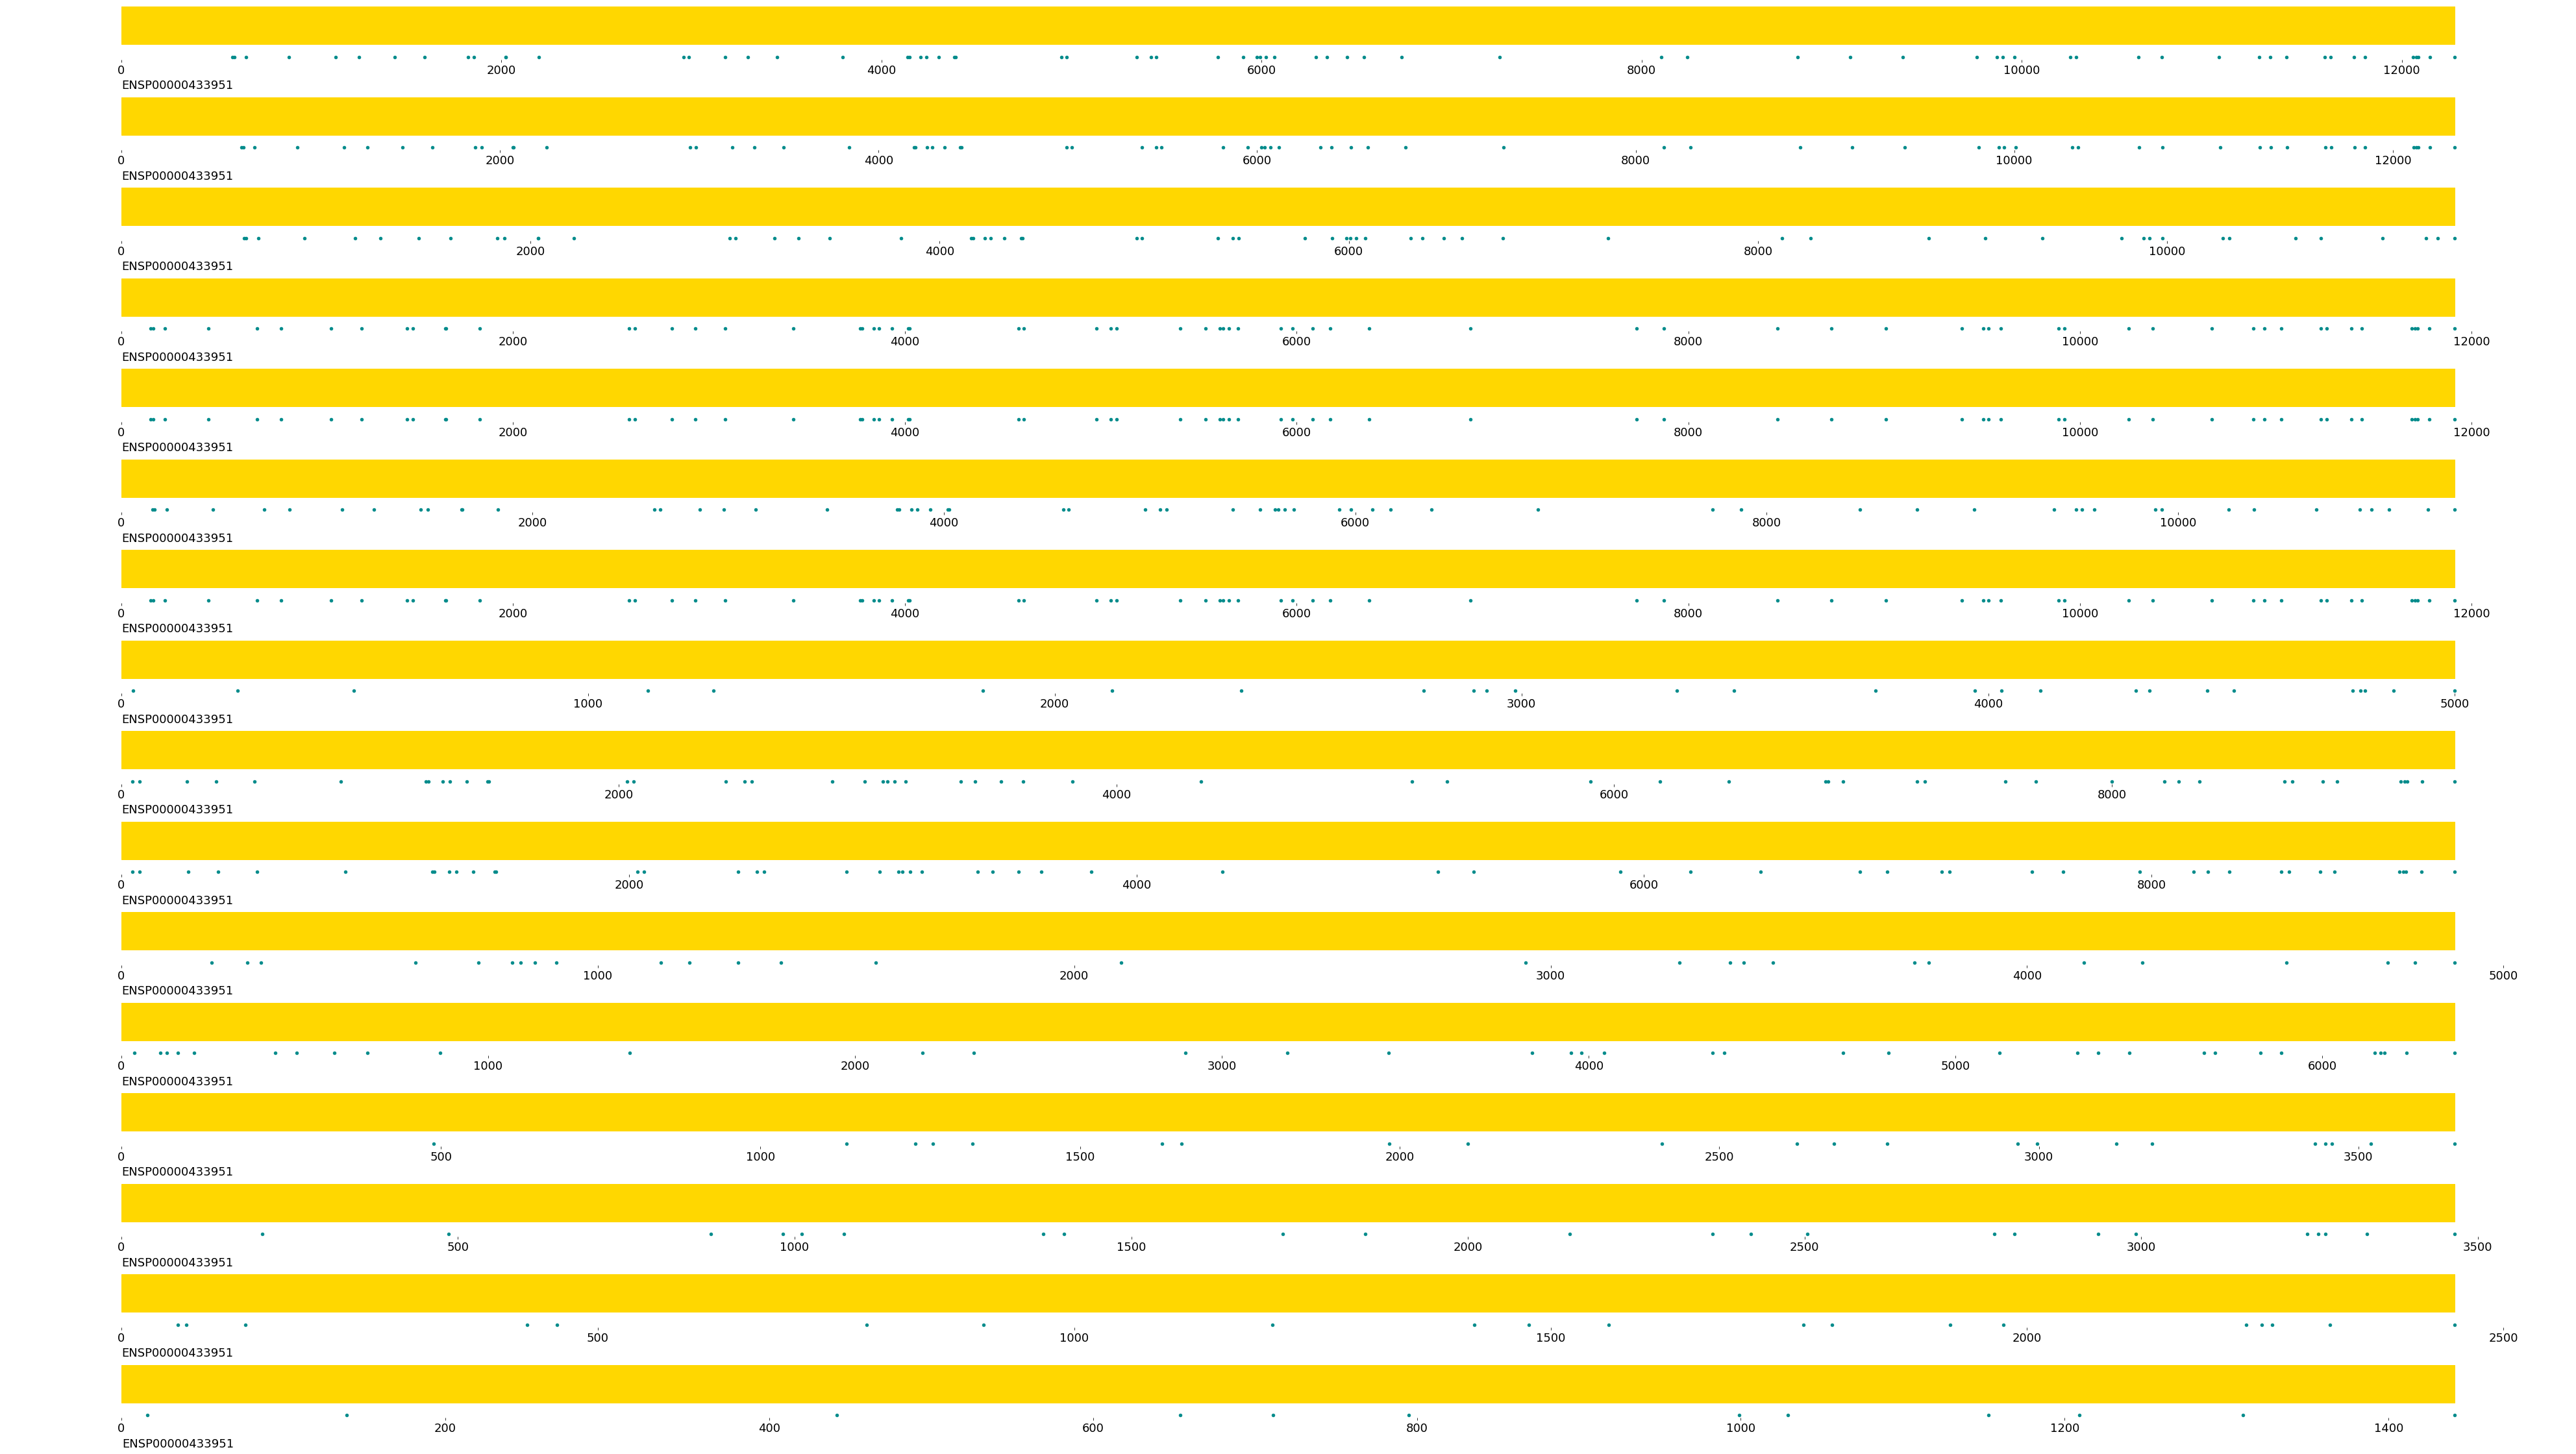

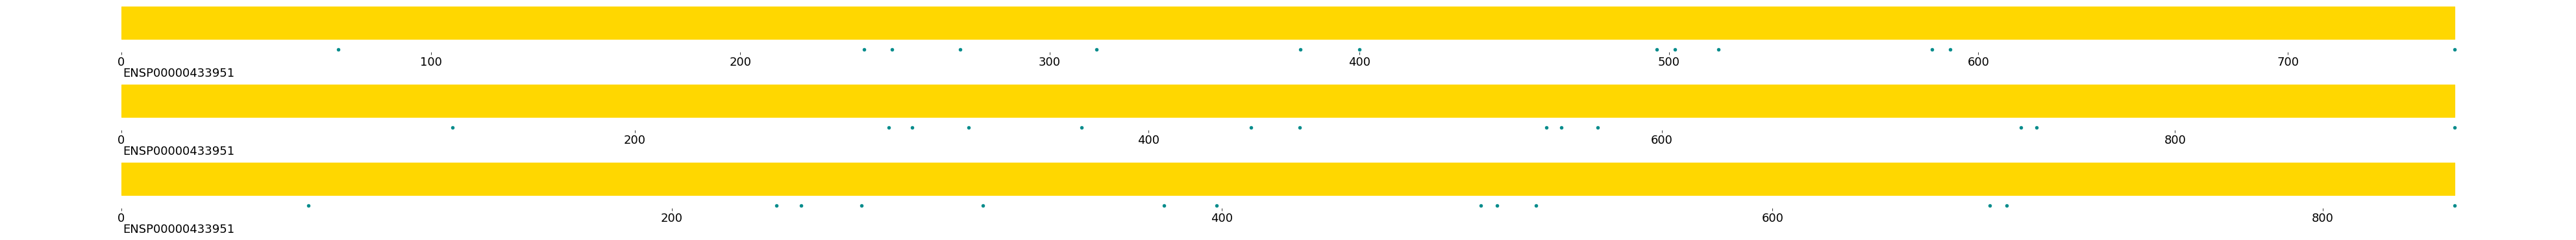

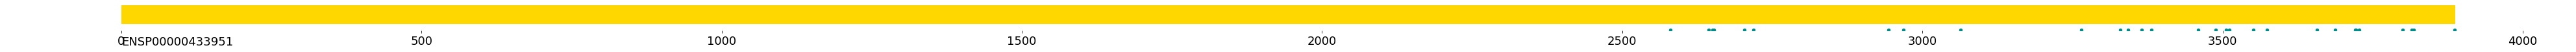

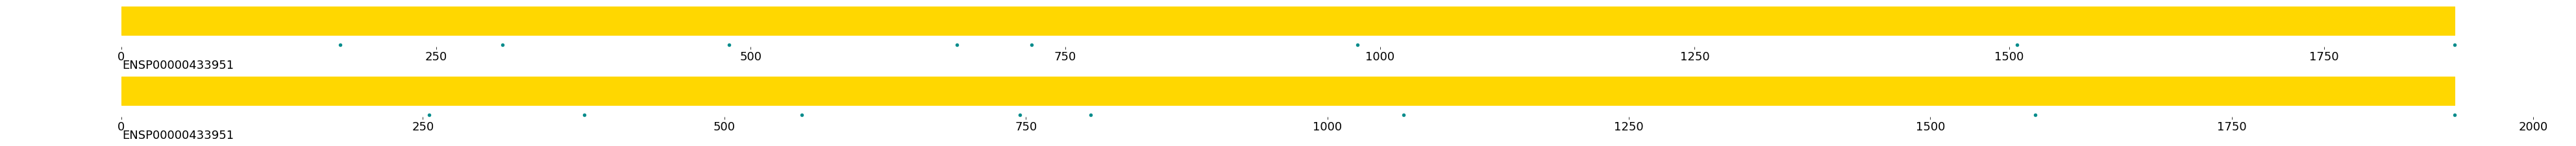

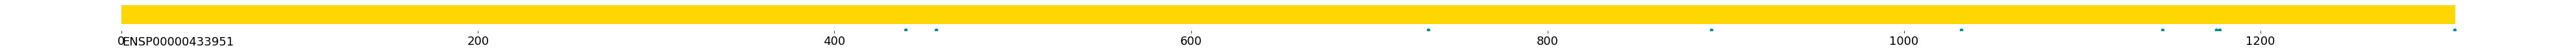

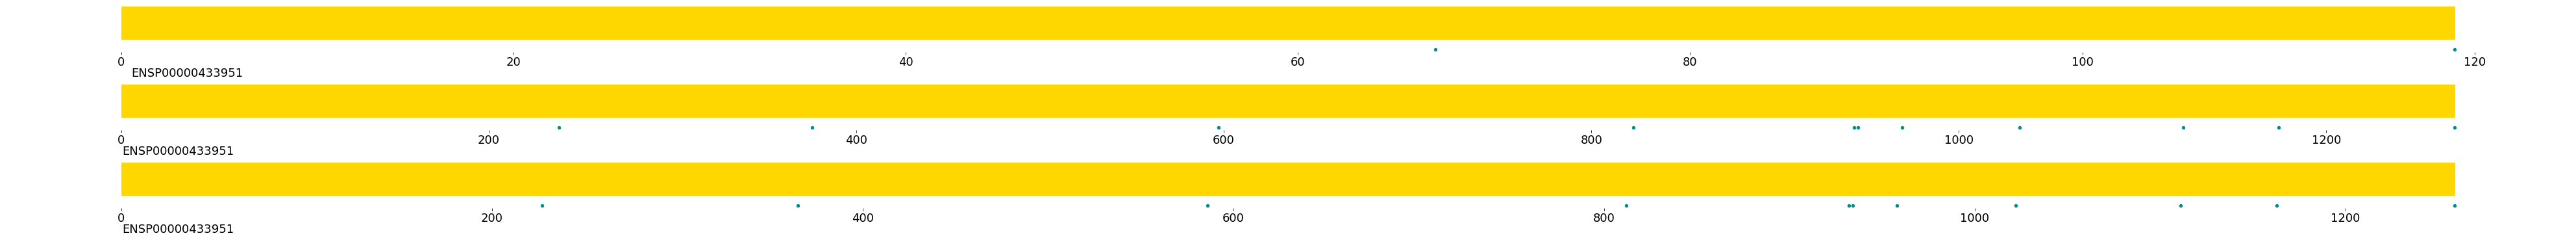

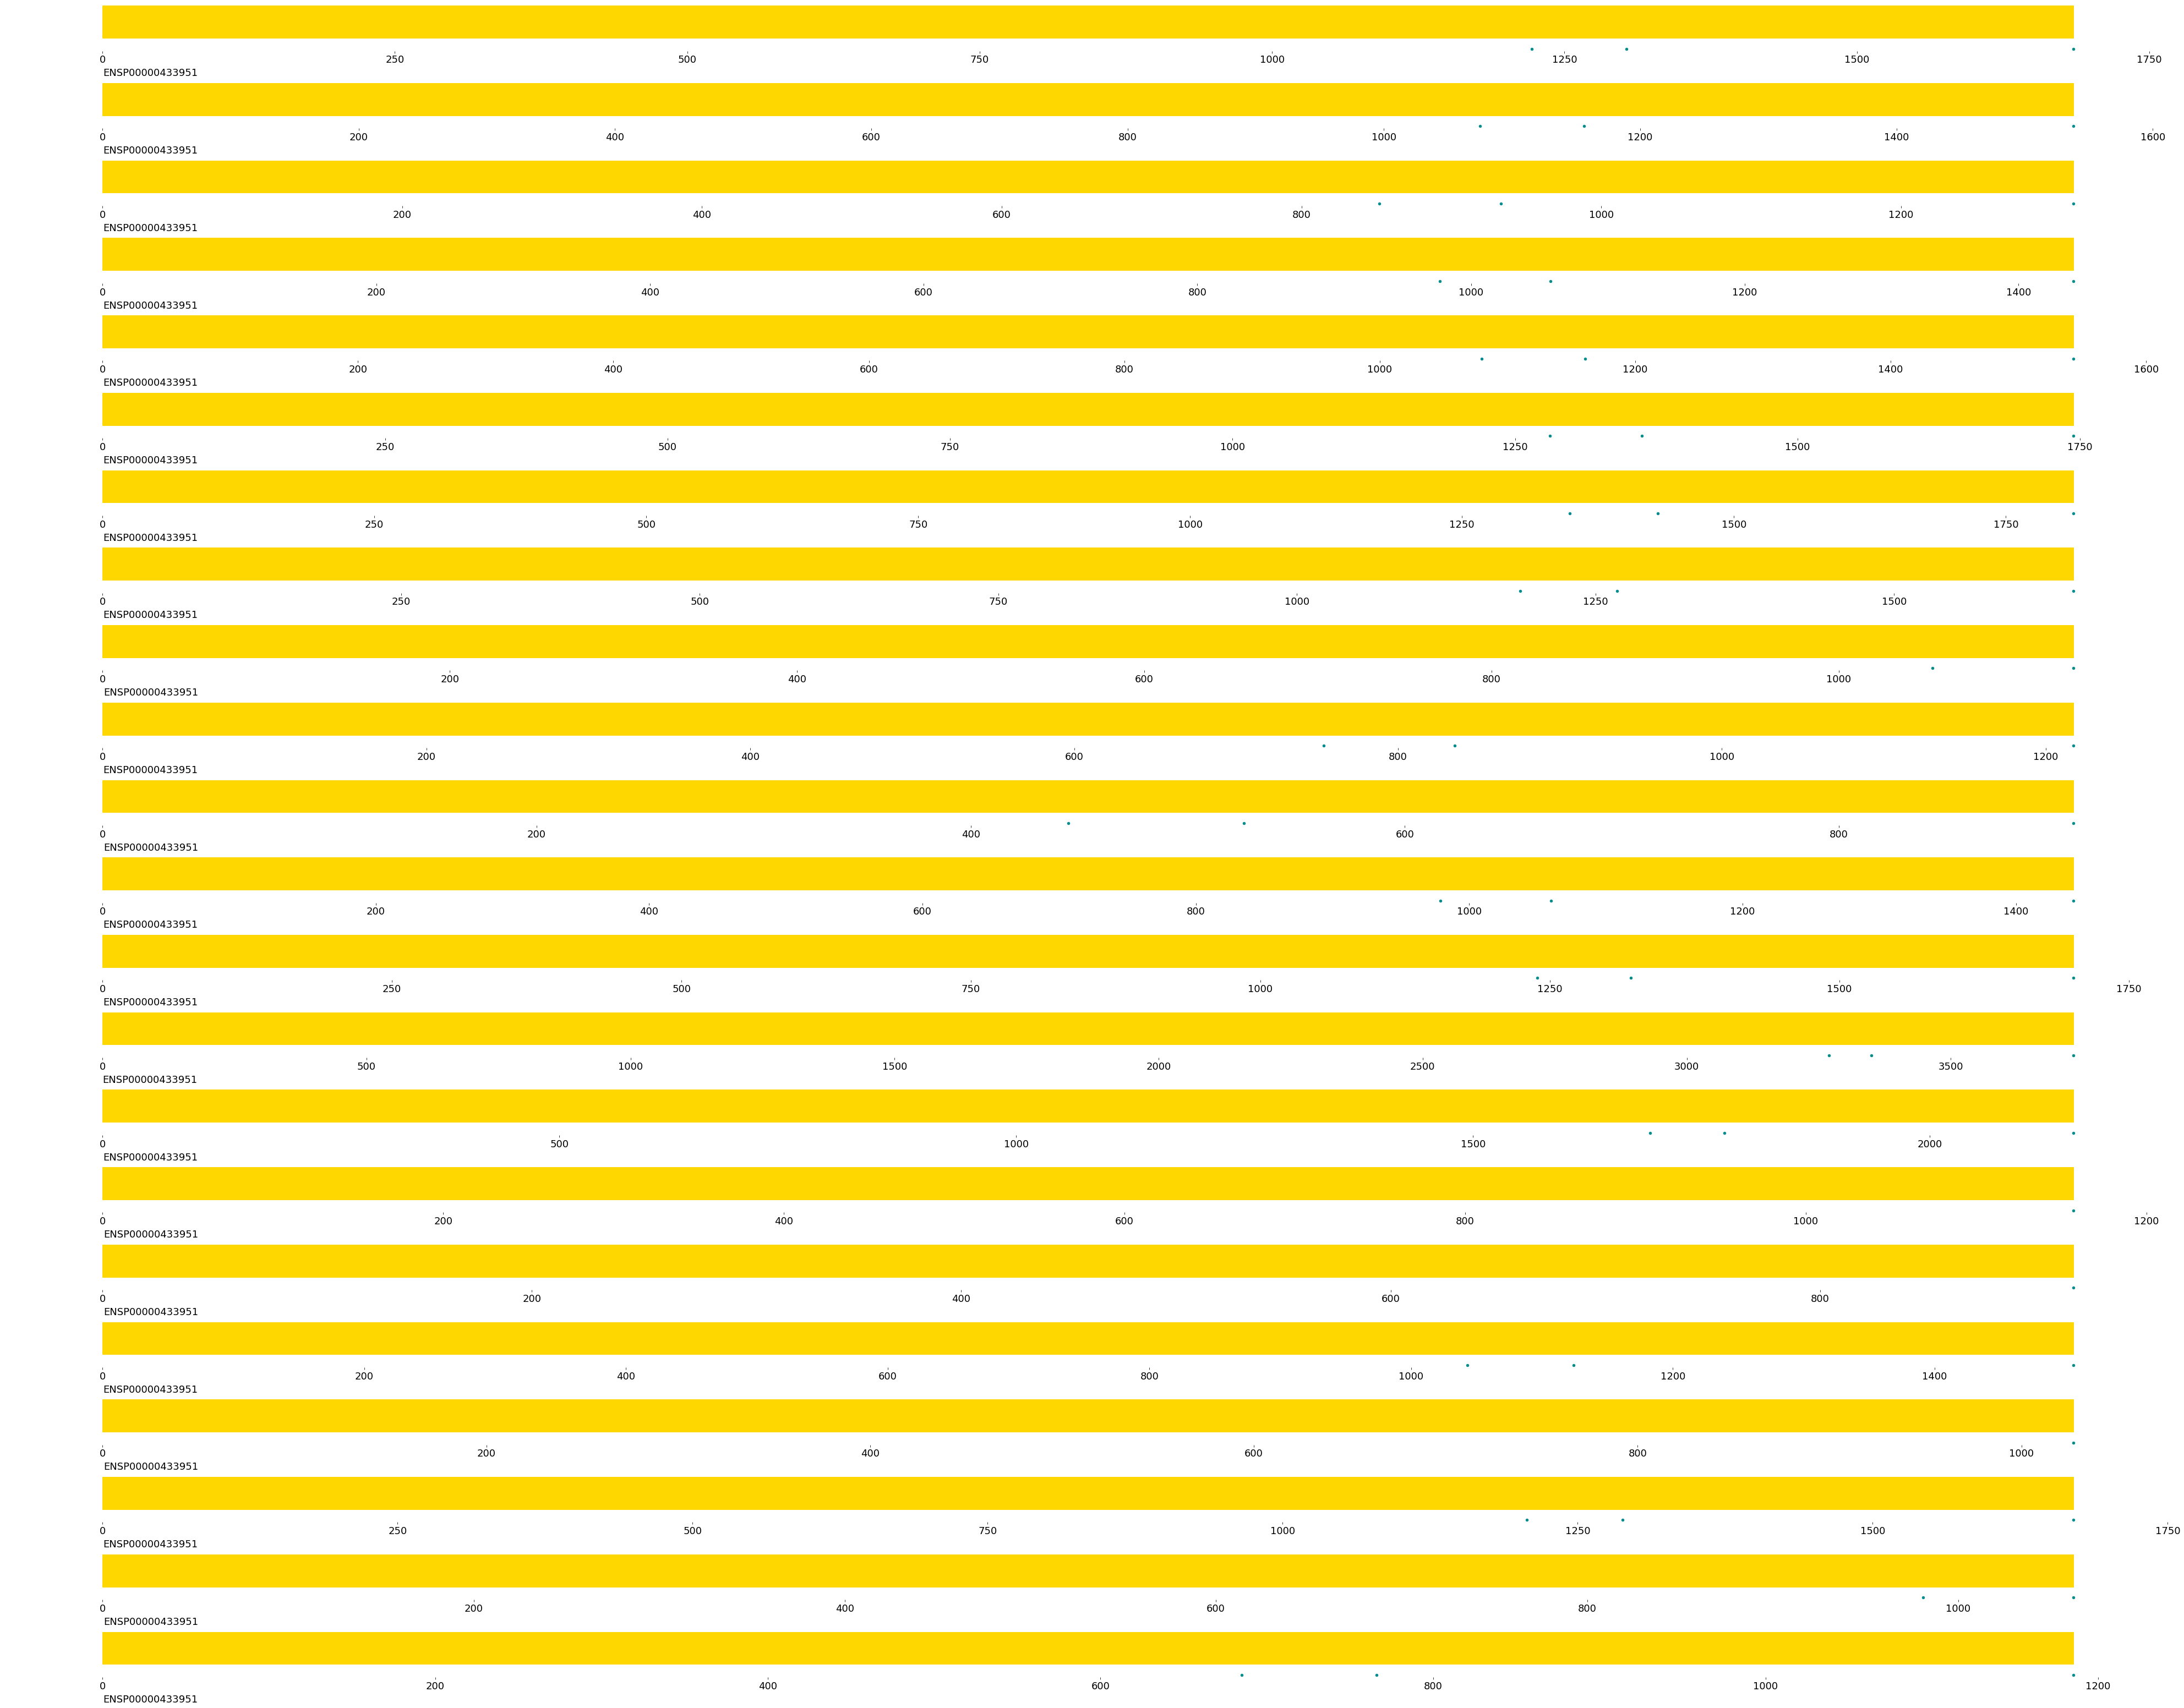

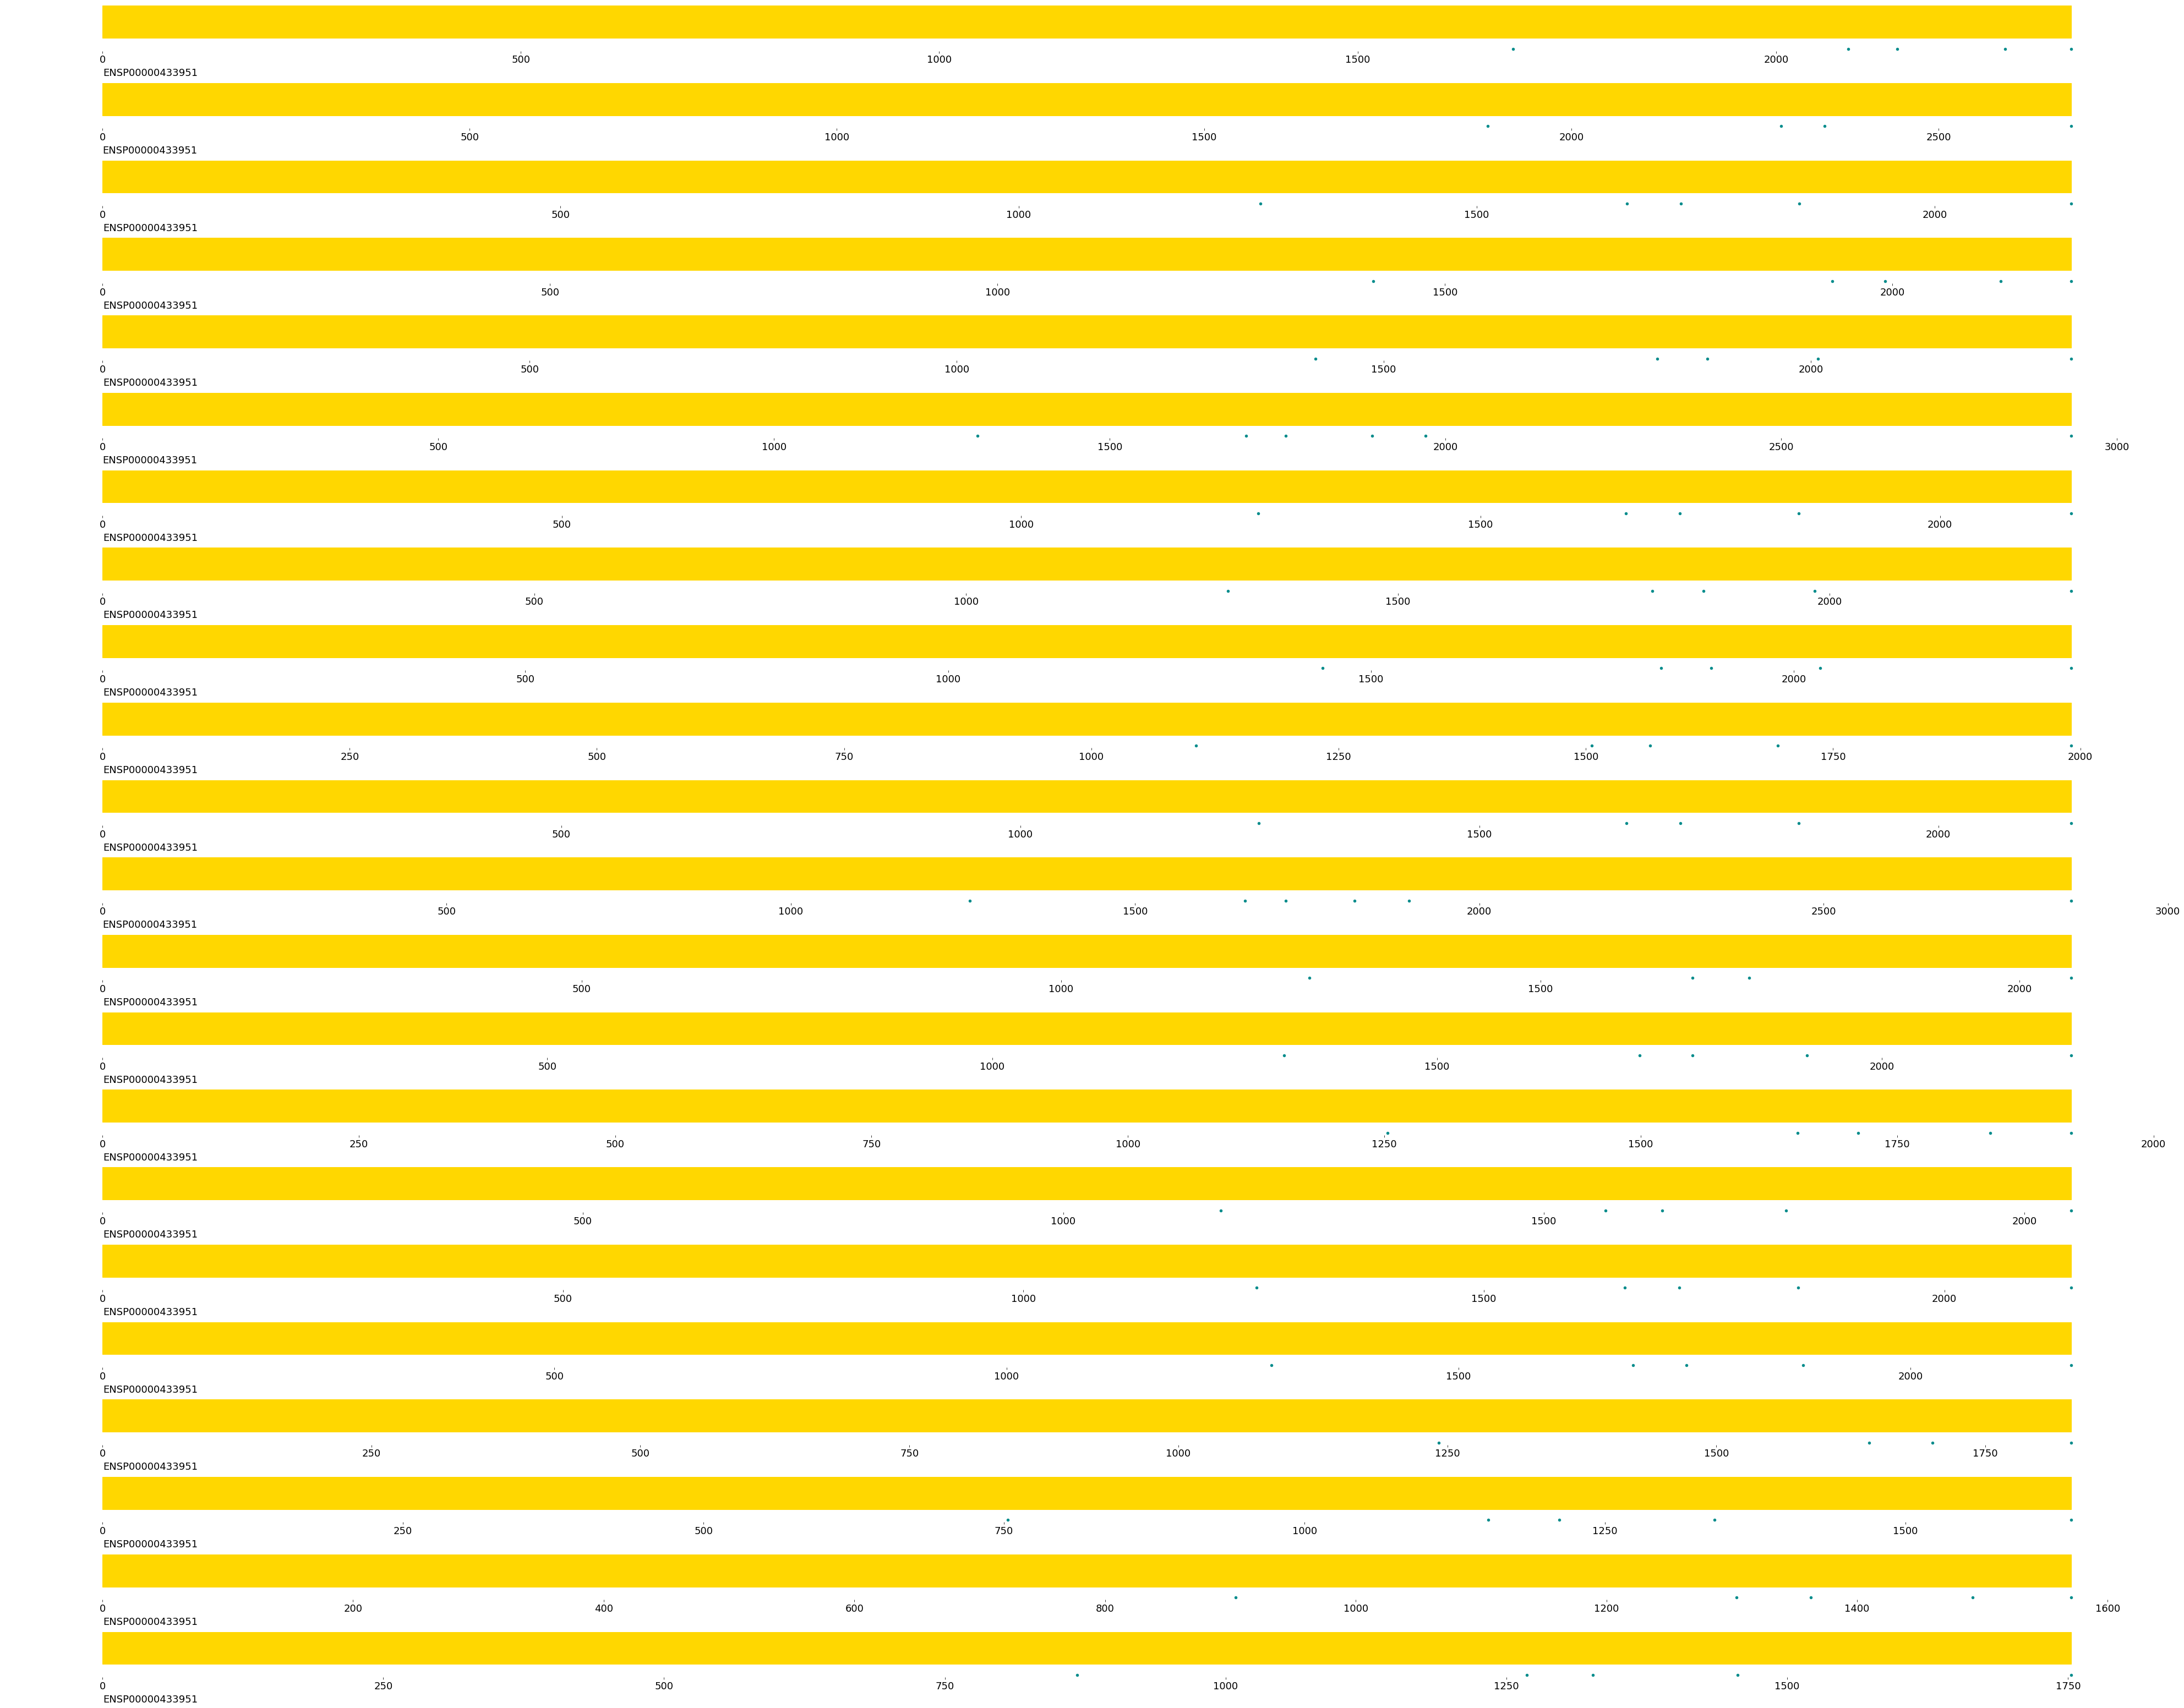

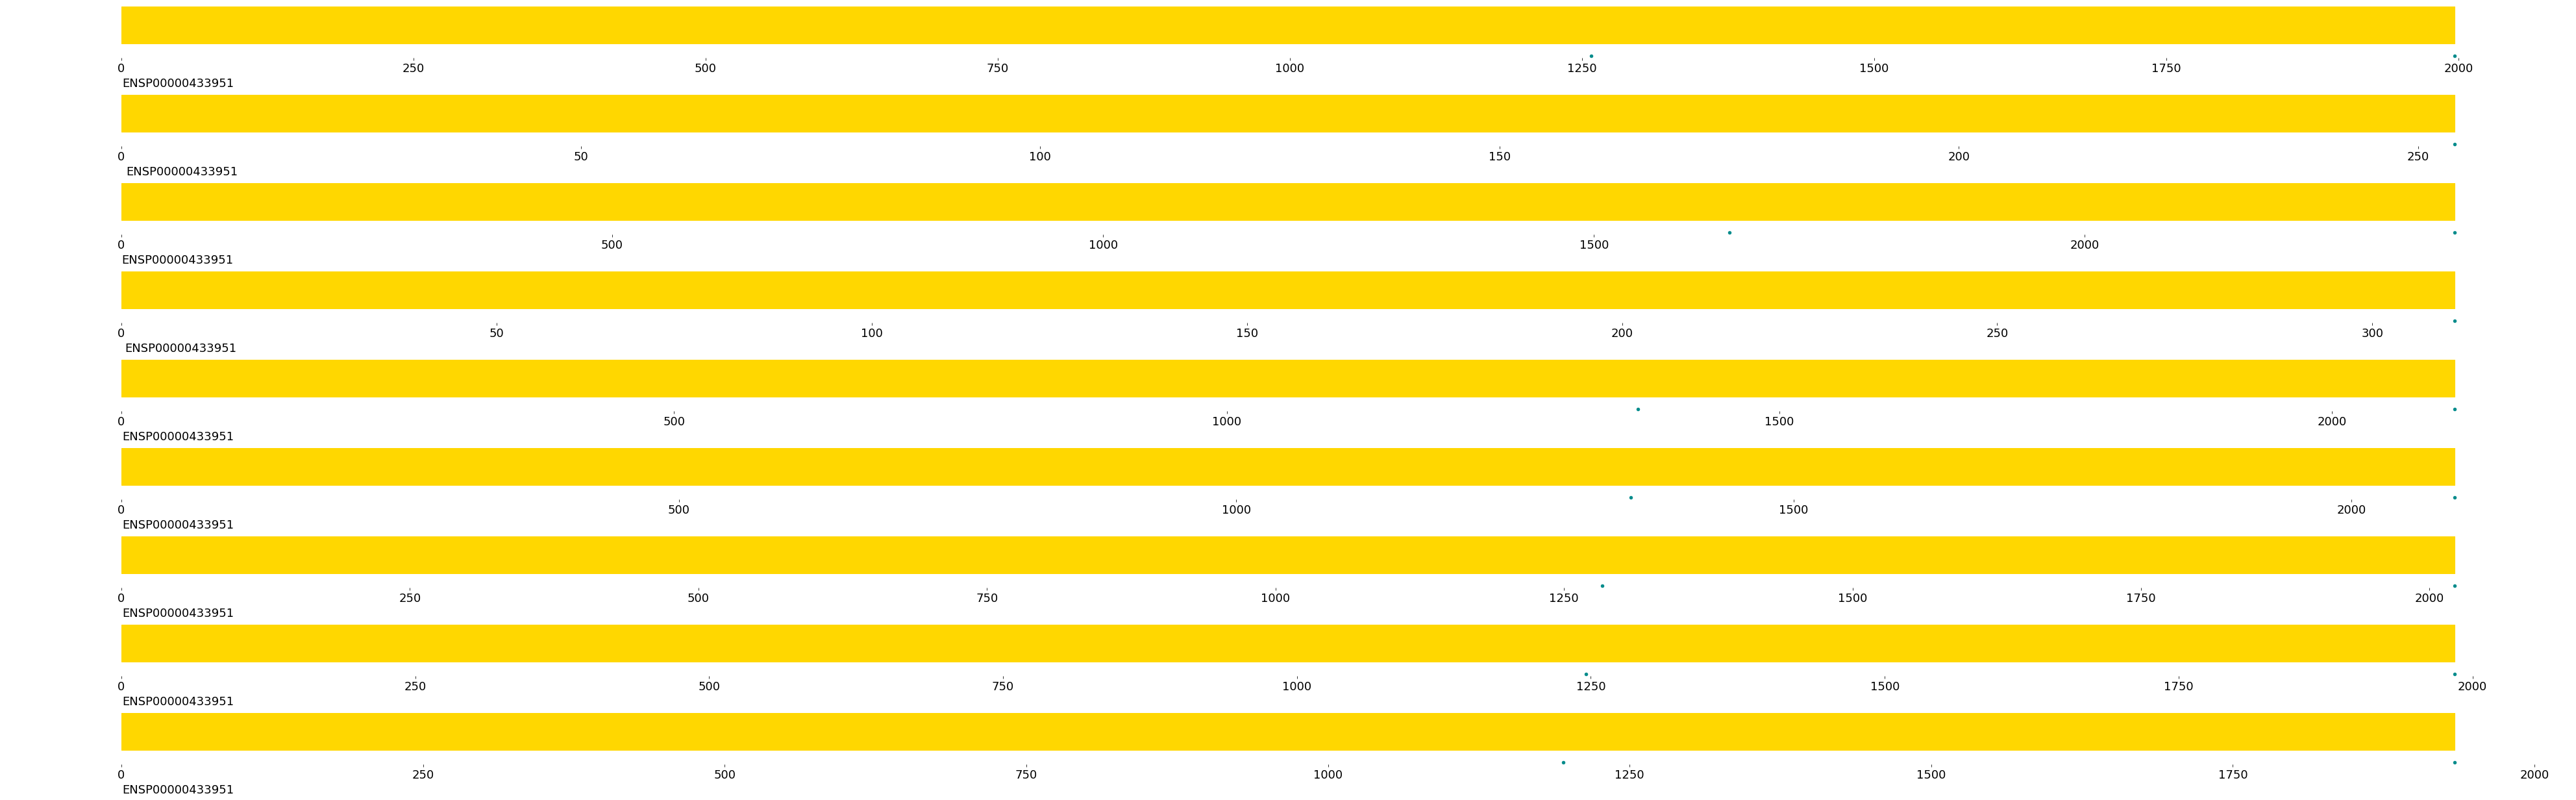

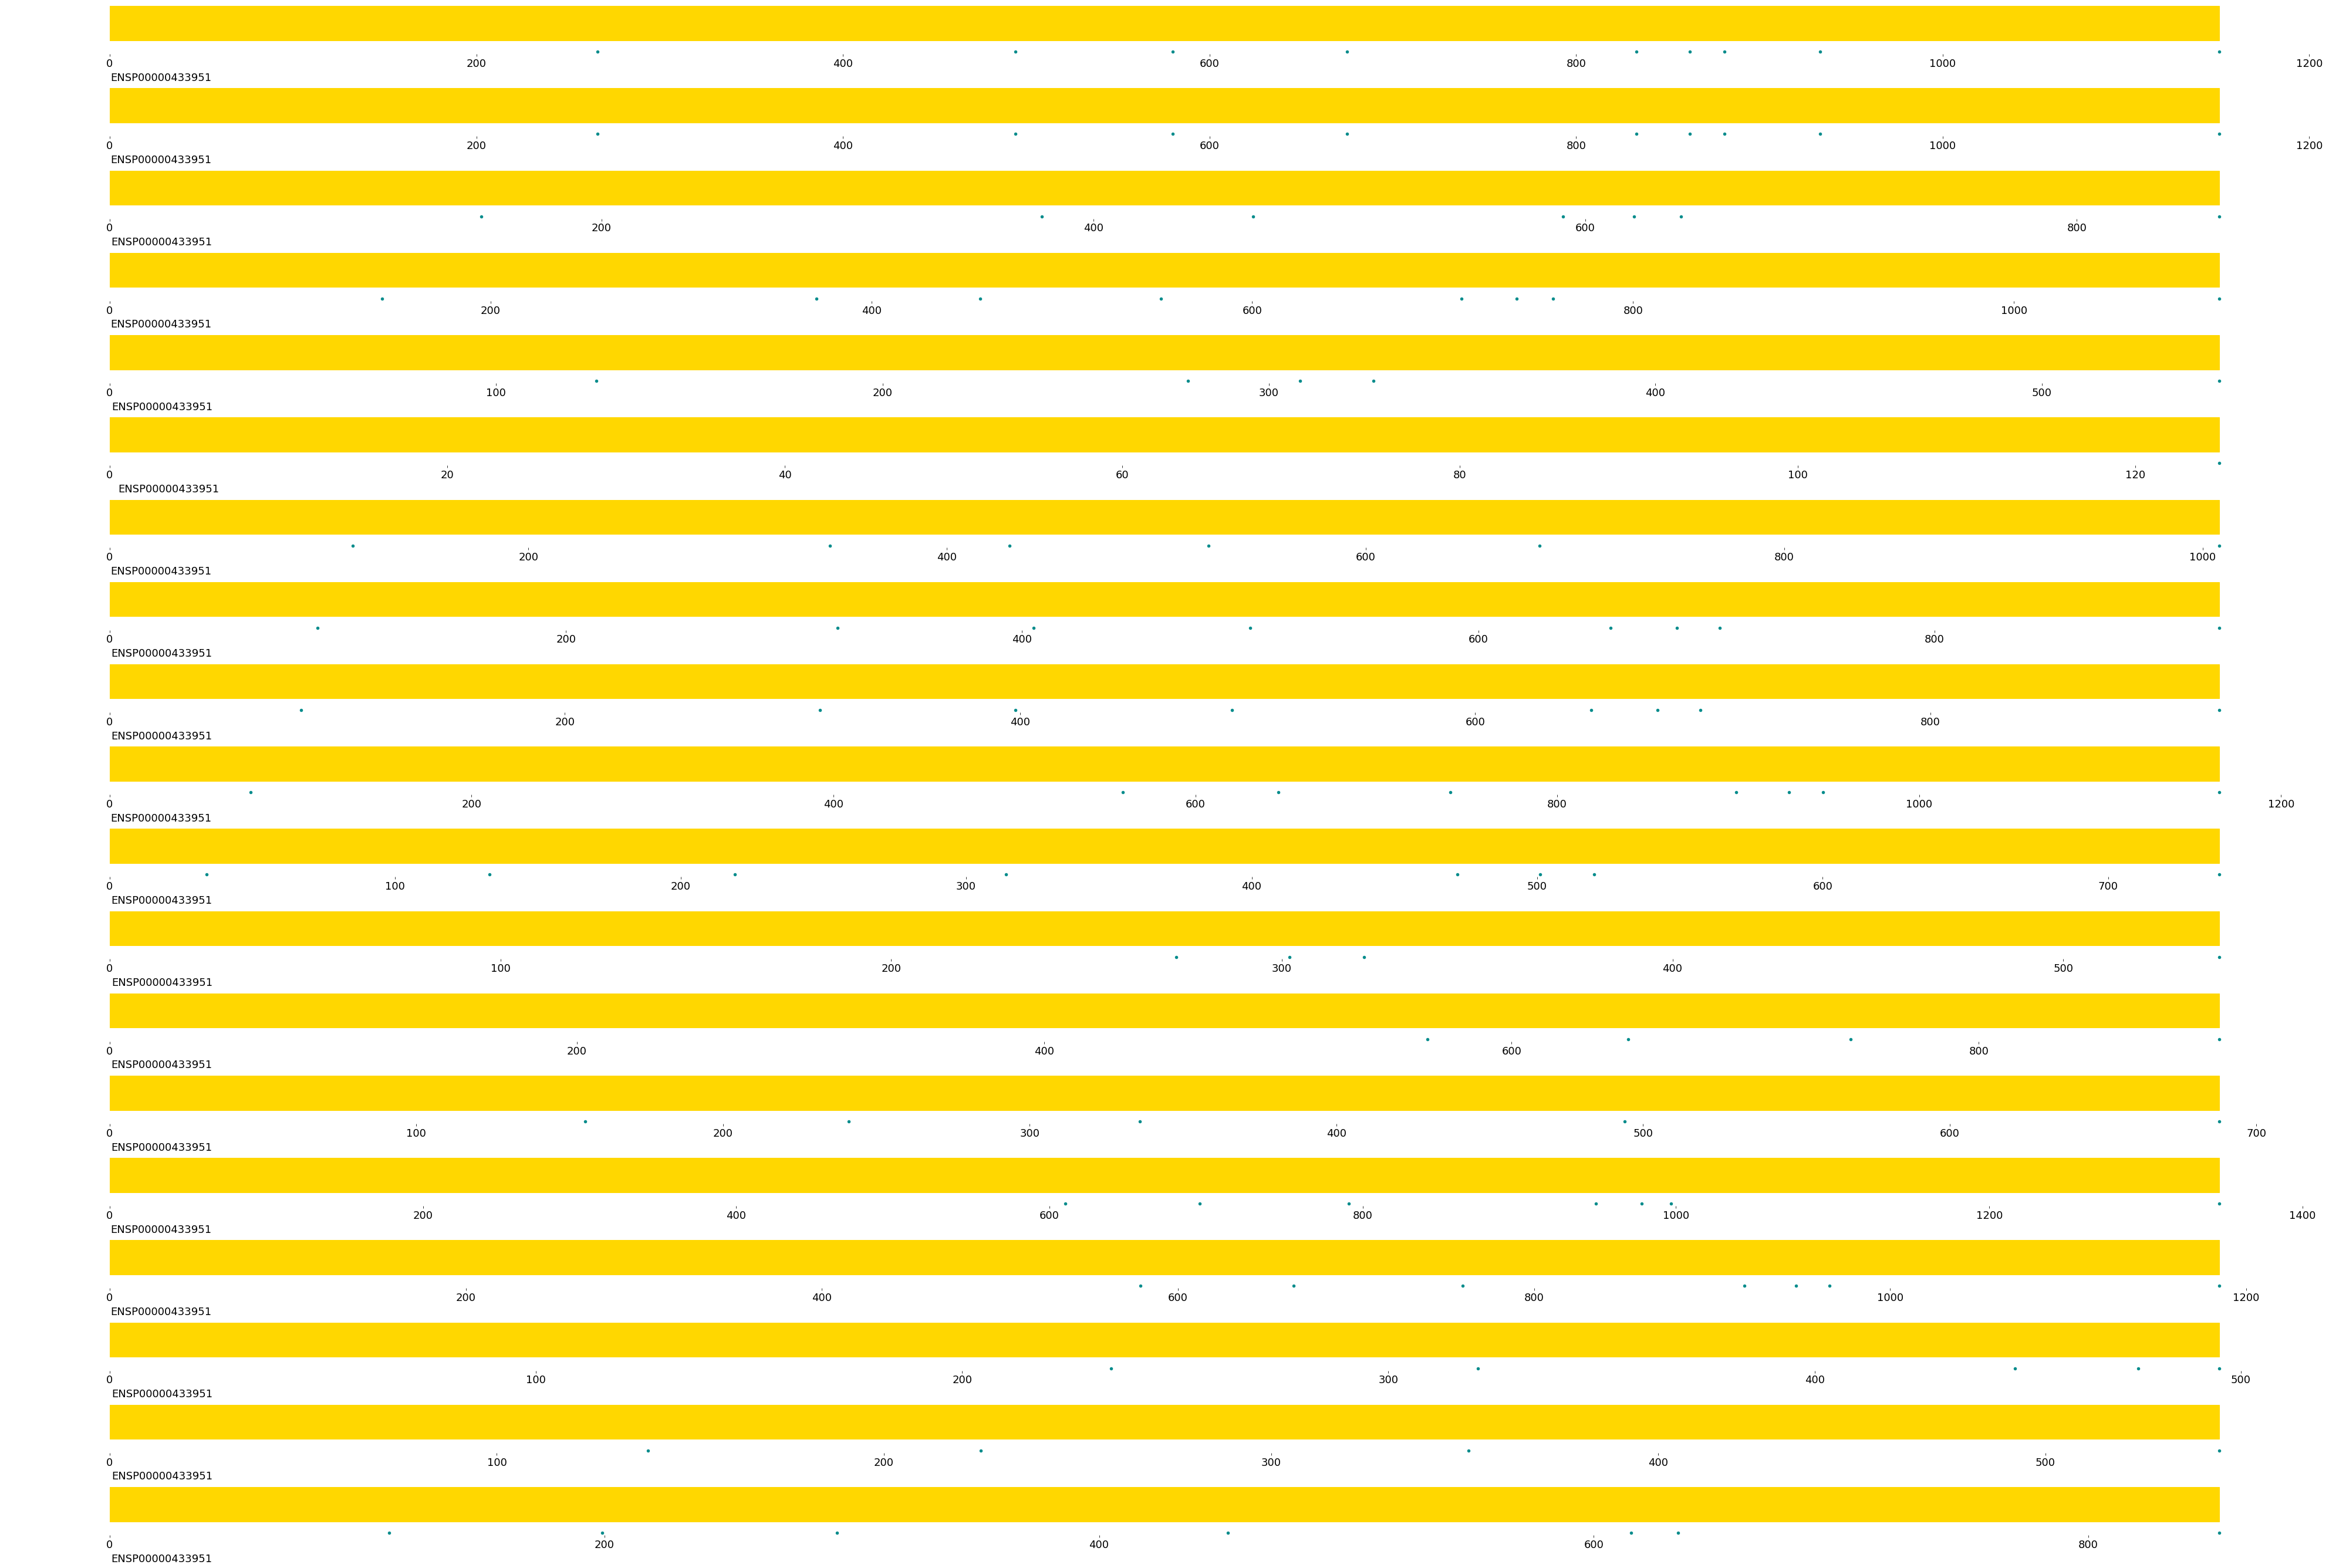

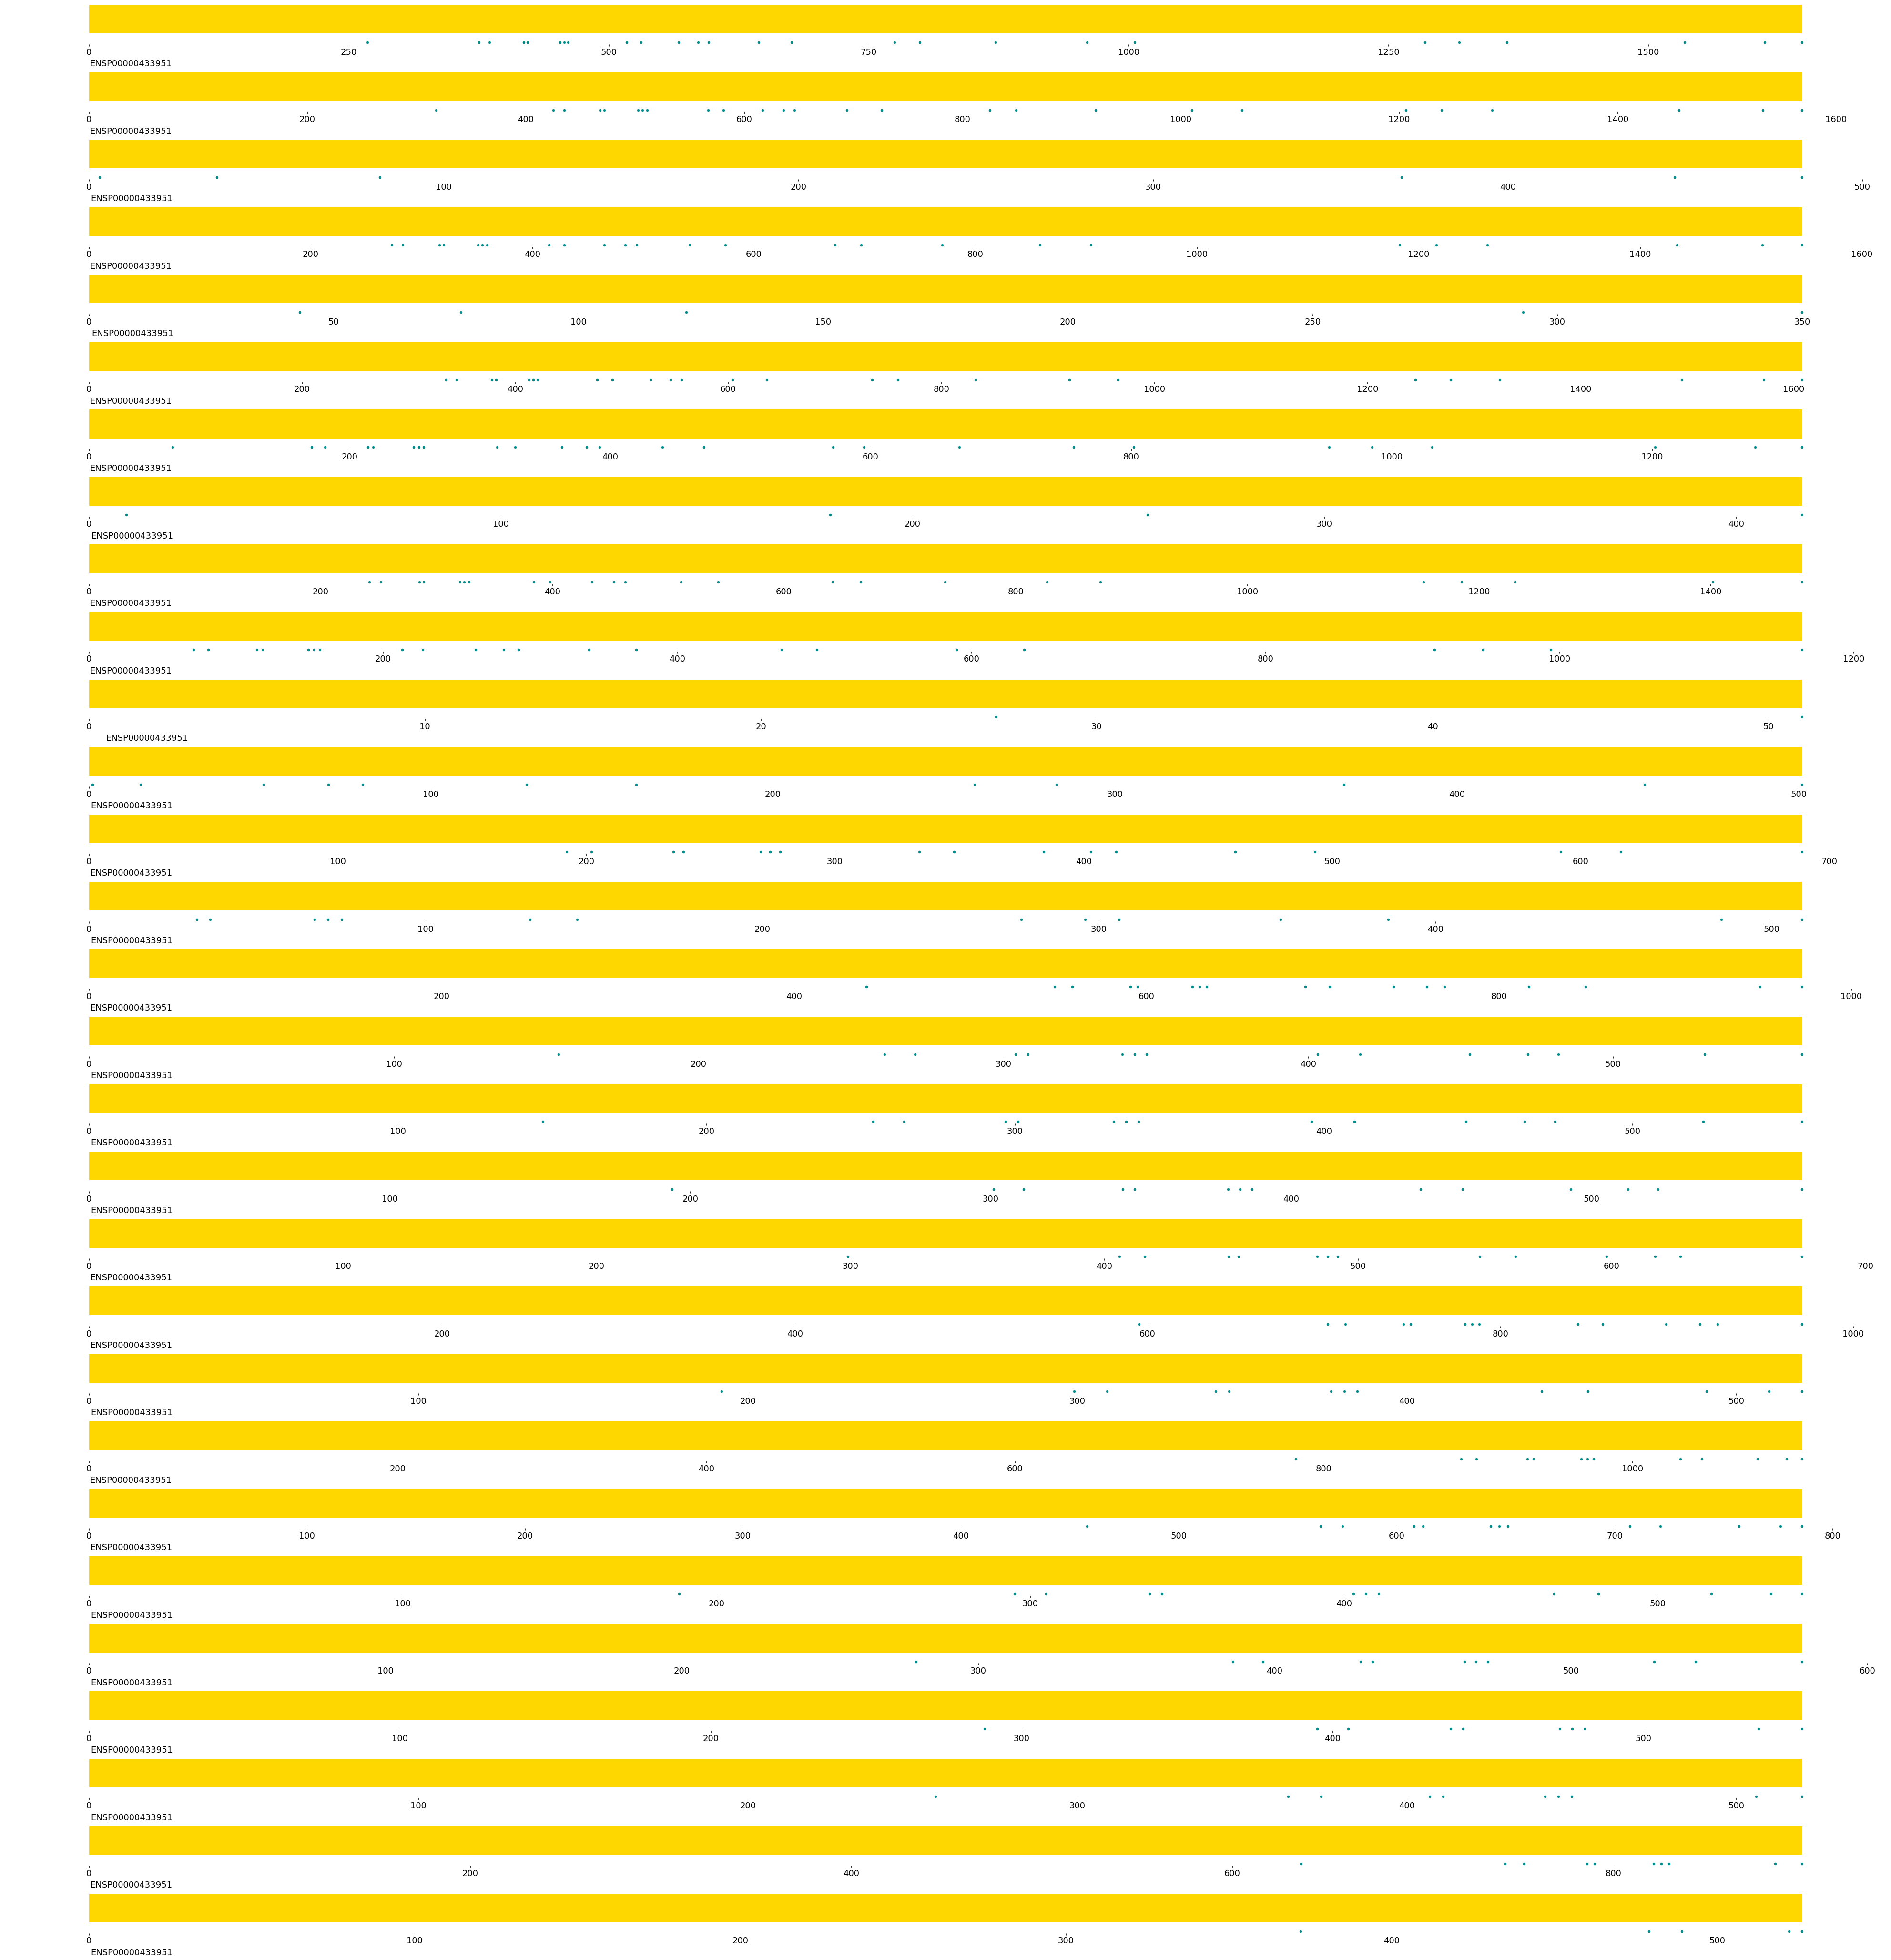

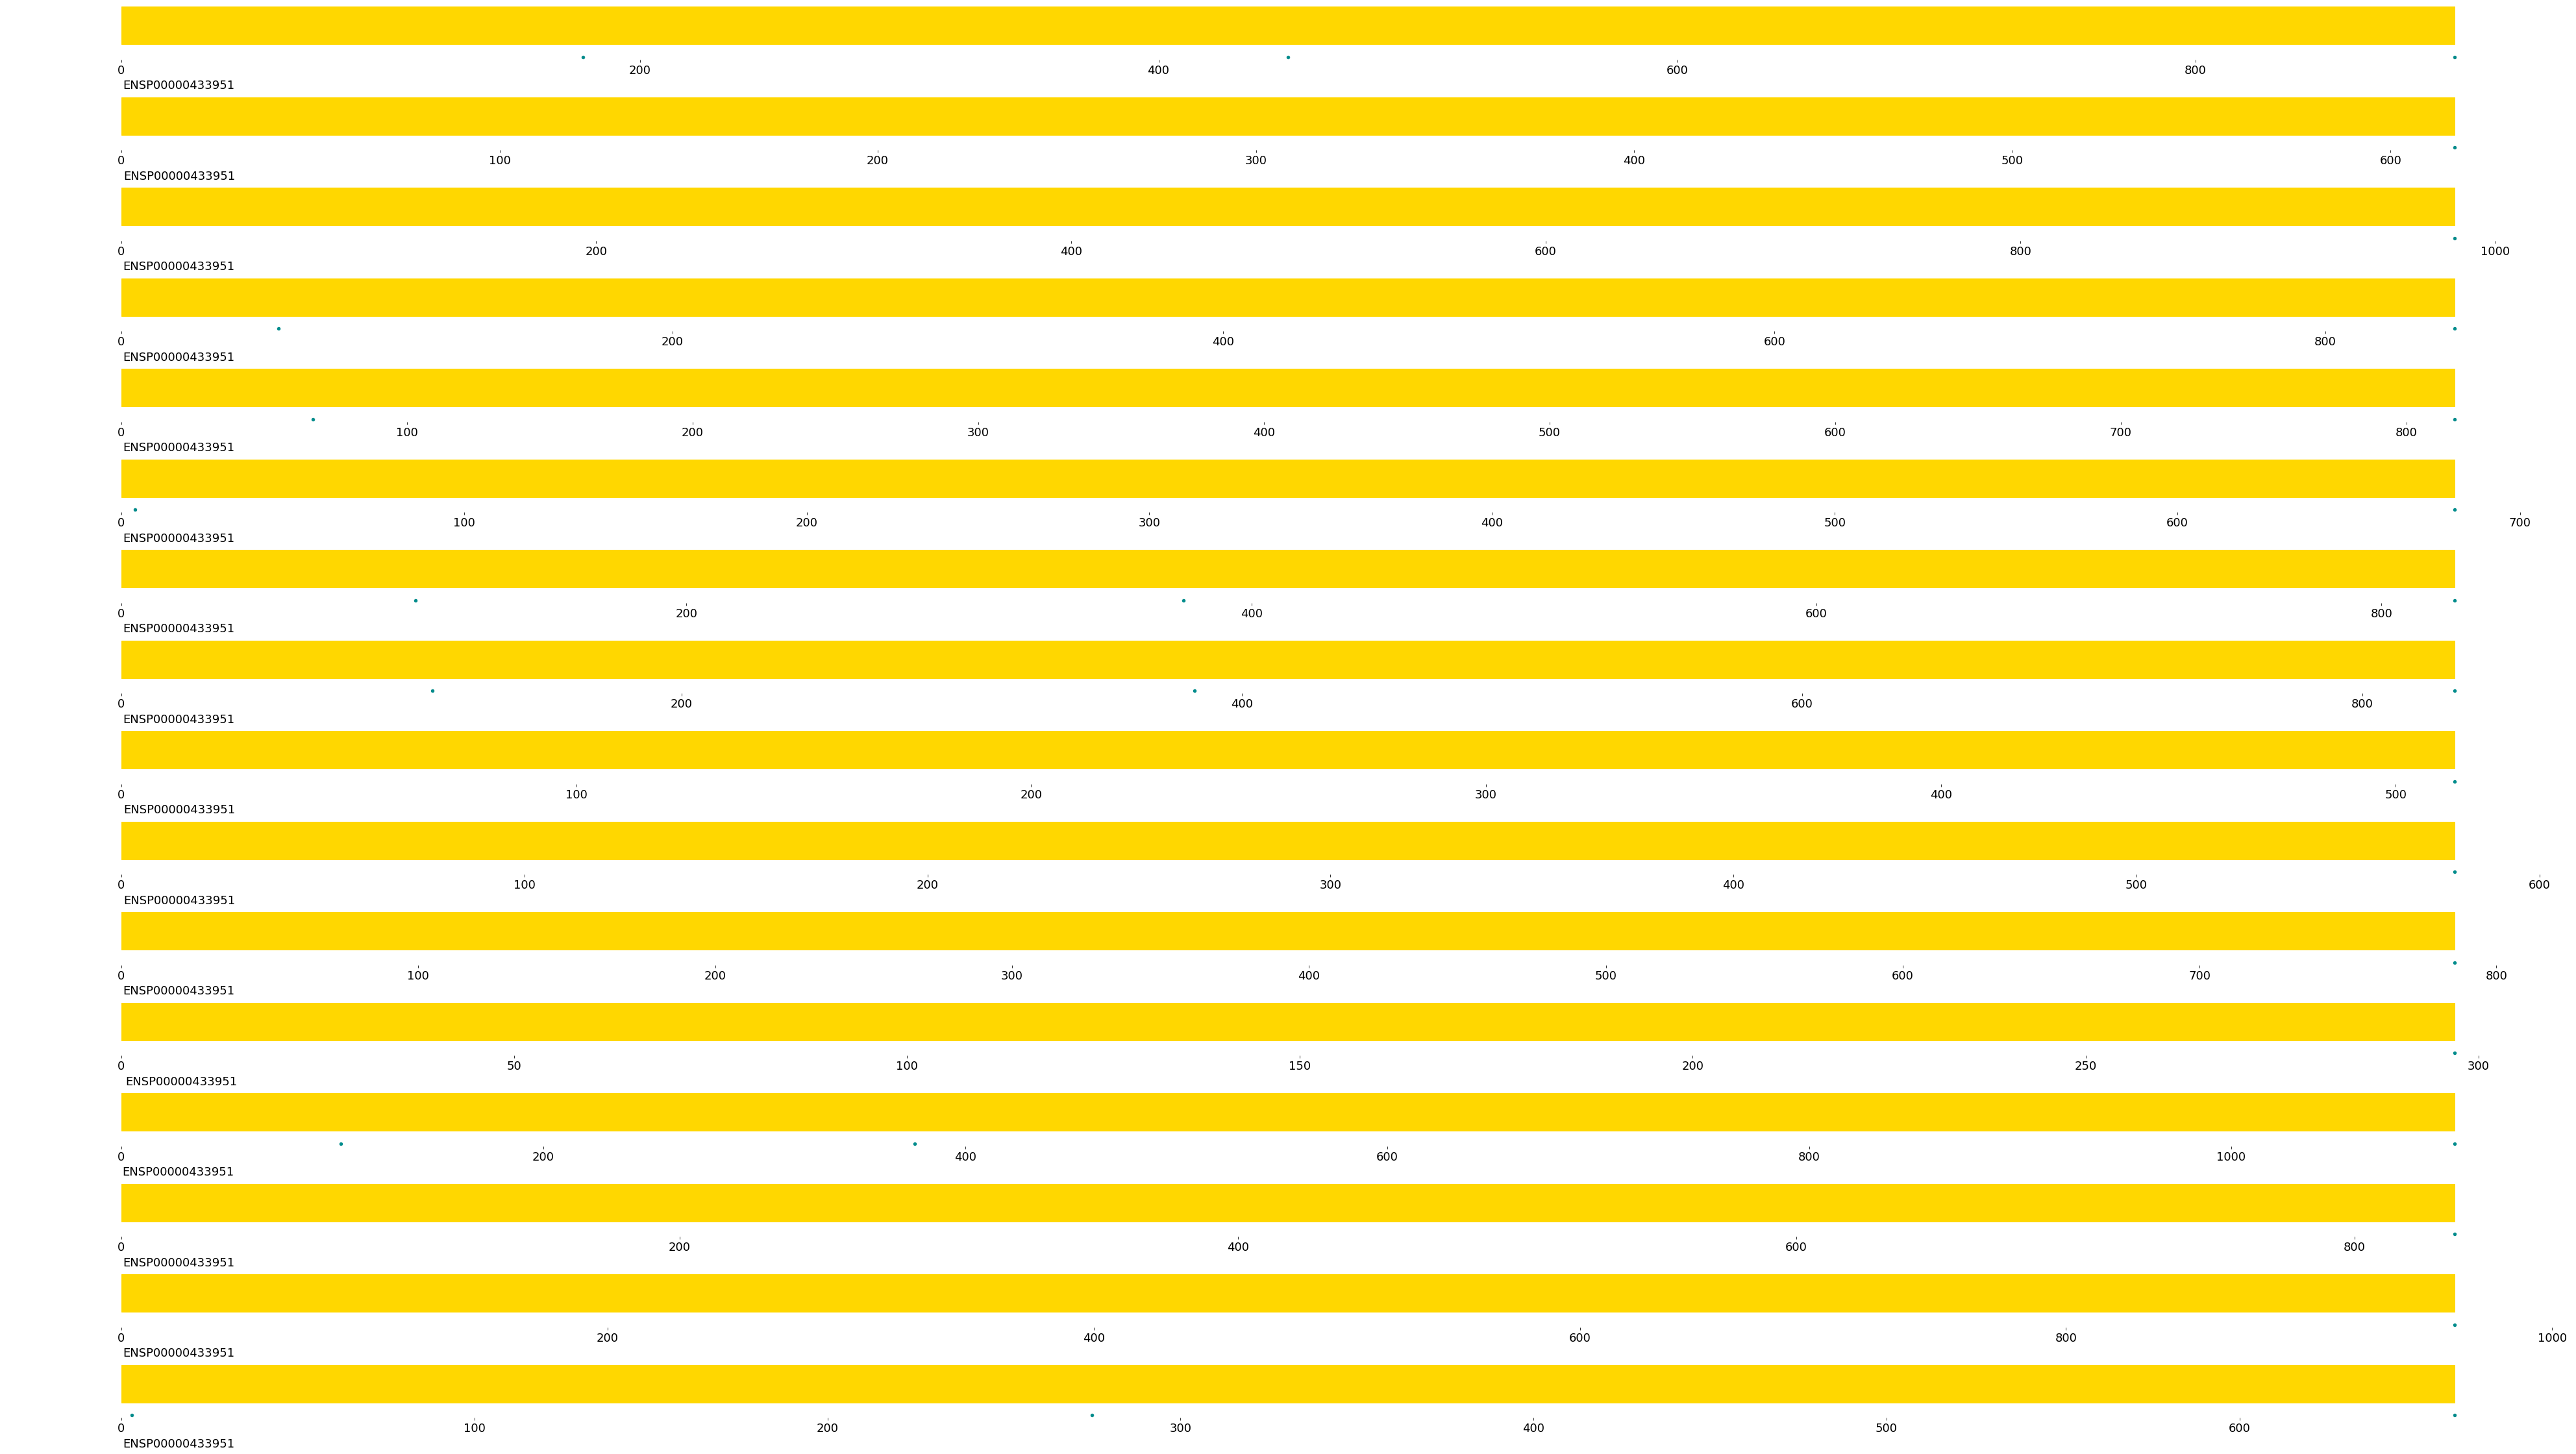

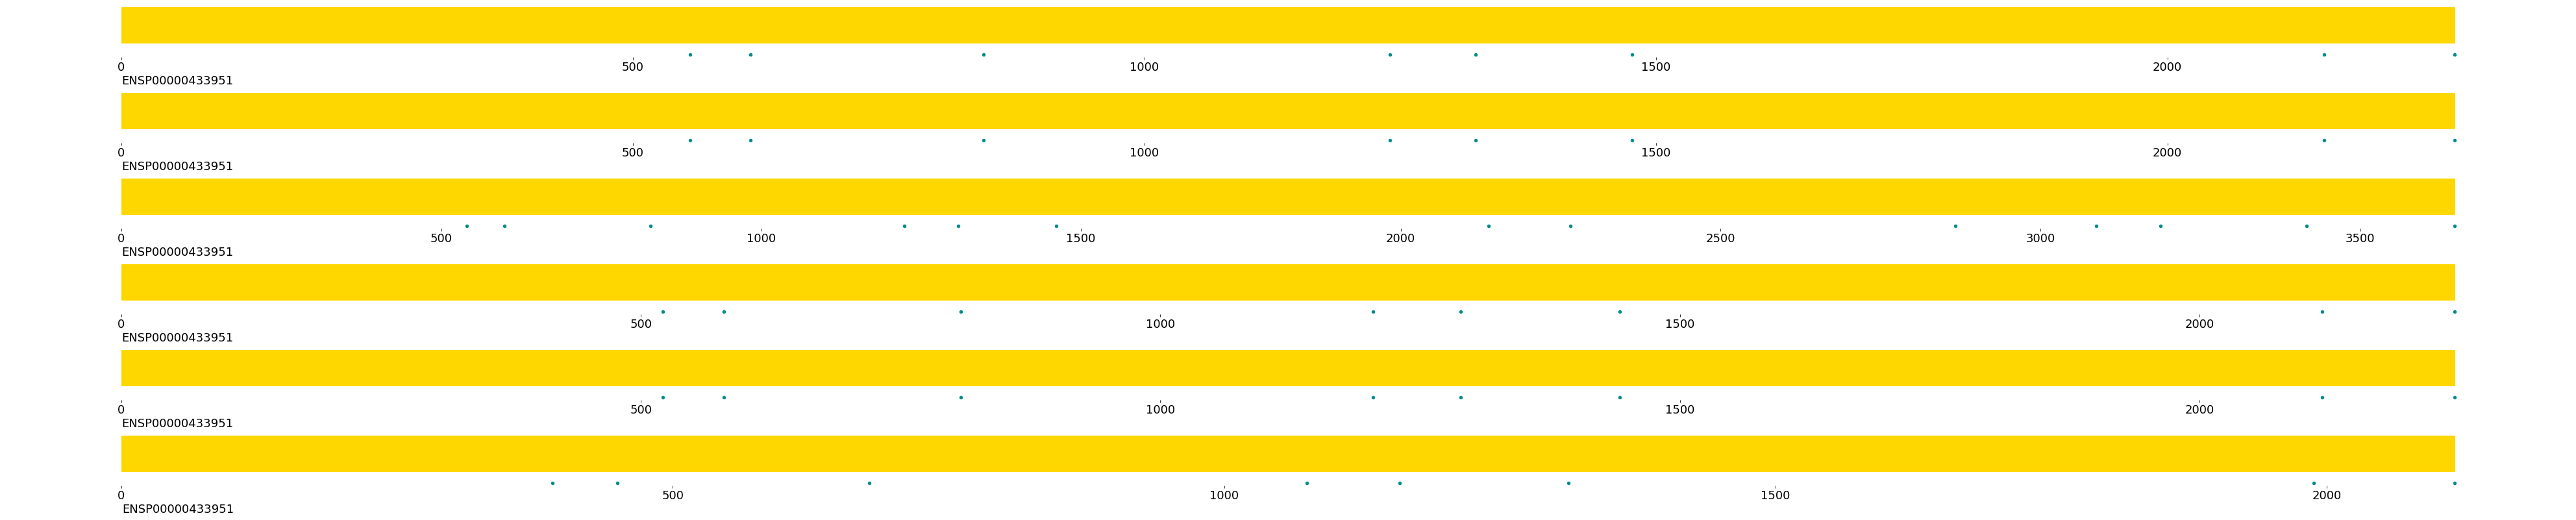

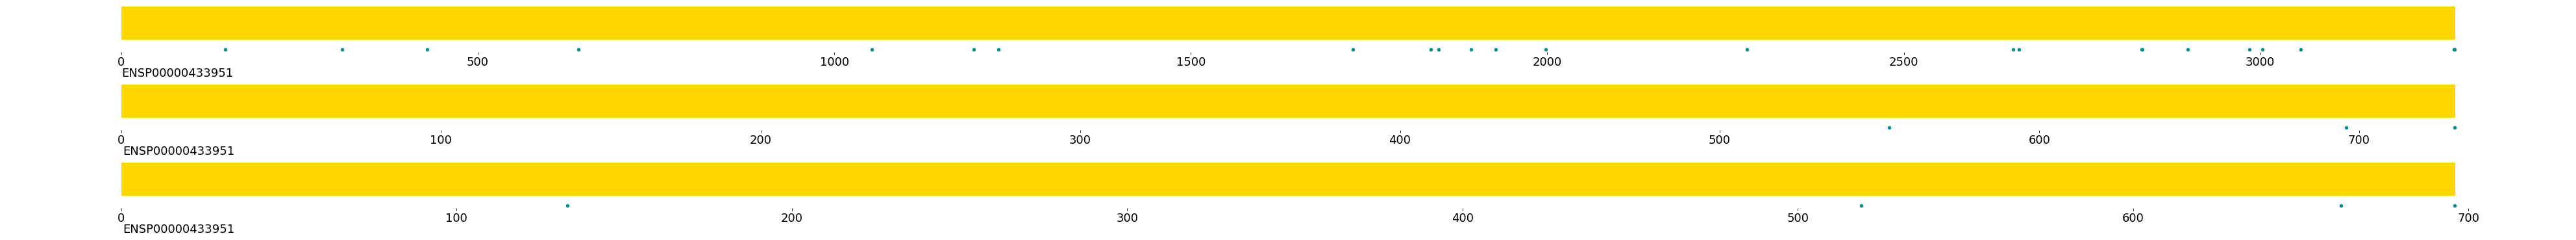

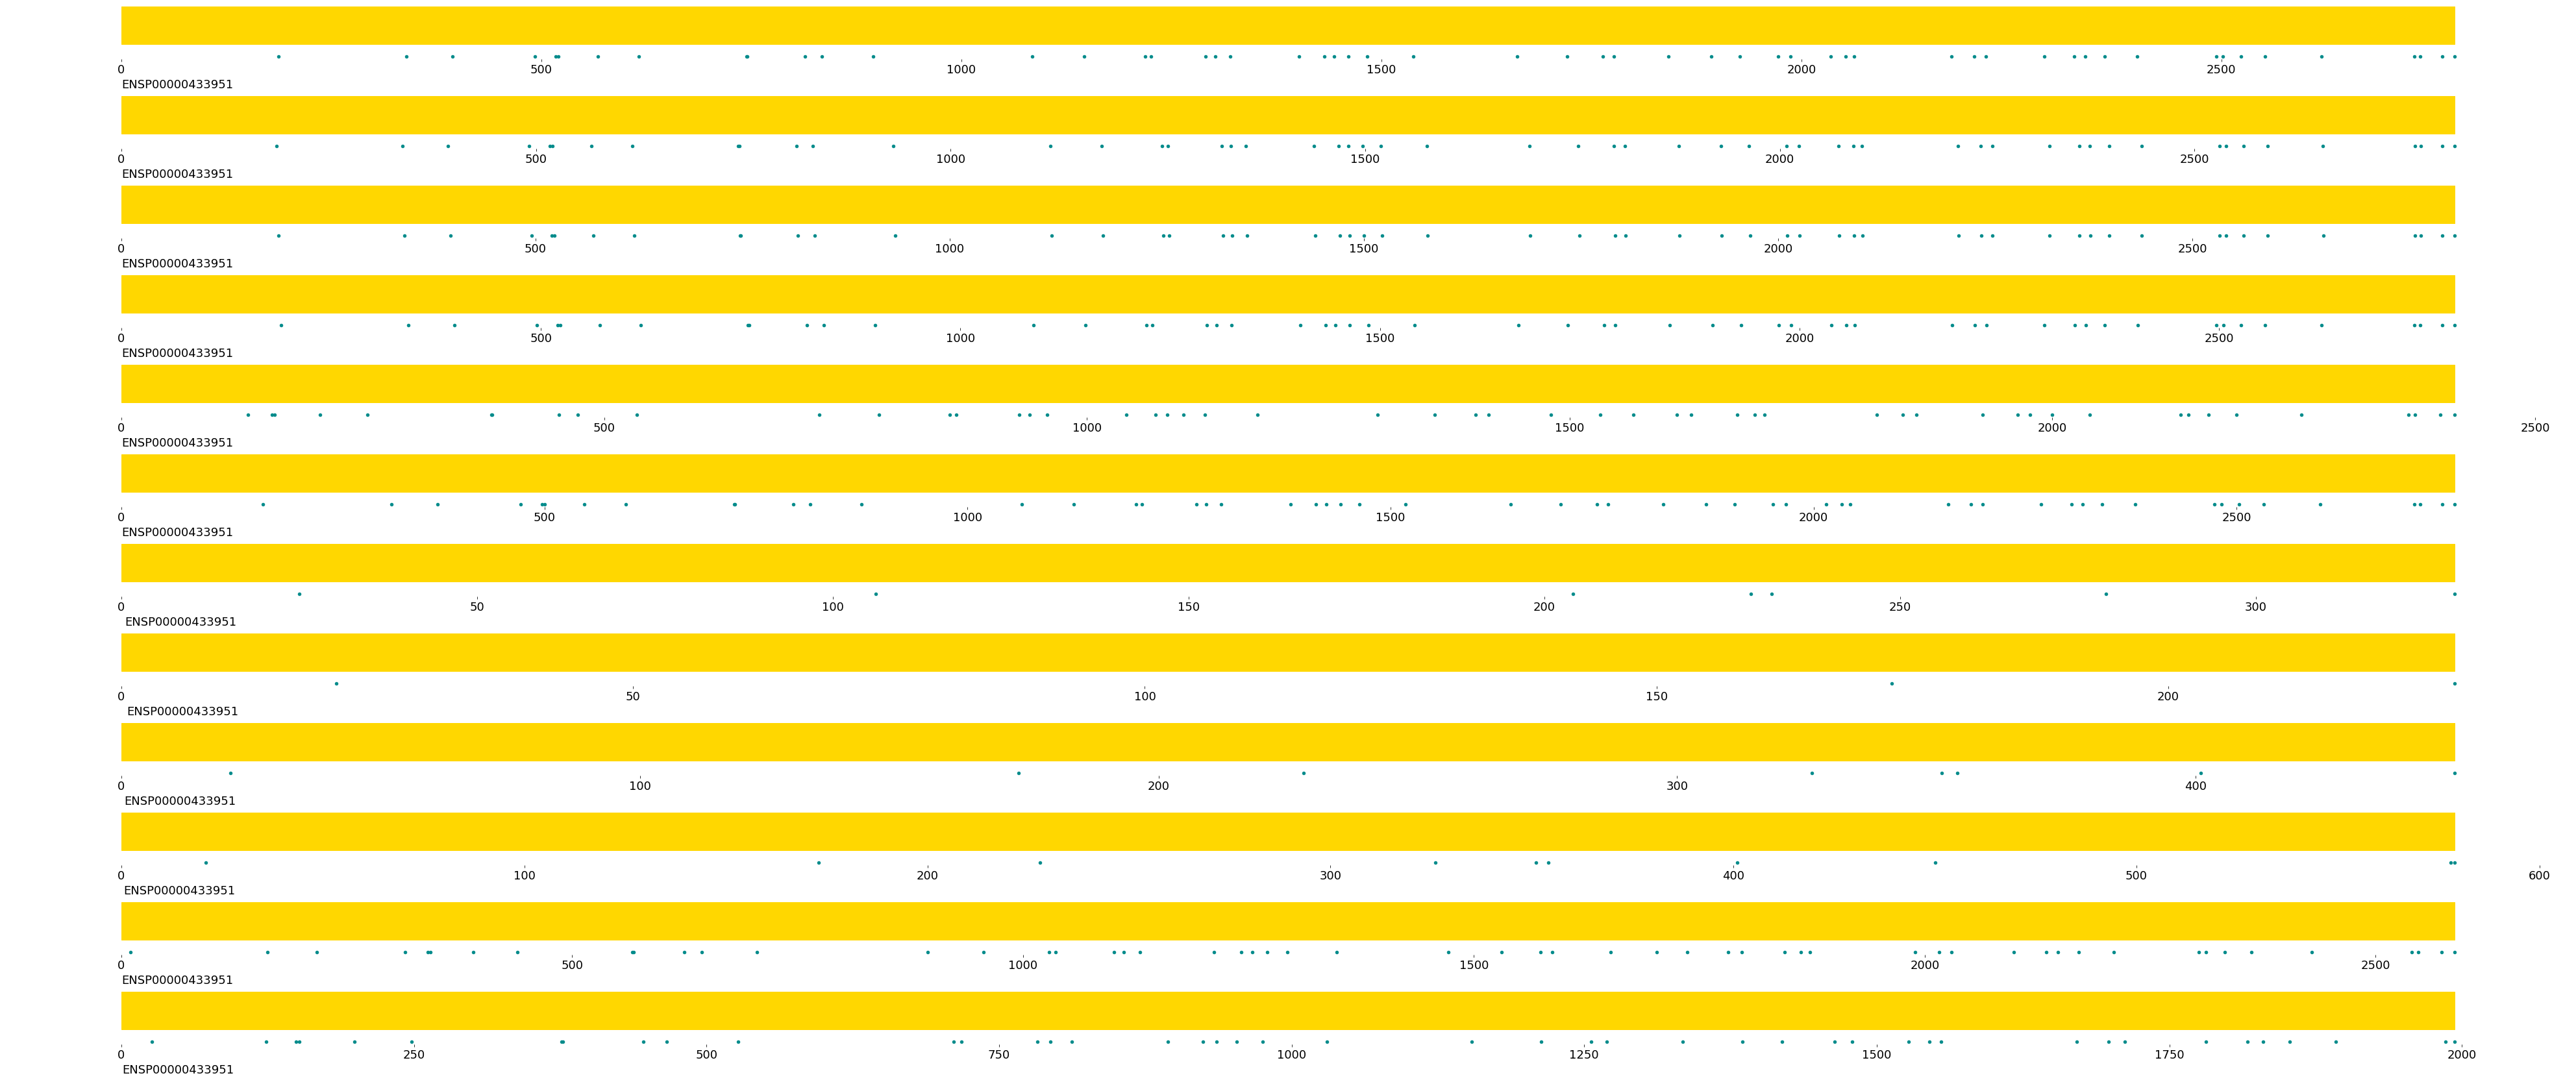

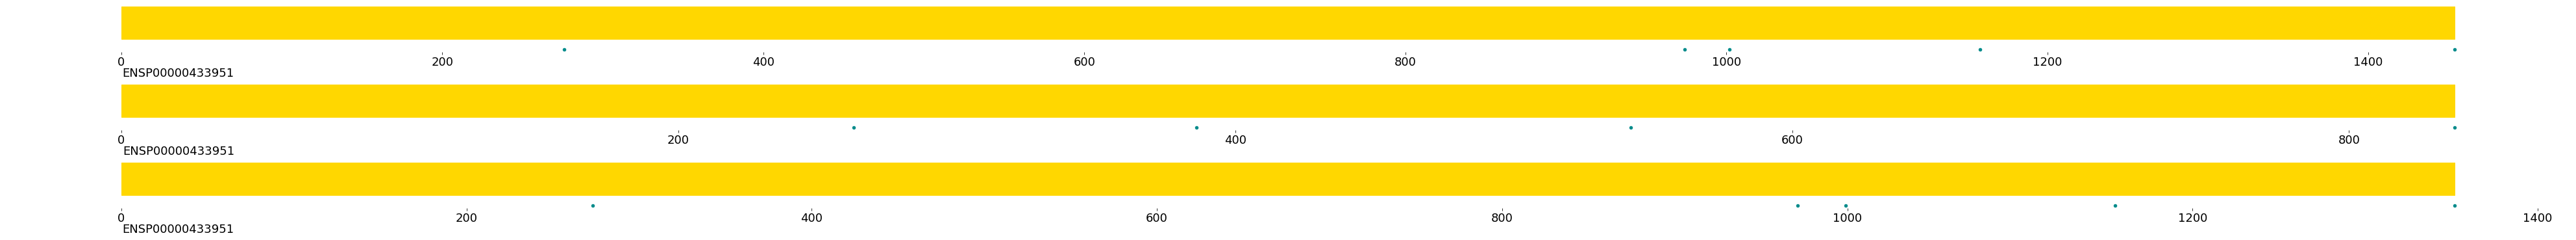

In [17]:
for gene in level1_only_genes:
    if int(info_df['variants'][info_df['gene'] == gene]) > 10:
        gene_df = var_gene_names[var_gene_names['gene_name'] == gene]
        
        number_of_transcr = int(info_df['transcripts'][info_df['gene'] == gene])
        fig = plt.figure(figsize=(55, (number_of_transcr * 2 - 1)), constrained_layout=True)
        gs = GridSpec(number_of_transcr, 1, figure=fig)
        
        pos_of_subplot = 0
        for transcriptID in gene_df['transcript_id'].unique().tolist():
            single_trans_df = gene_df[gene_df['transcript_id'] == transcriptID].reset_index(drop=True)
            sequence = single_trans_df['unmodified_sequence'][0]
            prot_change = single_trans_df['cDNA_change'].drop_duplicates().tolist()
            prot_change.sort(key = lambda x: int(x.split(':')[0]))
            
            ### position1
            sequence_pos = []
            sequence = single_trans_df['unmodified_sequence'][0]
            for change in prot_change:
                if change[0] != '-':
                    pos = int(change.split(':')[0]) + 1
                    if pos not in sequence_pos:
                        sequence_pos.append(pos)
                        
            y_numbers = str(1) * len(sequence_pos)
            y_int_number_list = []
            for el in y_numbers:
                y_int_number_list.append(int(el))
            
            ax = fig.add_subplot(gs[pos_of_subplot, :])    
            ax.scatter(sequence_pos, y_int_number_list, s=20, label="all_var", color='darkcyan')
            ax.add_patch(Rectangle((0, 1.2), max(sequence_pos), 0.6, color='gold'))
            ax.yaxis.set_visible(False)
            ax.spines[["left", "top", "right", "bottom"]].set_visible(False)
            ax.text(0.5, 0.5, proteinID, fontsize=18)
            ax.tick_params(labelsize=18)
            pos_of_subplot = pos_of_subplot + 1
                
        #fig.savefig('/Users/ksenia/Documents/MODY_genes/visualization/' + gene + '_protein281022.svg', format='svg')
        fig.savefig('/Users/ksenia/Documents/MODY_genes/visualization/' + gene + '_protein281022.png', dpi=300, format='png')
        print(gene)
